<a href="https://colab.research.google.com/github/apgstocks/CaseStudy/blob/main/LoanTap_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc, r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report, precision_score, recall_score, f1_score
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df=pd.read_csv('G:\Case\DataSet\loantapds.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
#Missing value check
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are missing values found in emp_title,emp_length,title,mort_acc,pub_rec_bankruptcies

In [ ]:
df_copy=df.copy(deep=True)

In [ ]:
#Filling missing values
miss_values = {"emp_title": 'NA', "emp_length": '< 1 year', "title": 'NA', "revol_util": 0, 'mort_acc': 0, 'pub_rec_bankruptcies': 0}
df = df.fillna(value=miss_values)

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Now that there is no missing values found,we can proceed ahead


In [ ]:
df['issue_d_month'] = df['issue_d'].apply(lambda x: str(x).split('-')[0])
#df['issue_d_month']
df['issue_d_year'] = df['issue_d'].apply(lambda x: str(x).split('-')[1])
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: str(x).split('-')[0])
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: str(x).split('-')[1])
#df['issue_d_year']
df['state']=df['address'].apply(lambda x:str(x)[-8:-5])
df['pincode']=df['address'].apply(lambda x:str(x)[-5:])

mon1 = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
grade1 = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
sub_grade1 = {'A1':1, 'A2':2, 'A3':3, 'A4':4, 'A5':5,
                    'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10,
                    'C1':11, 'C2':12, 'C3':13, 'C4':14, 'C5':15,
                    'D1':16, 'D2':17, 'D3':18, 'D4':19, 'D5':20,
                    'E1':21, 'E2':22, 'E3':23, 'E4':24, 'E5':25,
                    'F1':26, 'F2':27, 'F3':28, 'F4':29, 'F5':30,
                    'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35}
emp_len1 = {'10+ years': 10, '4 years': 4, '< 1 year': 0, '6 years': 6, '9 years': 9, '2 years': 2,
                  '3 years': 3, '8 years': 8, '7 years': 7, '5 years': 5, '1 year': 1}


#df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
#df['initial_list_status'] = df['initial_list_status'].map({'f': 1, 'w': 0})


In [ ]:
df['sub_grade']=df['sub_grade'].apply(lambda x:sub_grade1[str(x)])
df['grade']=df['grade'].apply(lambda x:grade1[str(x)])
df['earliest_cr_line_month']=df['earliest_cr_line_month'].apply(lambda x:mon1[str(x)])
df['issue_d_month']=df['issue_d_month'].apply(lambda x:mon1[str(x)])
df['term']=df['term'].apply(lambda x:str(x).split( )[0])
df['pincode'] = df['pincode'].astype('string')
df['emp_length']=df['emp_length'].apply(lambda x:emp_len1[str(x)])

In [ ]:
for i in ['issue_d_year','earliest_cr_line_year']:
  df[i]=df[i].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  int64  
 5   sub_grade               396030 non-null  int64  
 6   emp_title               396030 non-null  object 
 7   emp_length              396030 non-null  int64  
 8   home_ownership          396030 non-null  object 
 9   annual_inc              396030 non-null  float64
 10  verification_status     396030 non-null  object 
 11  loan_status             396030 non-null  object 
 12  purpose                 396030 non-null  object 
 13  dti                     396030 non-null  float64
 14  open_acc            

In [ ]:
df.drop(['title','issue_d','earliest_cr_line','address'],axis=1,inplace=True)

KeyError: "['title', 'issue_d', 'earliest_cr_line', 'address'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  int64  
 5   sub_grade               396030 non-null  int64  
 6   emp_title               396030 non-null  object 
 7   emp_length              396030 non-null  int64  
 8   home_ownership          396030 non-null  object 
 9   annual_inc              396030 non-null  float64
 10  verification_status     396030 non-null  object 
 11  loan_status             396030 non-null  object 
 12  purpose                 396030 non-null  object 
 13  dti                     396030 non-null  float64
 14  open_acc            

In [ ]:
obj_df=df.columns[df.dtypes=='object']
for i in obj_df:
    if df[i].nunique()<=6:
        df[i]=pd.Categorical(df[i])
    if i in ['purpose','title','state','pincode','address','emp_title']:
        df[i]=df[i].astype('string')


In [ ]:
df.dtypes

loan_amnt                  float64
term                      category
int_rate                   float64
installment                float64
grade                        int64
sub_grade                    int64
emp_title                   string
emp_length                   int64
home_ownership            category
annual_inc                 float64
verification_status       category
loan_status               category
purpose                     string
dti                        float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status       category
application_type          category
mort_acc                   float64
pub_rec_bankruptcies       float64
issue_d_month                int64
issue_d_year                 int64
earliest_cr_line_month       int64
earliest_cr_line_year        int64
state                       string
pincode             

In [ ]:

df.drop(['issue_d','earliest_cr_line','address','title'],axis=1,inplace=True)`

SyntaxError: invalid syntax (1542150932.py, line 1)

In [ ]:
df

loan_amnt term  int_rate  installment  grade  sub_grade  \
0         10000.0   36     11.44       329.48      2          9   
1          8000.0   36     11.99       265.68      2         10   
2         15600.0   36     10.49       506.97      2          8   
3          7200.0   36      6.49       220.65      1          2   
4         24375.0   60     17.27       609.33      3         15   
...           ...  ...       ...          ...    ...        ...   
396025    10000.0   60     10.99       217.38      2          9   
396026    21000.0   36     12.29       700.42      3         11   
396027     5000.0   36      9.99       161.32      2          6   
396028    21000.0   60     15.31       503.02      3         12   
396029     2000.0   36     13.61        67.98      3         12   

                       emp_title  emp_length home_ownership  annual_inc  ...  \
0                      Marketing          10           RENT    117000.0  ...   
1                Credit analyst            4       MORTGAGE     65000.0  ...   
2                   Statistician           0           RENT     43057.0  ...   
3                Client Advocate           6           RENT     54000.0  ...   
4        Destiny Management Inc.           9       MORTGAGE     55000.0  ...   
...                          ...         ...            ...         ...  ...   
396025          licensed bankere           2           RENT     40000.0  ...   
396026                     Agent           5       MORTGAGE    110000.0  ...   
396027              City Carrier          10           RENT     56500.0  ...   
396028      Gracon Services, Inc          10       MORTGAGE     64000.0  ...   
396029  Internal Revenue Service          10           RENT     42996.0  ...   

       initial_list_status application_type mort_acc  pub_rec_bankruptcies  \
0                        w       INDIVIDUAL      0.0                   0.0   
1                        f       INDIVIDUAL      3.0                   0.0   
2                        f       INDIVIDUAL      0.0                   0.0   
3                        f       INDIVIDUAL      0.0                   0.0   
4                        f       INDIVIDUAL      1.0                   0.0   
...                    ...              ...      ...                   ...   
396025                   w       INDIVIDUAL      0.0                   0.0   
396026                   f       INDIVIDUAL      1.0                   0.0   
396027                   f       INDIVIDUAL      0.0                   0.0   
396028                   f       INDIVIDUAL      5.0                   0.0   
396029                   f       INDIVIDUAL      0.0                   0.0   

        issue_d_month  issue_d_year  earliest_cr_line_month  \
0                   1          2015                       6   
1                   1          2015                       7   
2                   1          2015                       8   
3                  11          2014                       9   
4                   4          2013                       3   
...               ...           ...                     ...   
396025             10          2015                      11   
396026              2          2015                       2   
396027             10          2013                       3   
396028              8          2012                      11   
396029              6          2010                       9   

        earliest_cr_line_year  state pincode  
0                        1990    OK    22690  
1                        2004    SD    05113  
2                        2007    WV    05113  
3                        2006    MA    00813  
4                        1999    VA    11650  
...                       ...    ...     ...  
396025                   2004    DC    30723  
396026                   2006    LA    05113  
396027                   1997    NY    70466  
396028                   1990    FL    29597  
396029                   1998  

In [ ]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [ ]:
#assinging to num/categorial list
def is_num64_dtype(a):
    if a=='int64' or a=='float64':
        return True

def is_category_dtype(a):
    if a=='category':
        return True

def is_string_dtype(a):
    if a=='string':
        return True

In [ ]:
num_cols = [col for col in df.columns if is_num64_dtype(df[col].dtype) ]
df['loan_status']=pd.Categorical(df['loan_status'])
cat_cols=[col for col in df.columns if is_category_dtype(df[col].dtype) ]


In [ ]:
cat_cols


['term',
 'home_ownership',
 'verification_status',
 'loan_status',
 'initial_list_status',
 'application_type']

In [ ]:
for i in obj_df:
  print(f'****{i}****')
  print(df[i].nunique())

****term****
2
****emp_title****
173106
****home_ownership****
6
****verification_status****
3
****loan_status****
2
****purpose****
14
****initial_list_status****
2
****application_type****
3
****state****
54


### Univariate Analysis


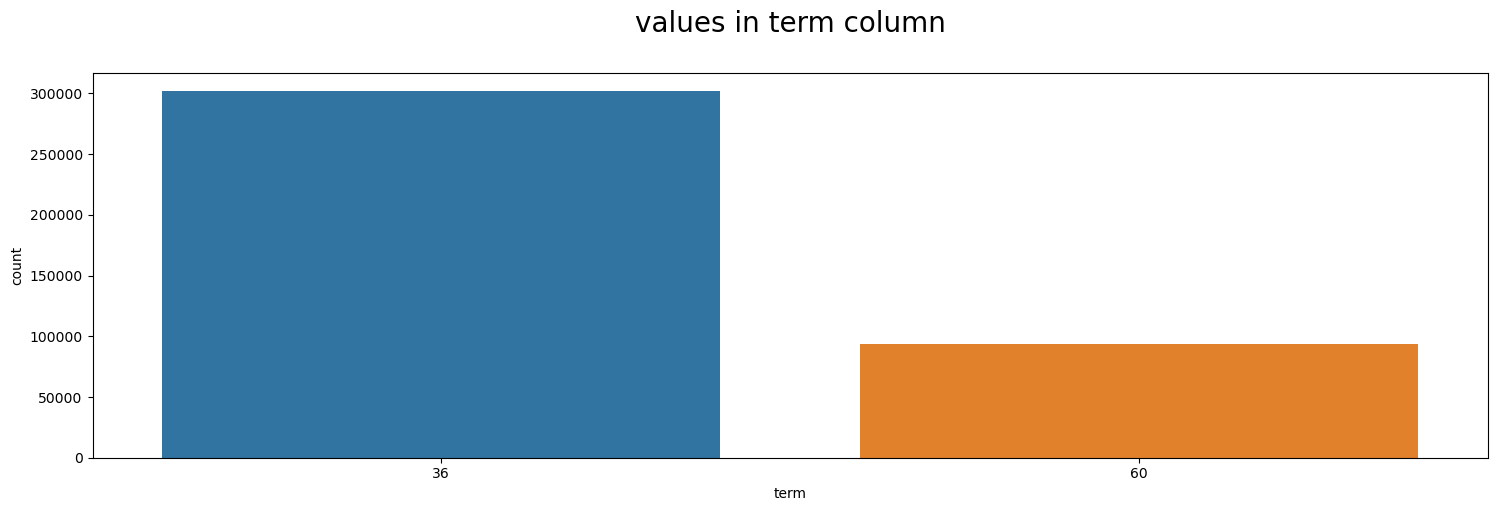

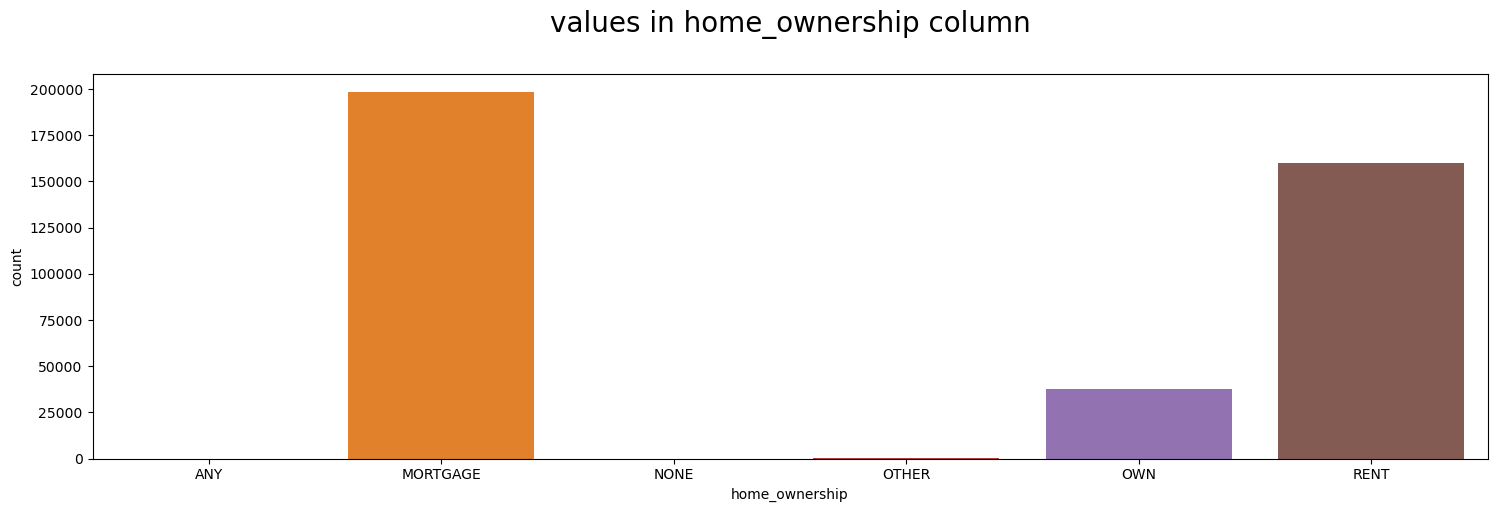

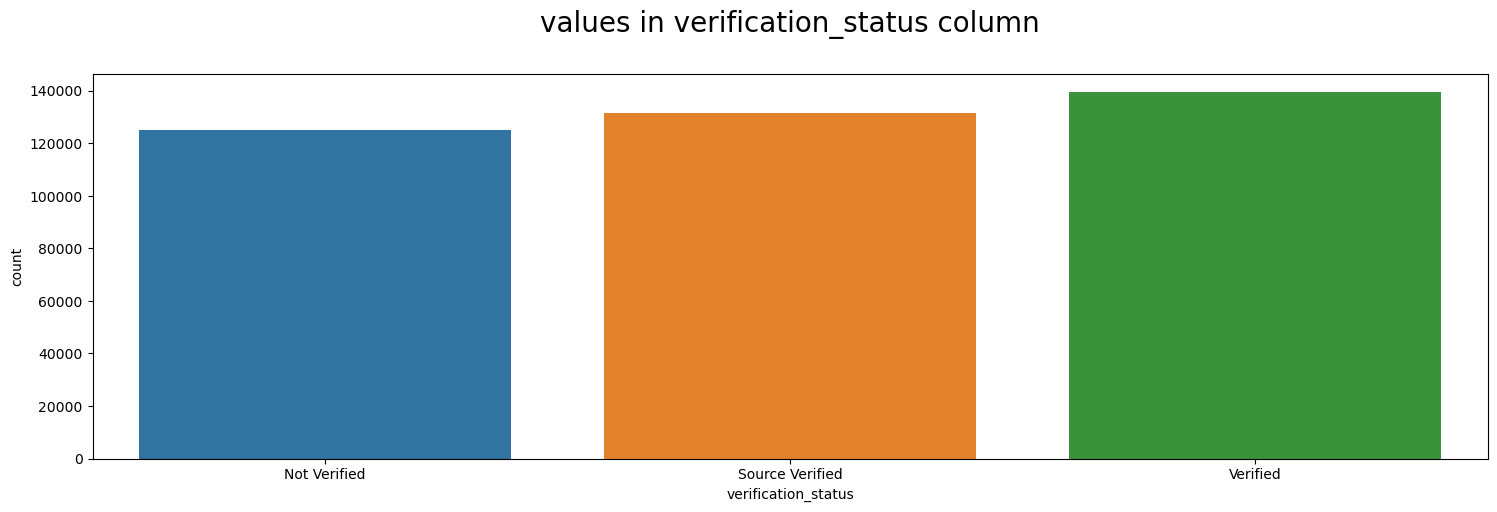

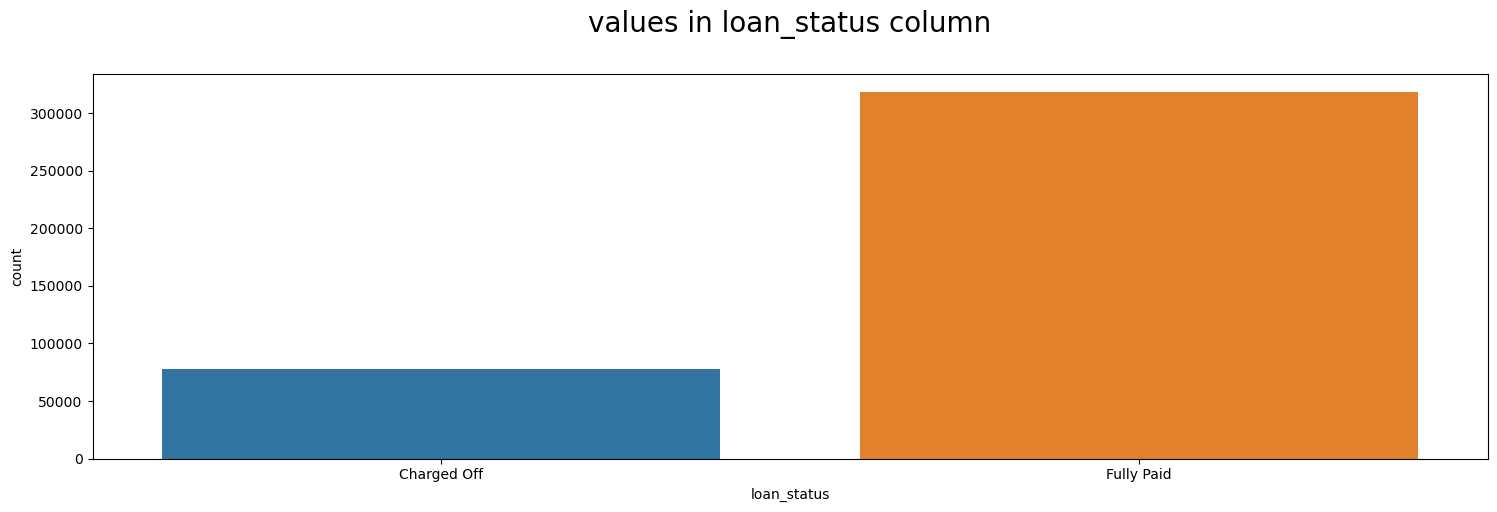

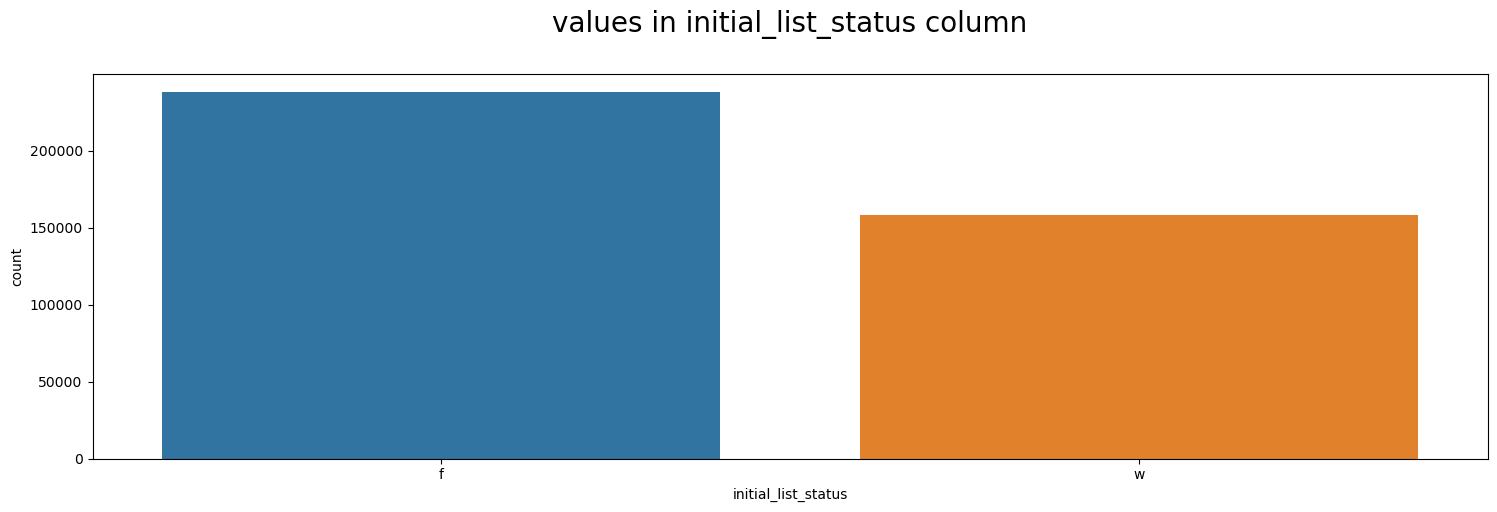

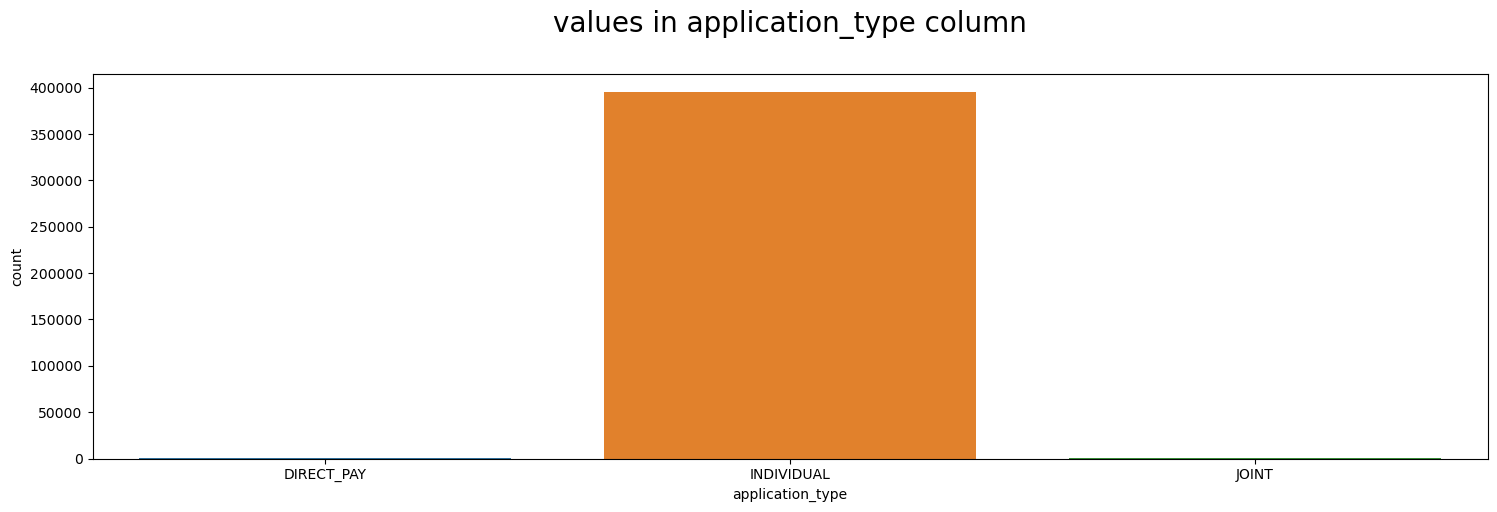

In [ ]:
for column in cat_cols:
    fig, axes = plt.subplots(figsize=(18,5))
    sns.countplot(data=df, x=column)
    plt.title(f"values in {column} column\n",fontsize=20)
    plt.show()

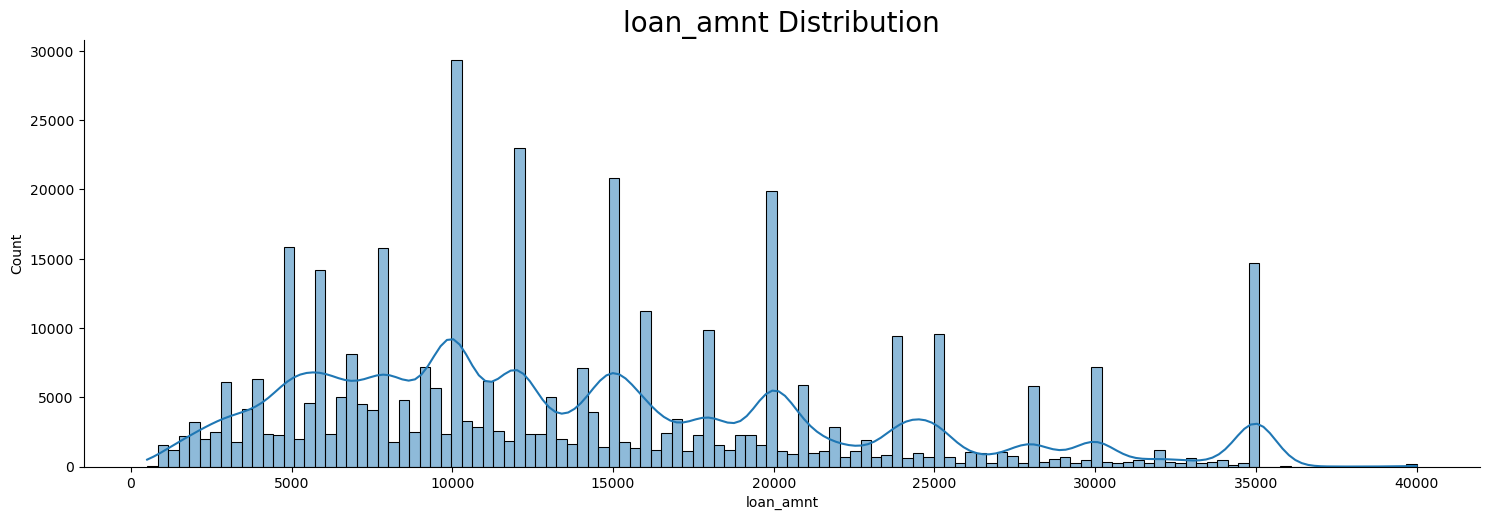

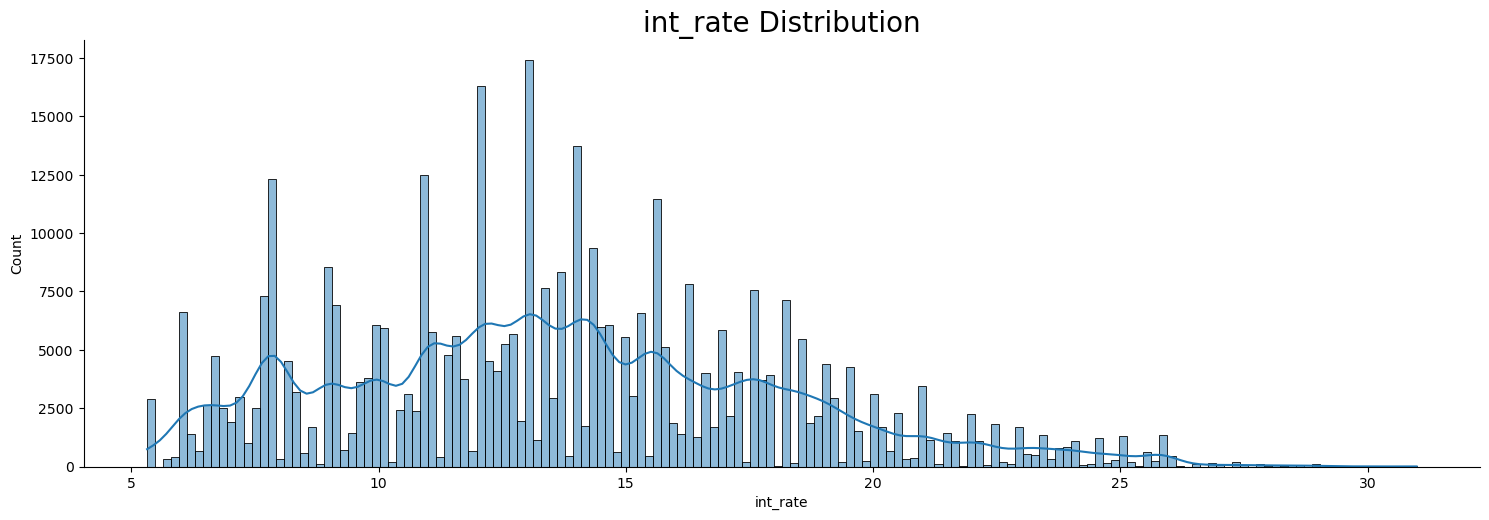

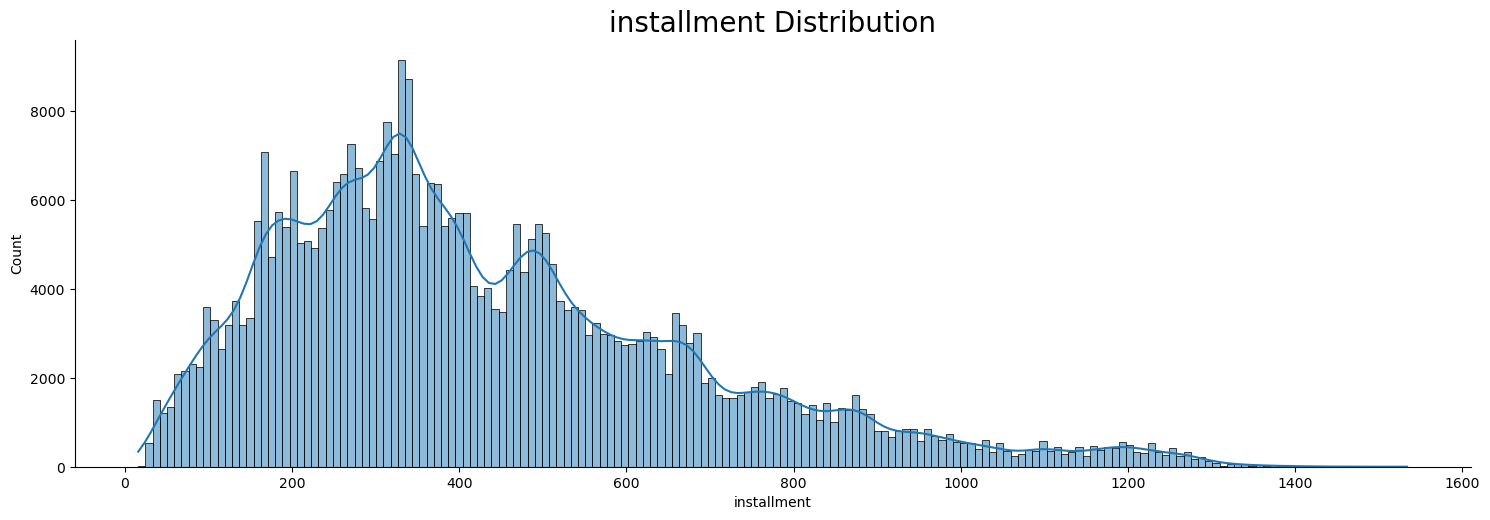

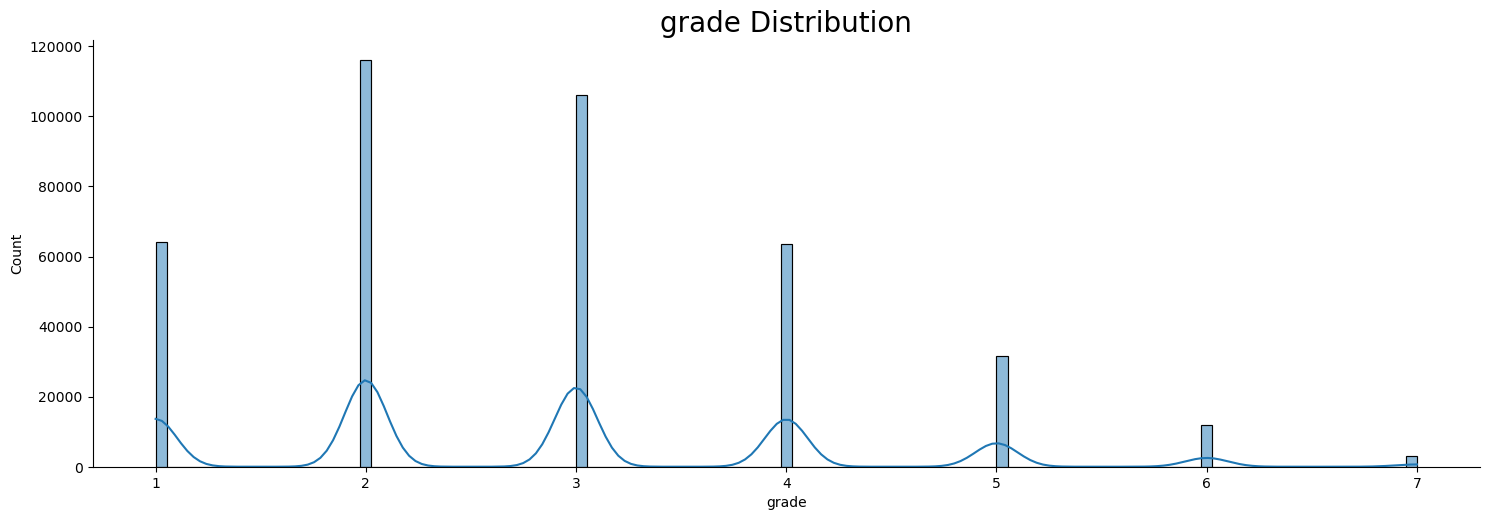

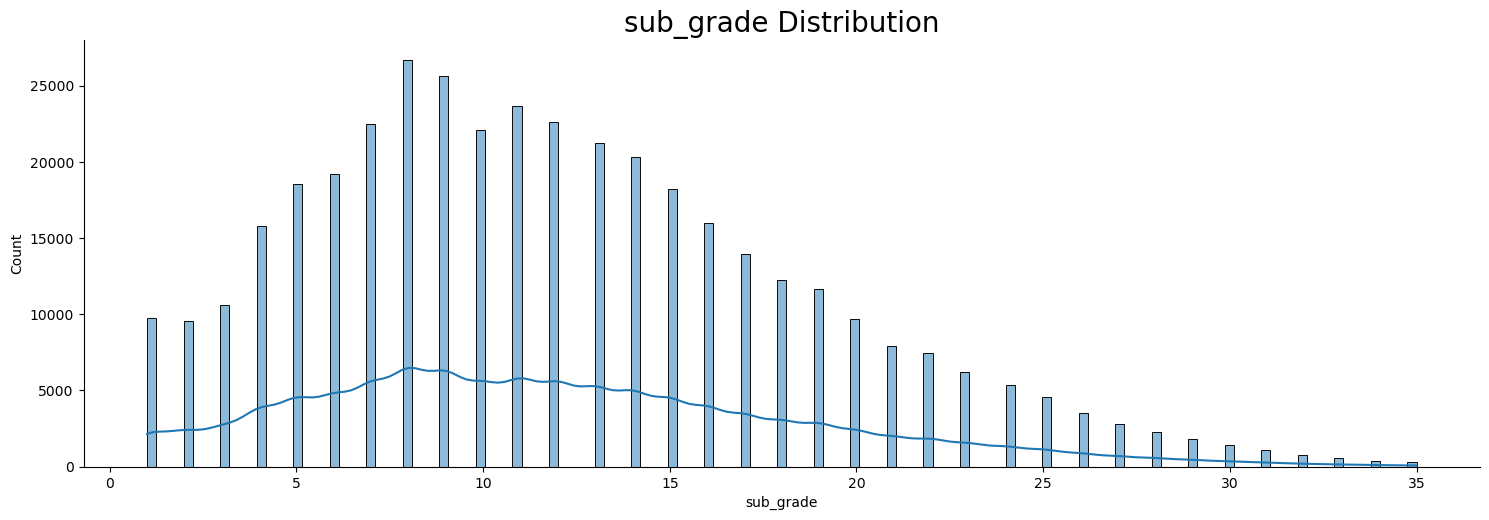

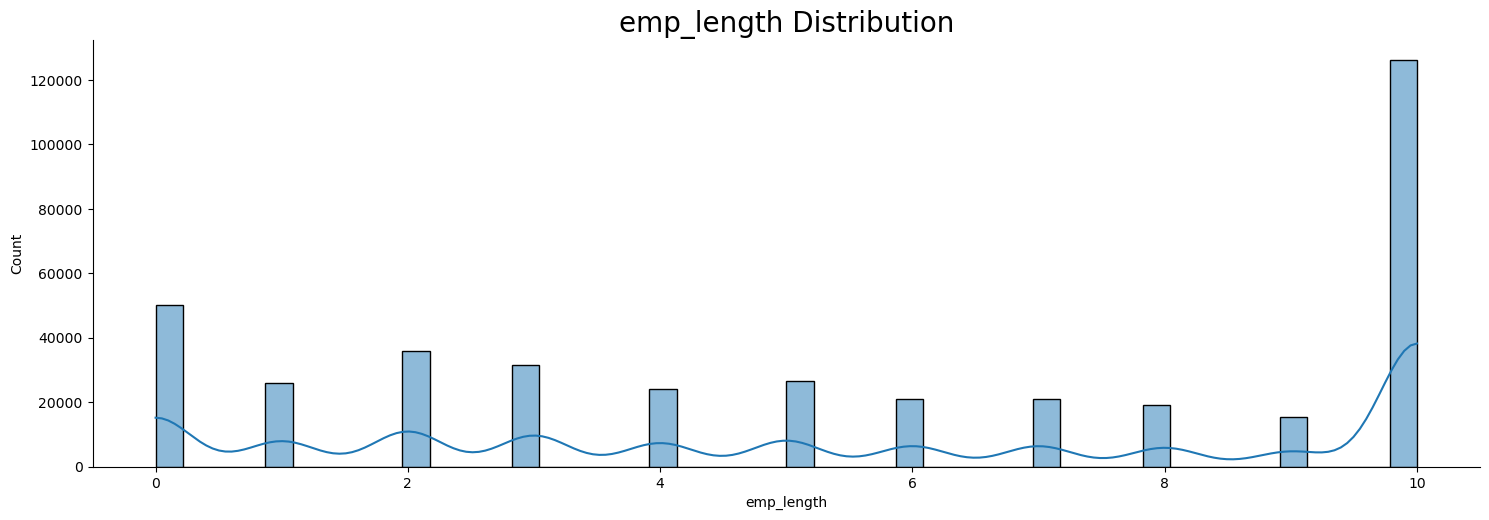

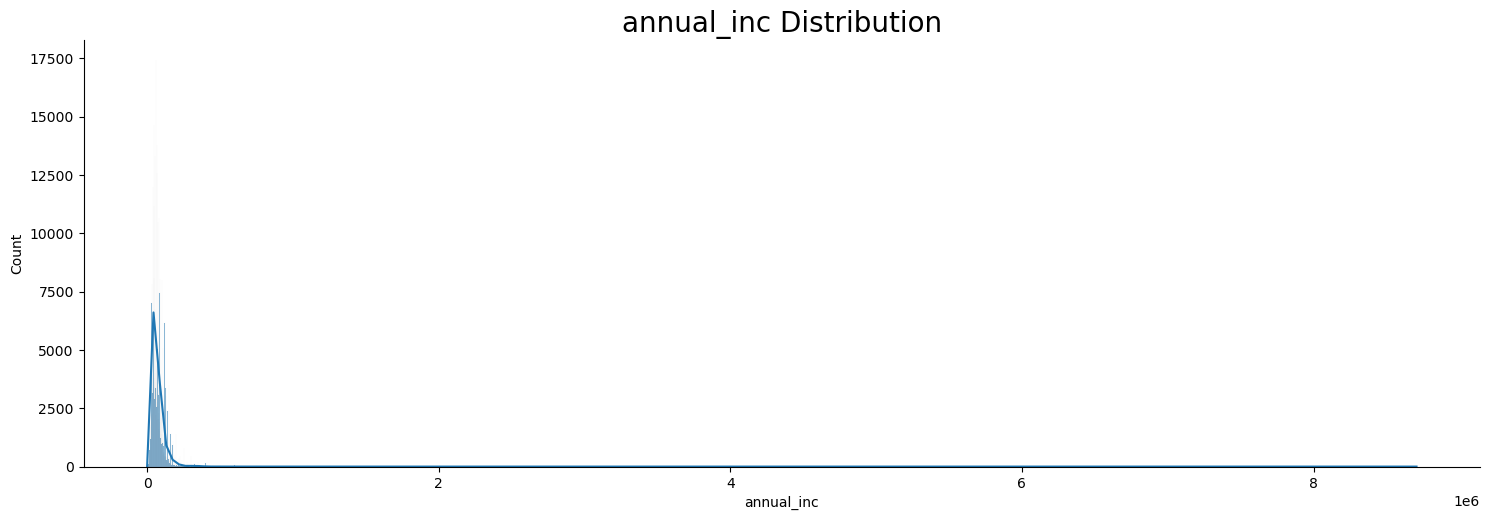

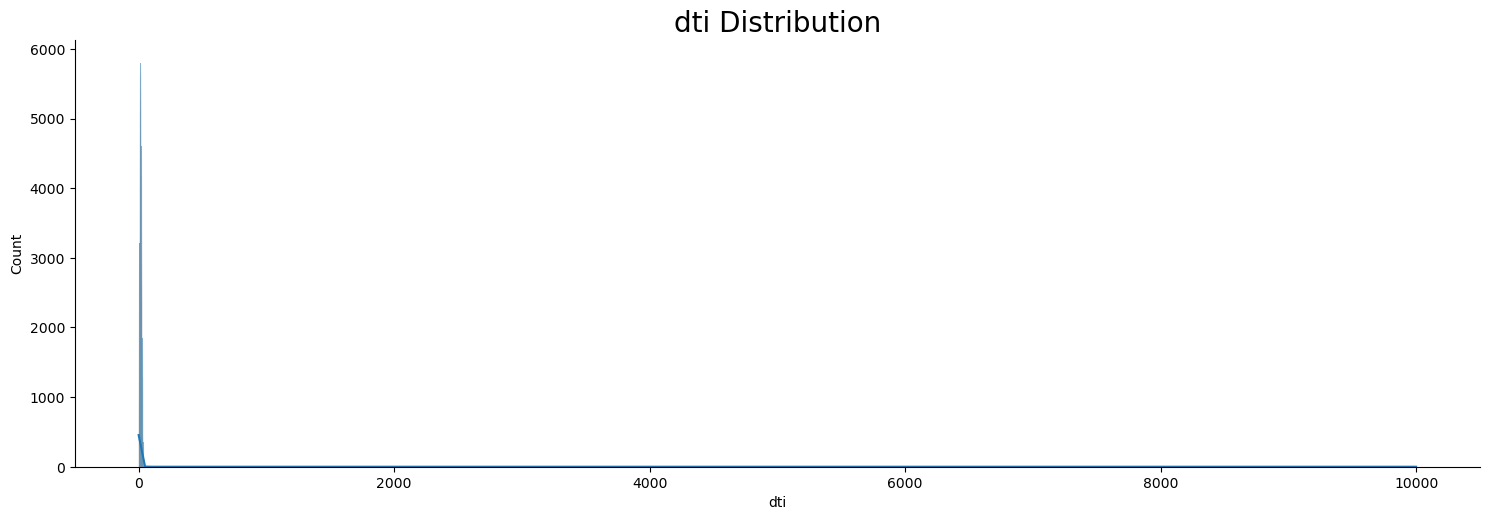

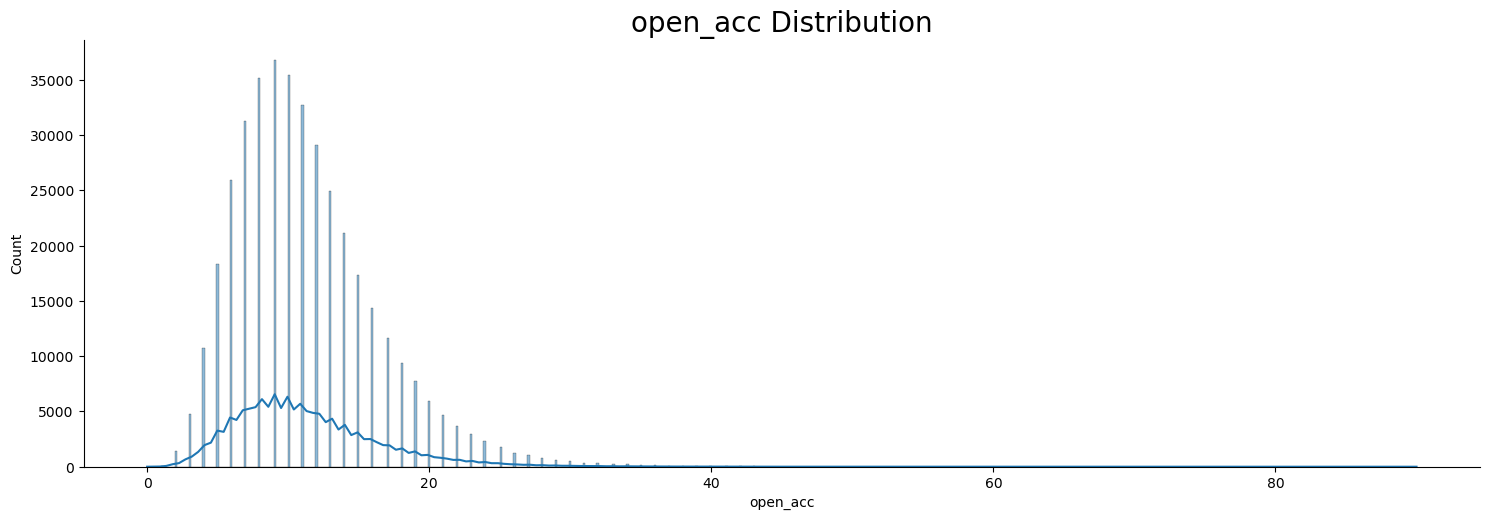

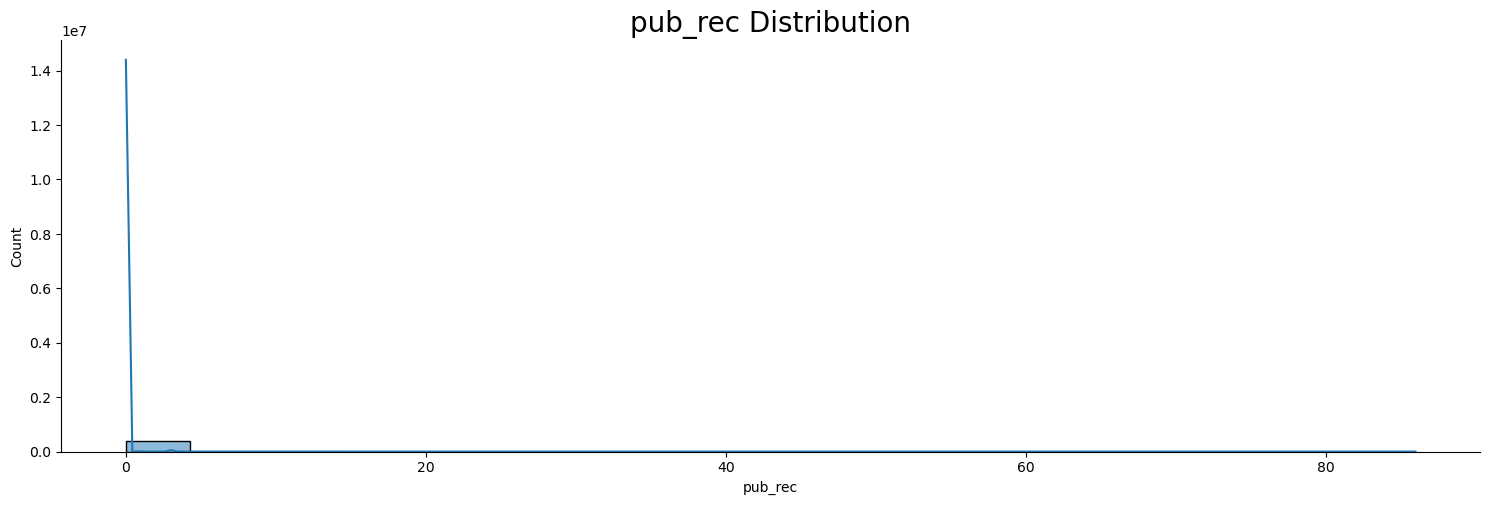

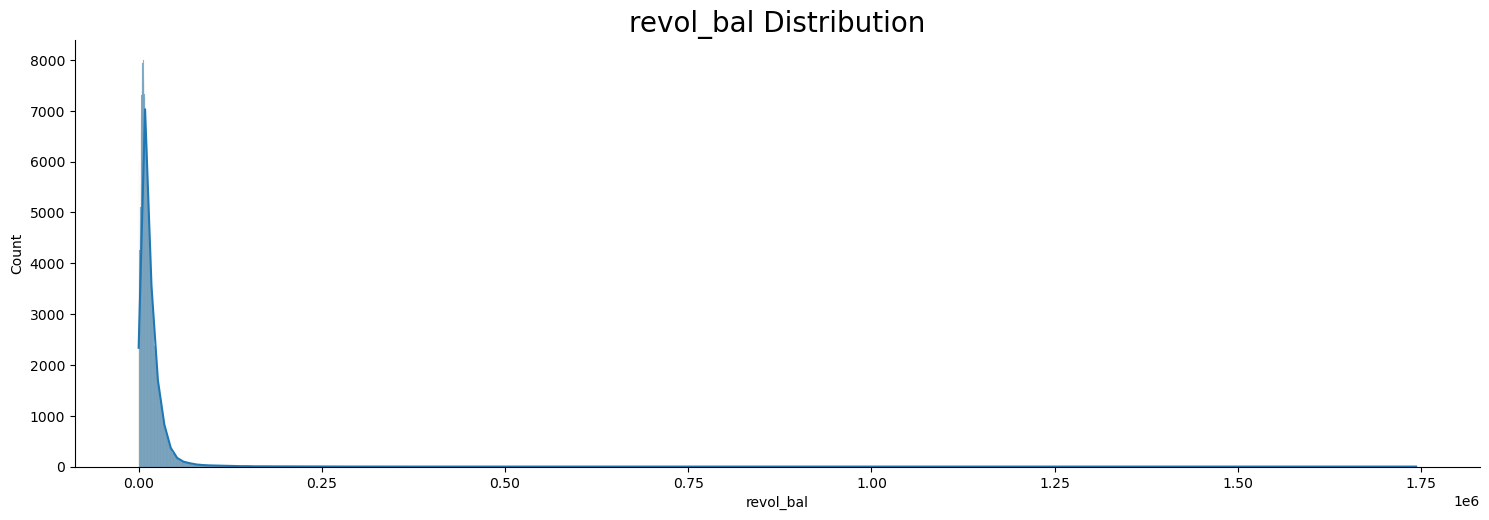

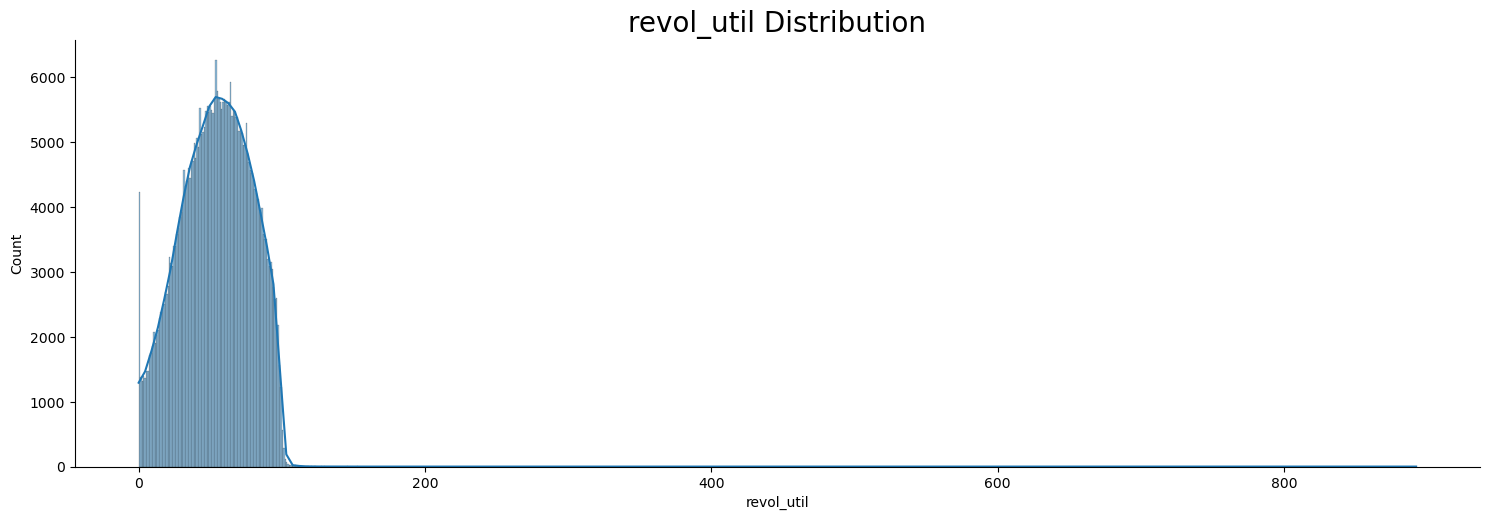

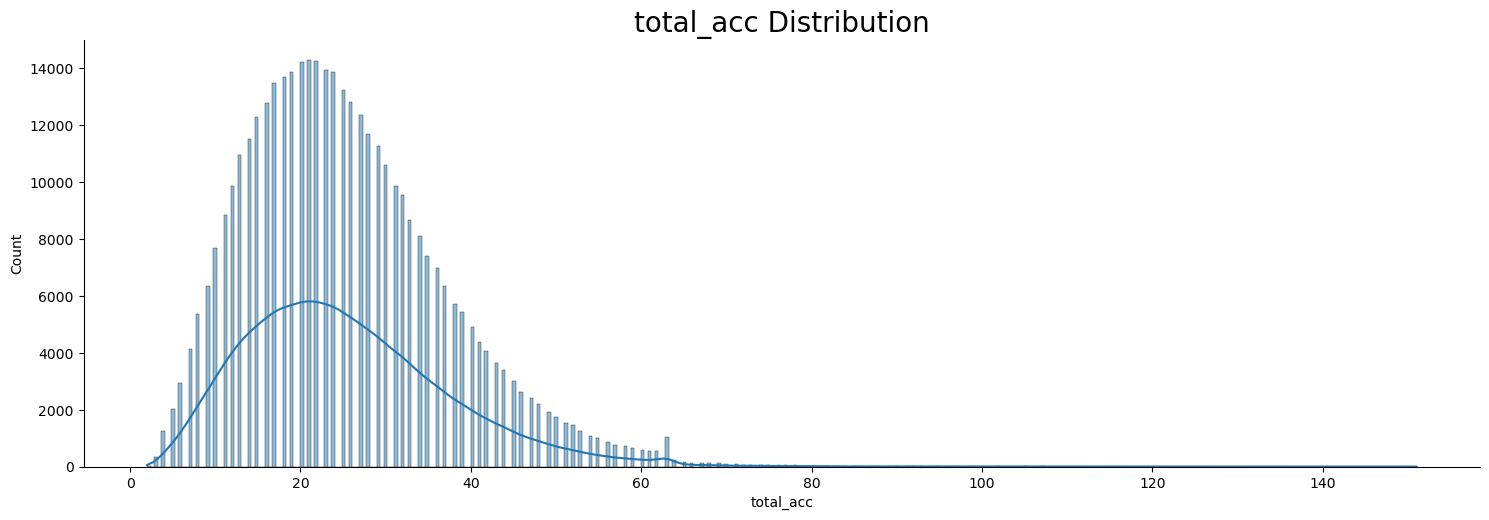

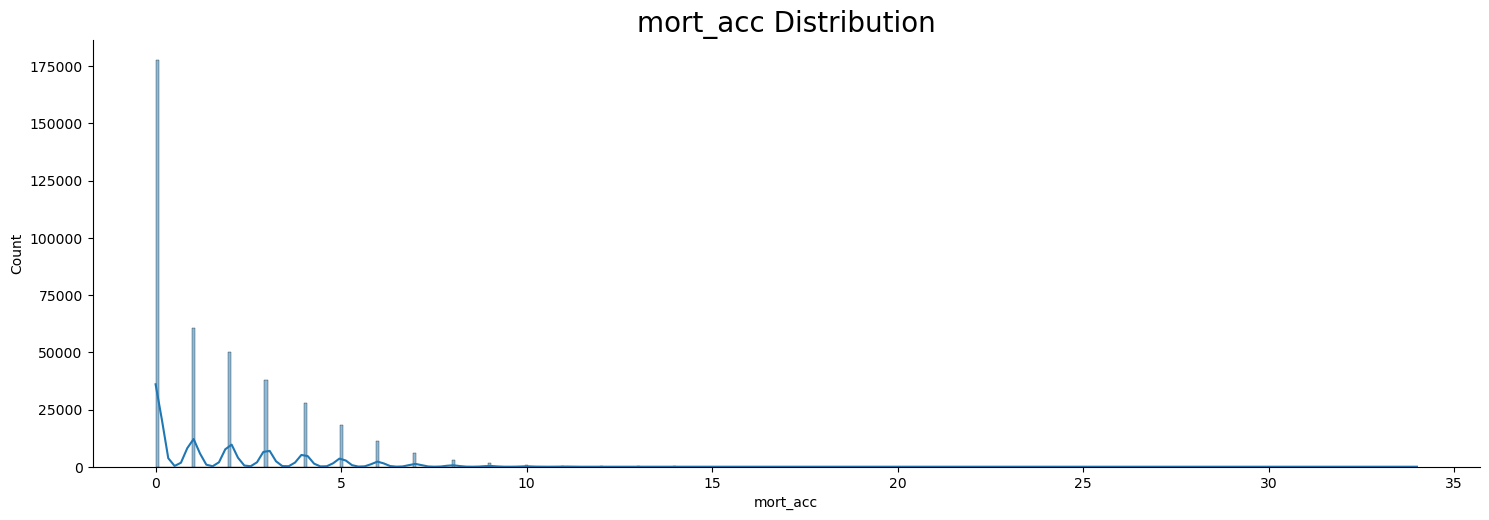

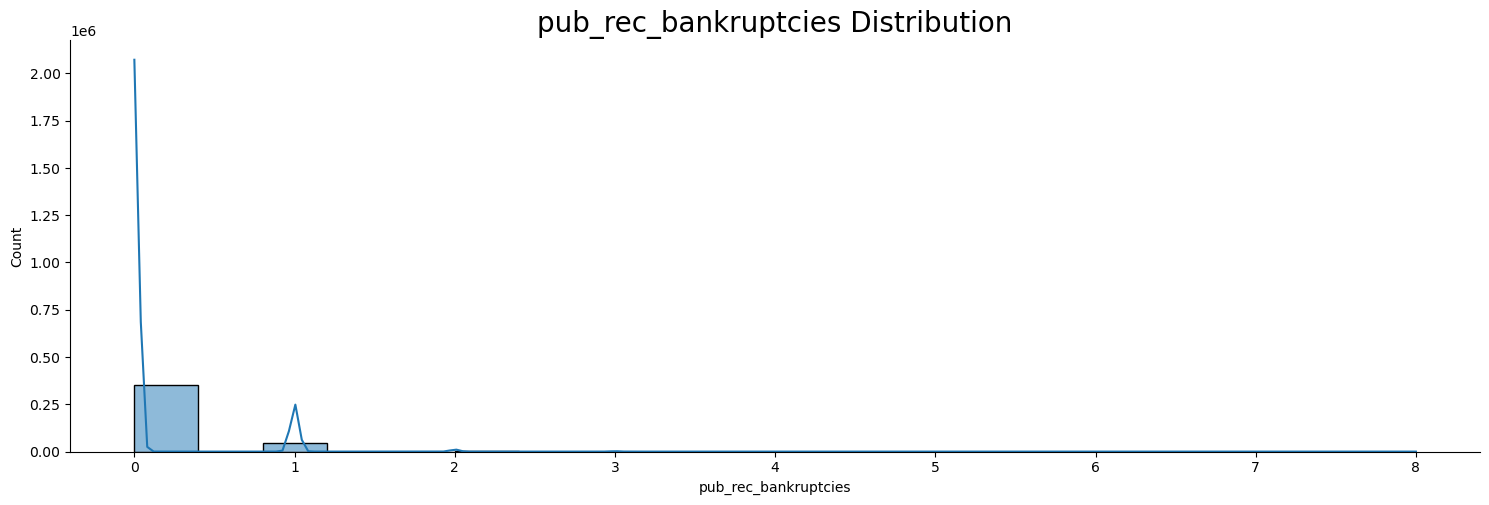

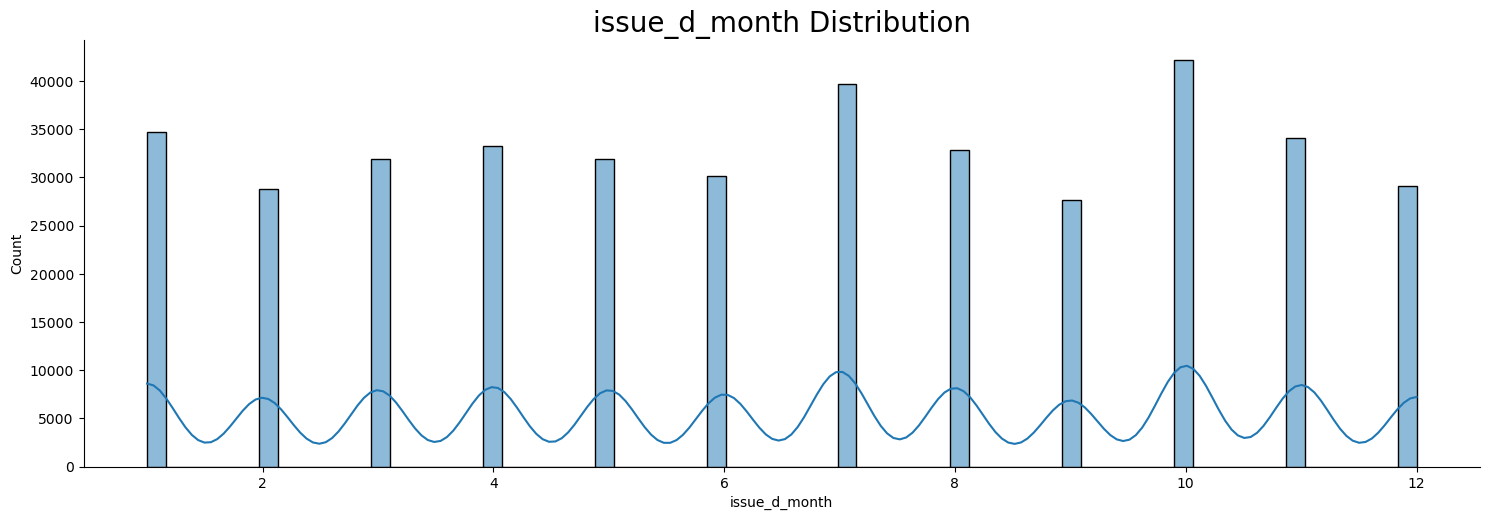

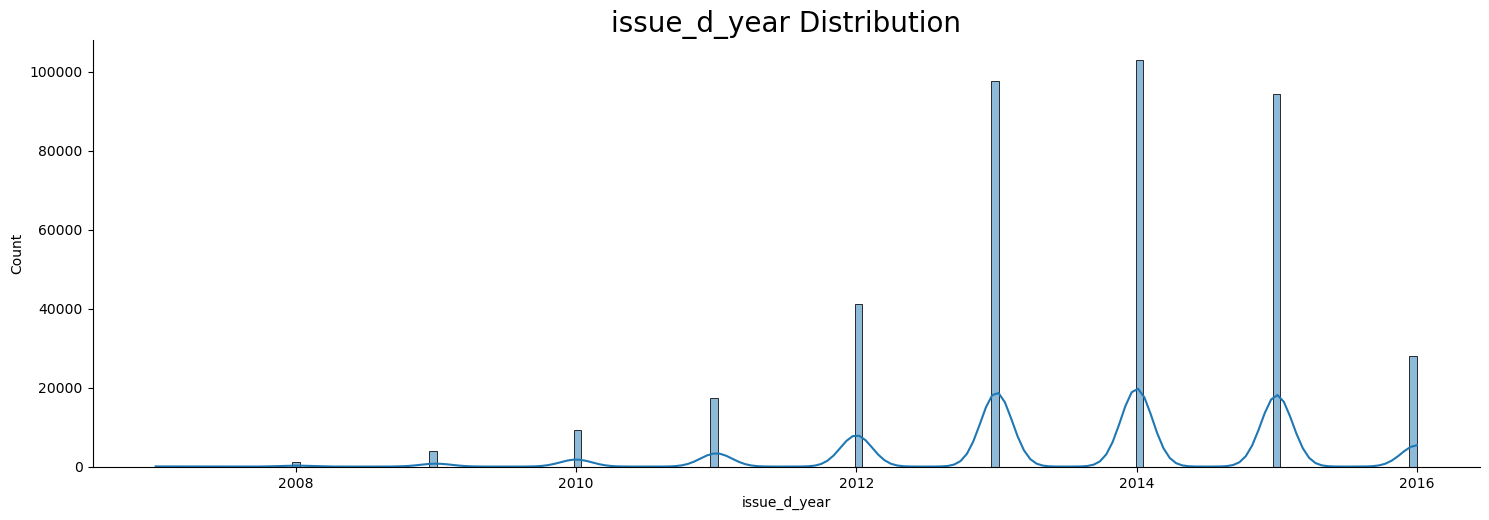

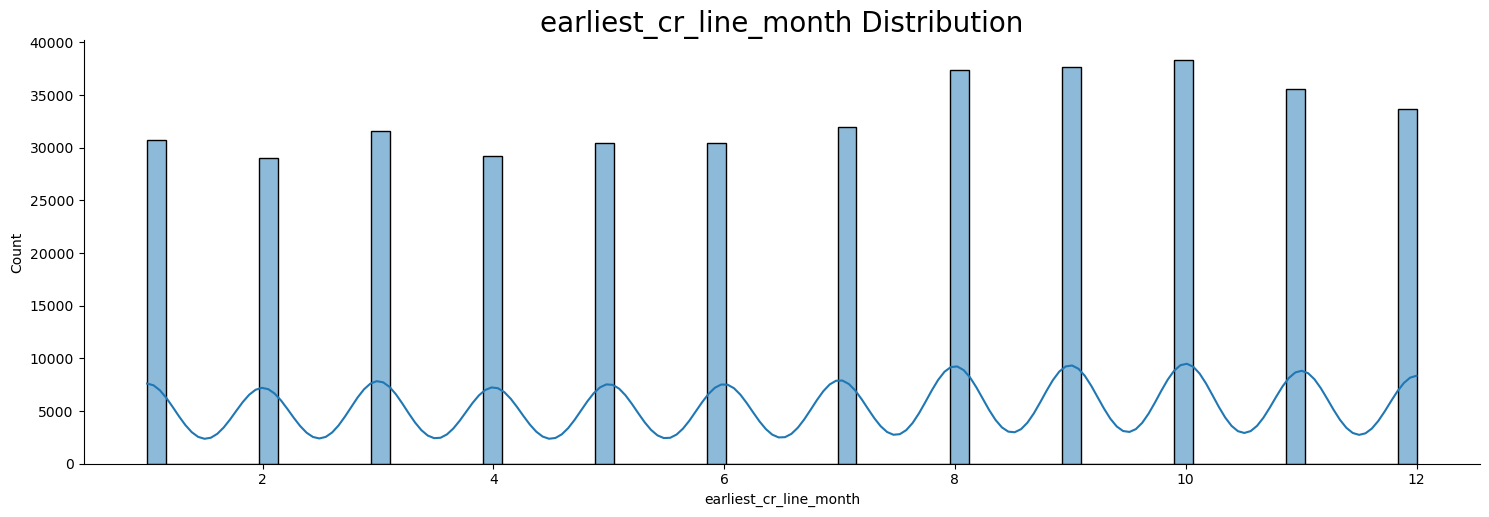

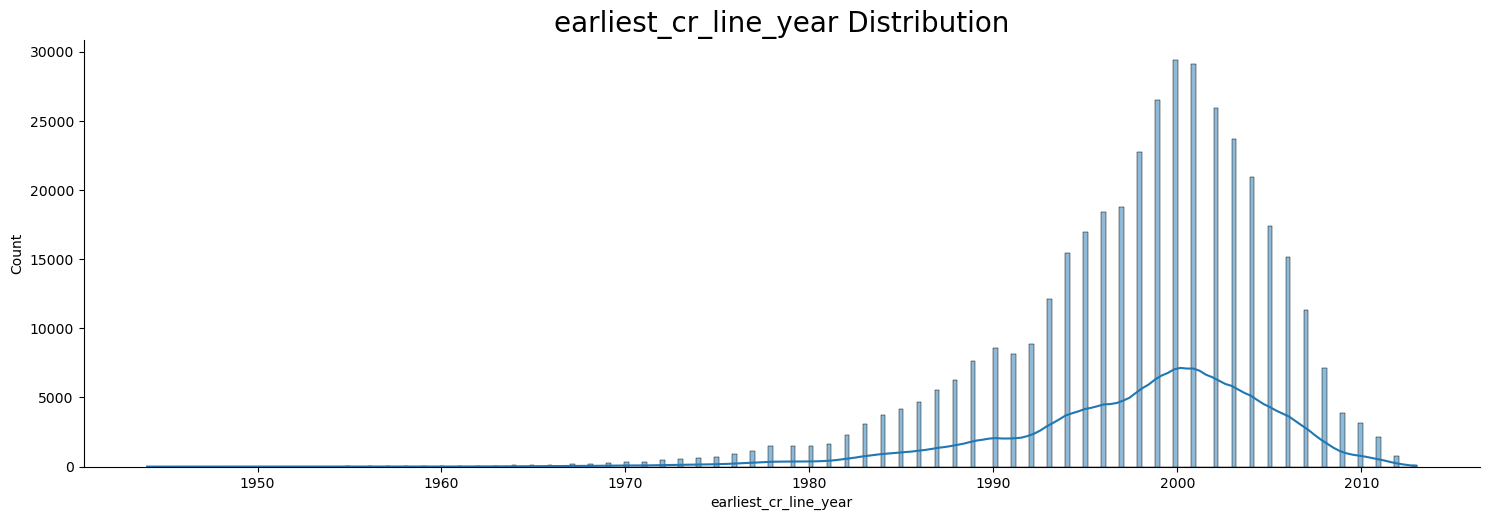

In [ ]:
for i in num_cols:
  sns.displot(df[i],kde=True,height=5, aspect=3)
  plt.title(f'{i} Distribution',fontsize=20)

### Bivariate Analysis

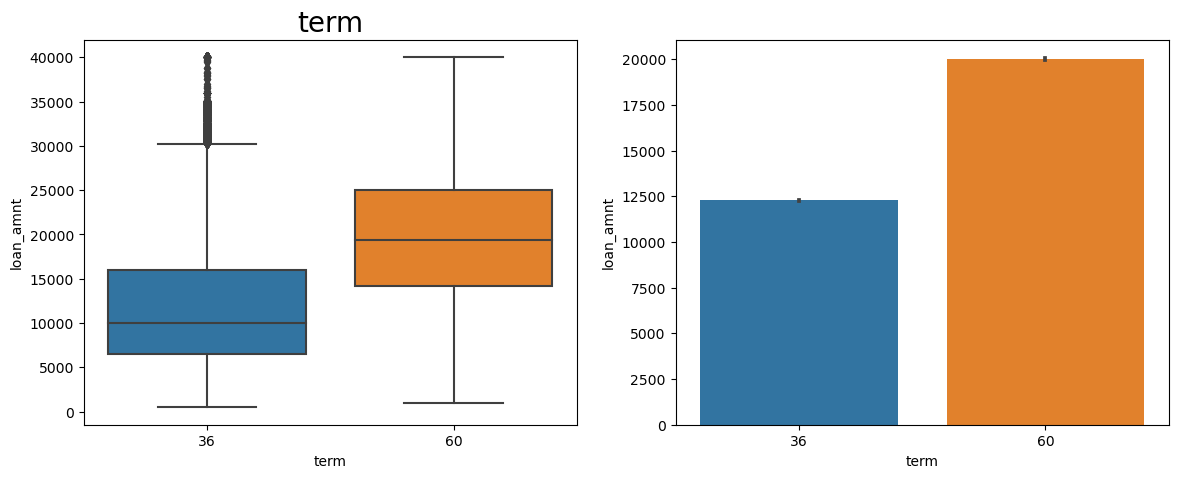

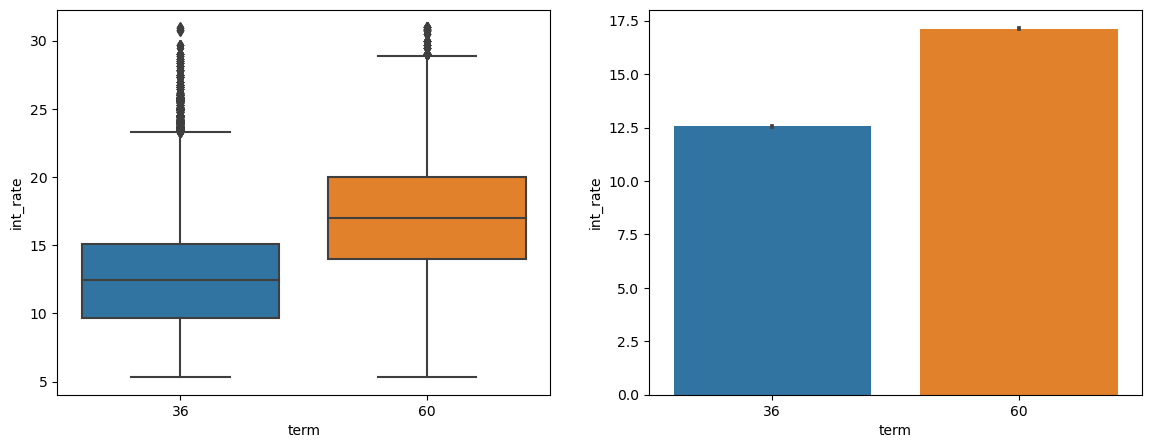

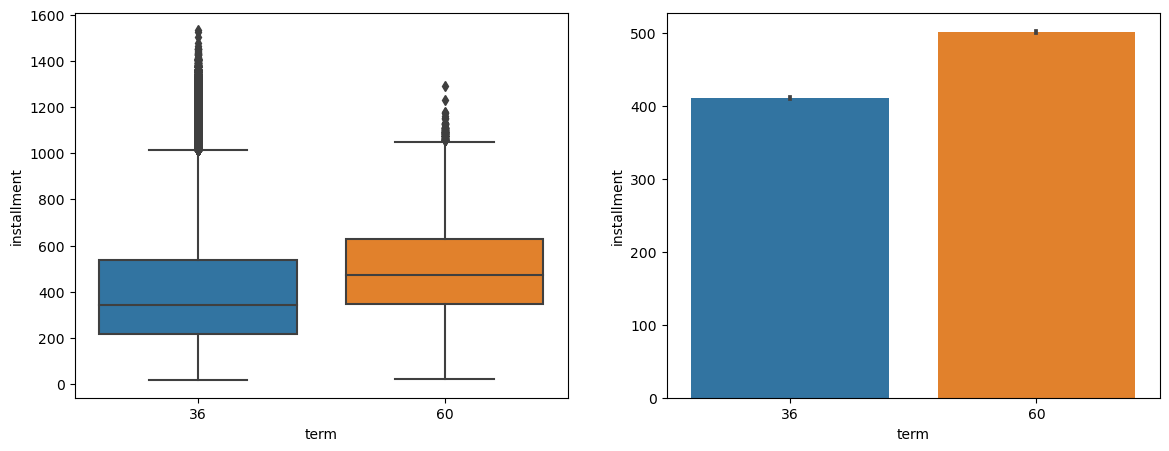

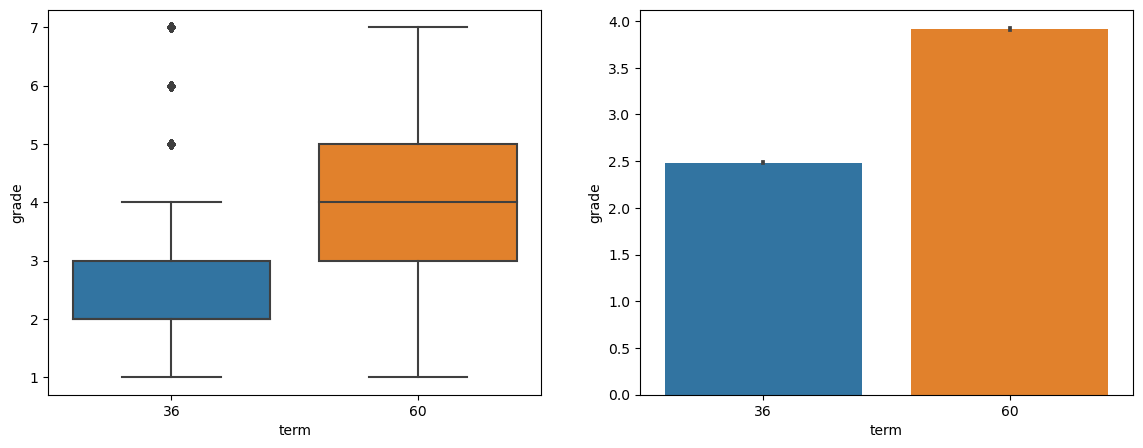

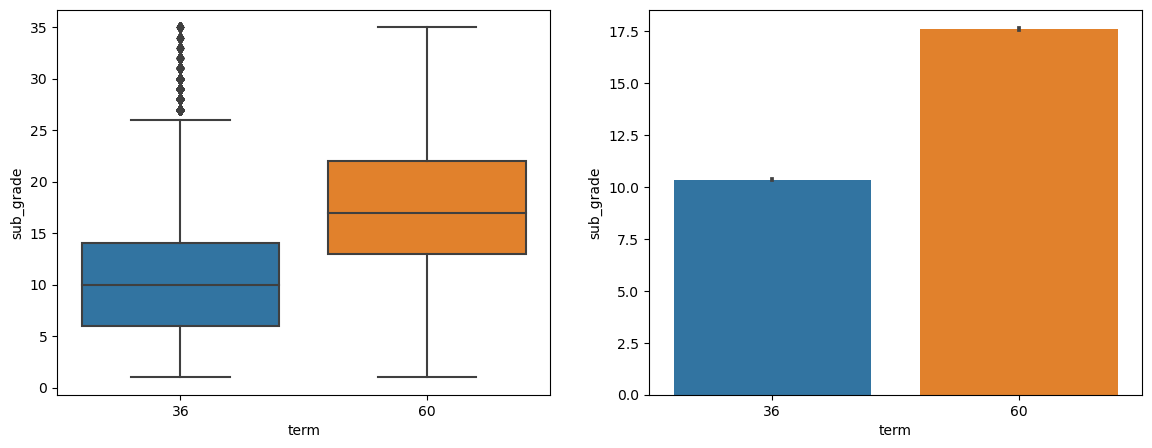

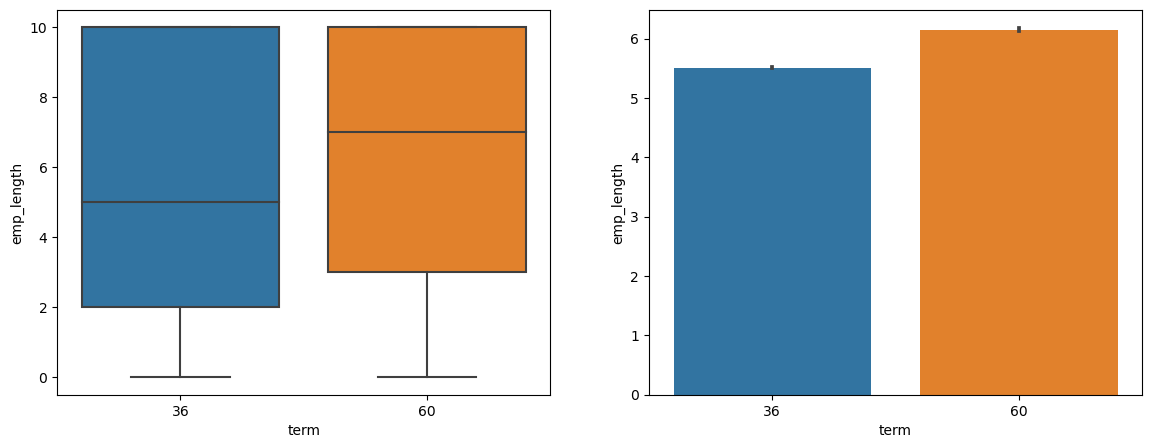

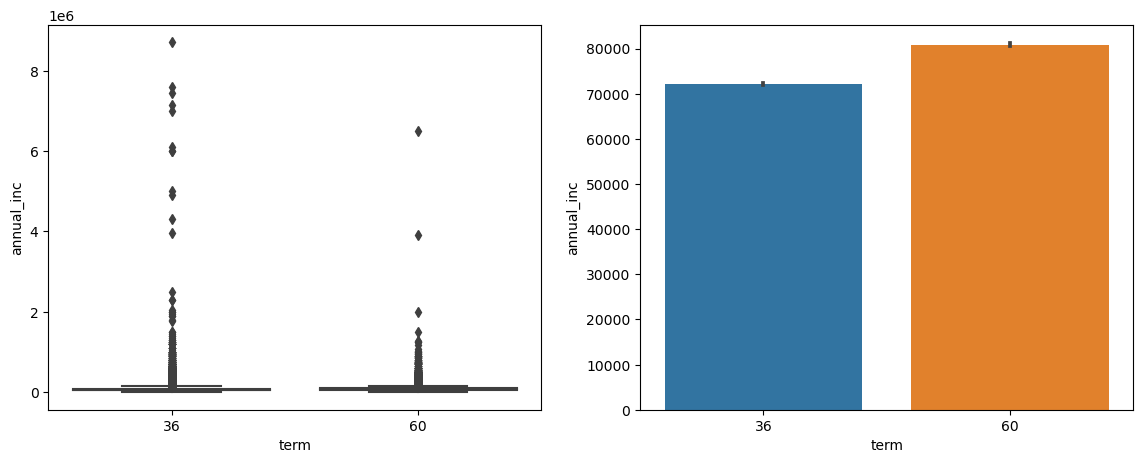

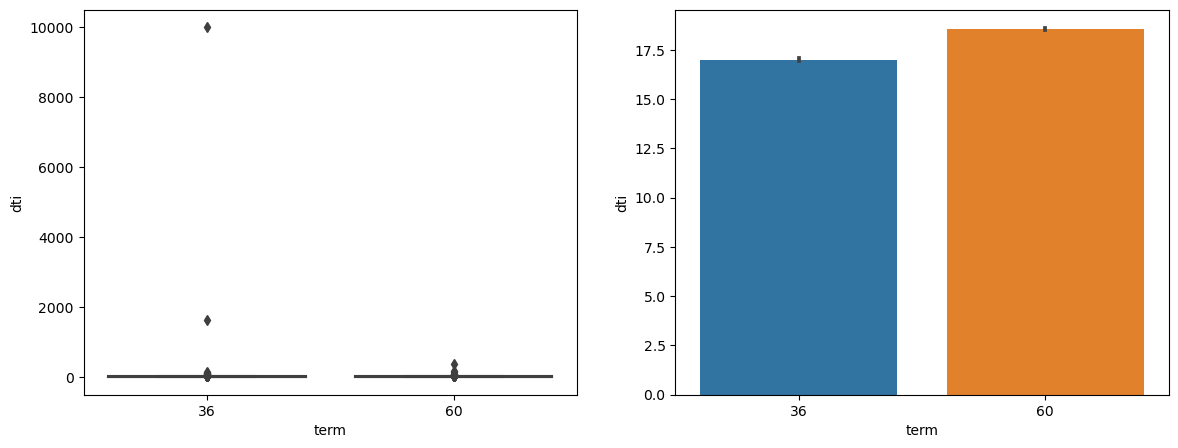

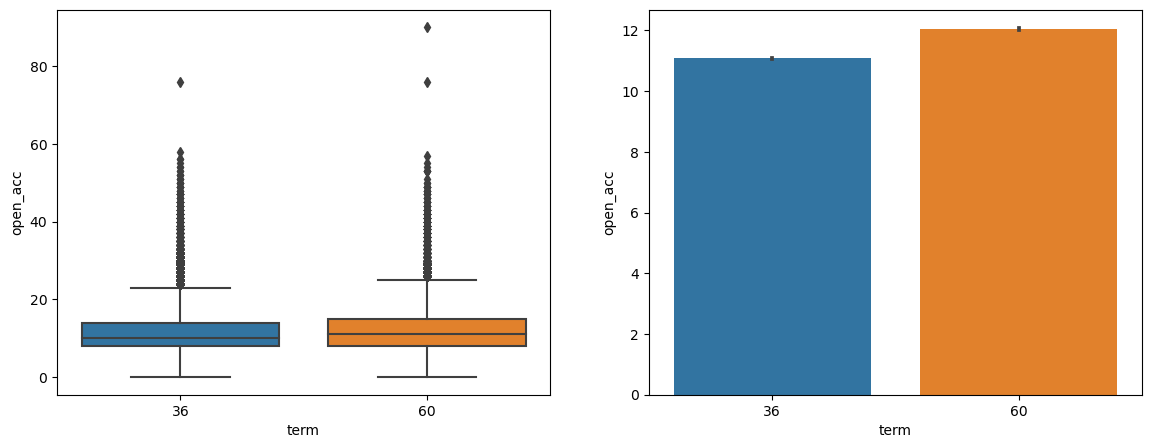

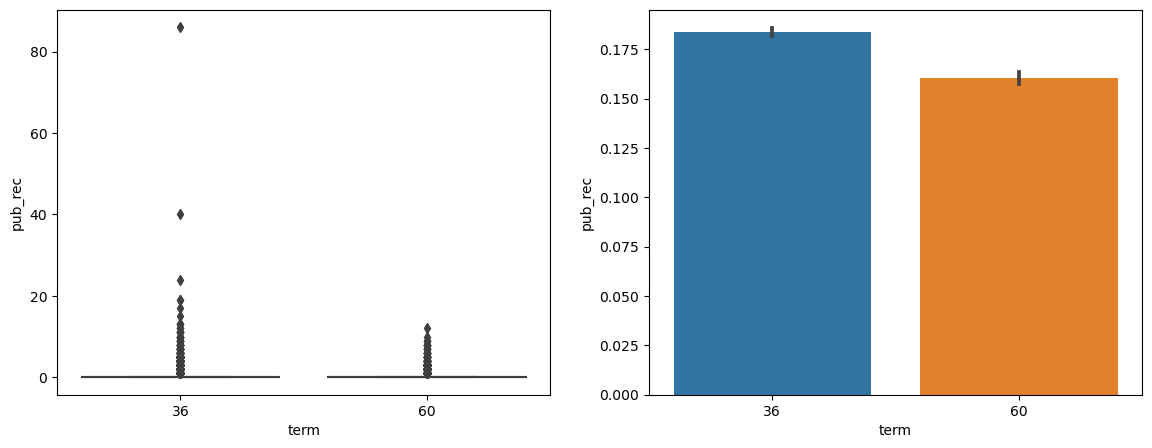

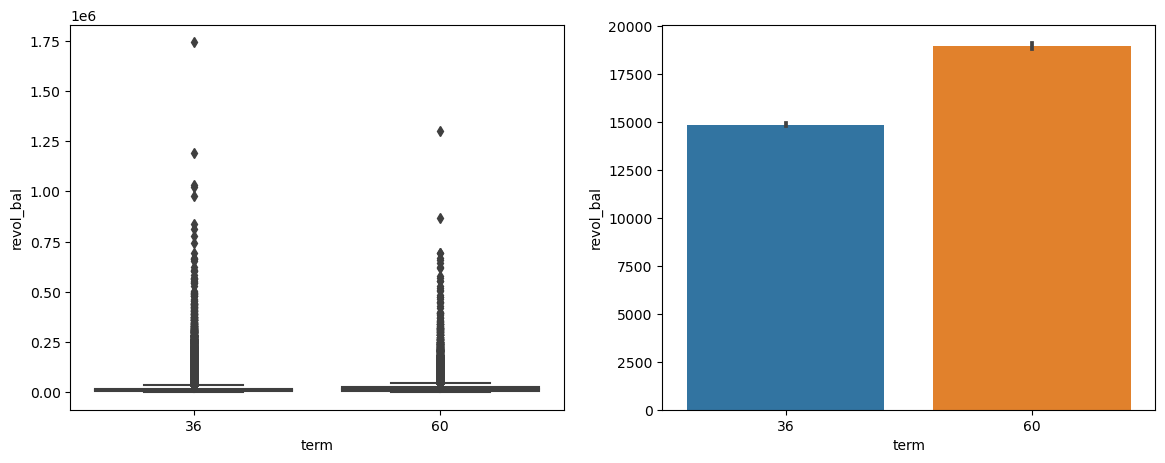

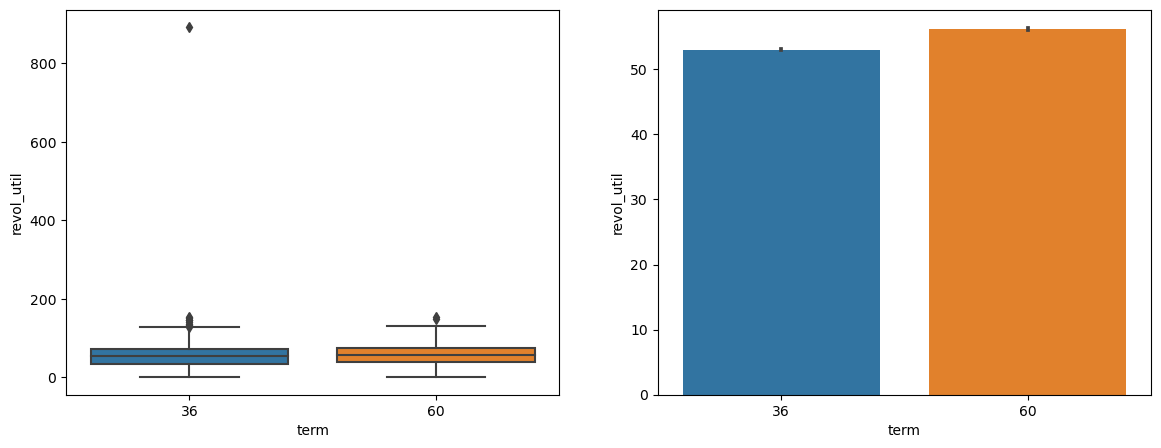

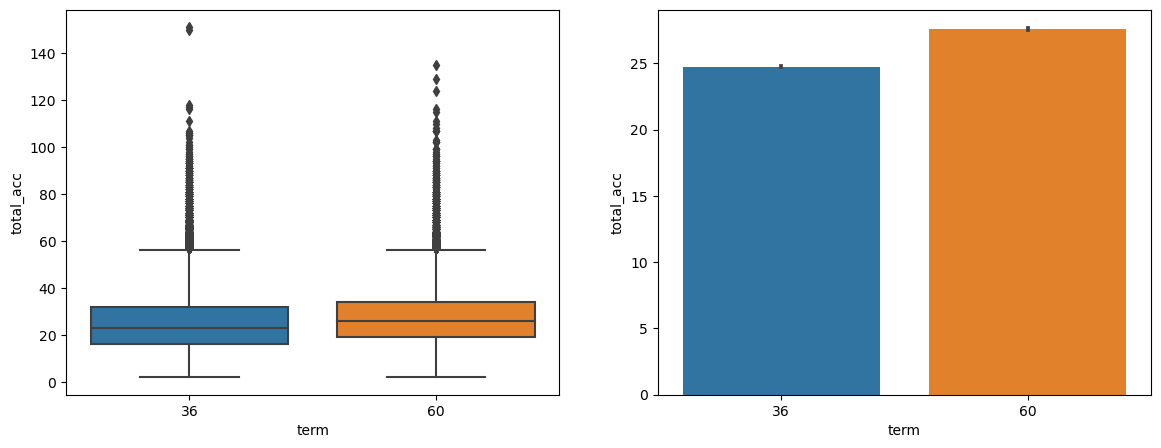

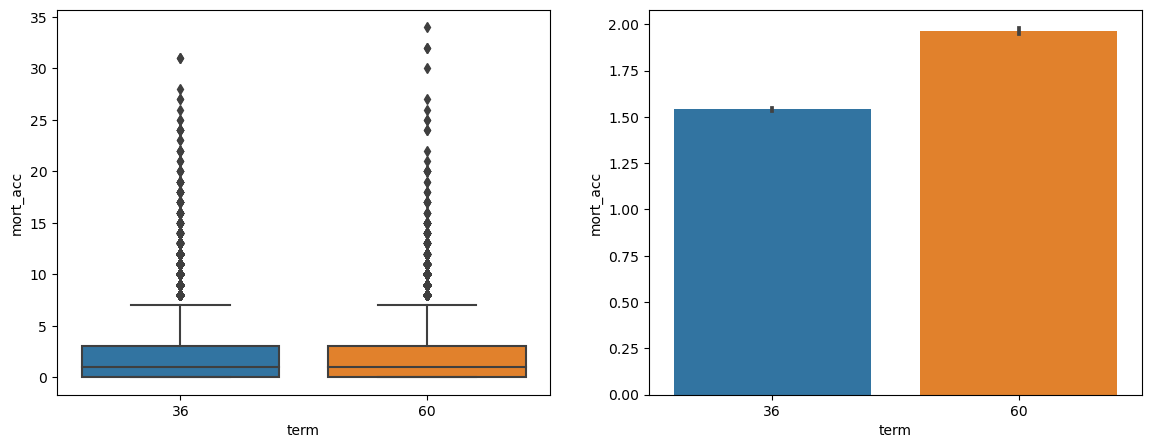

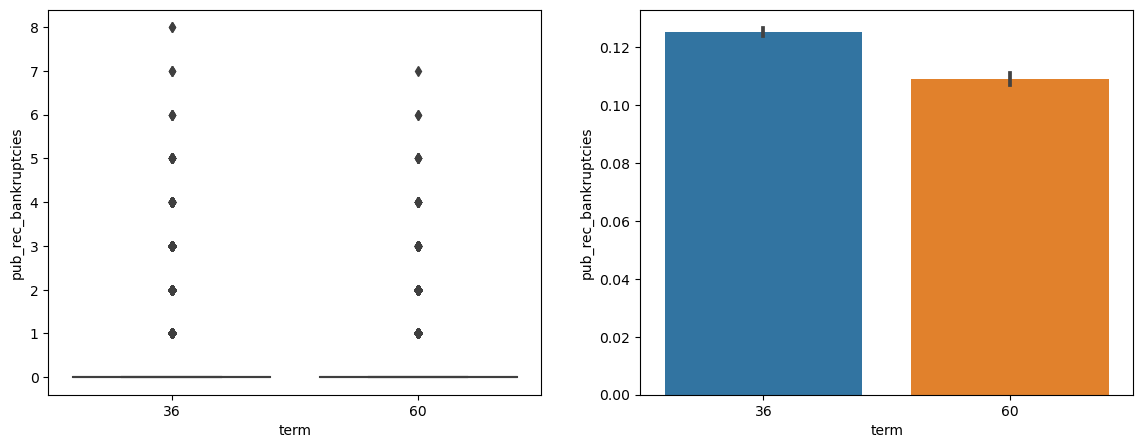

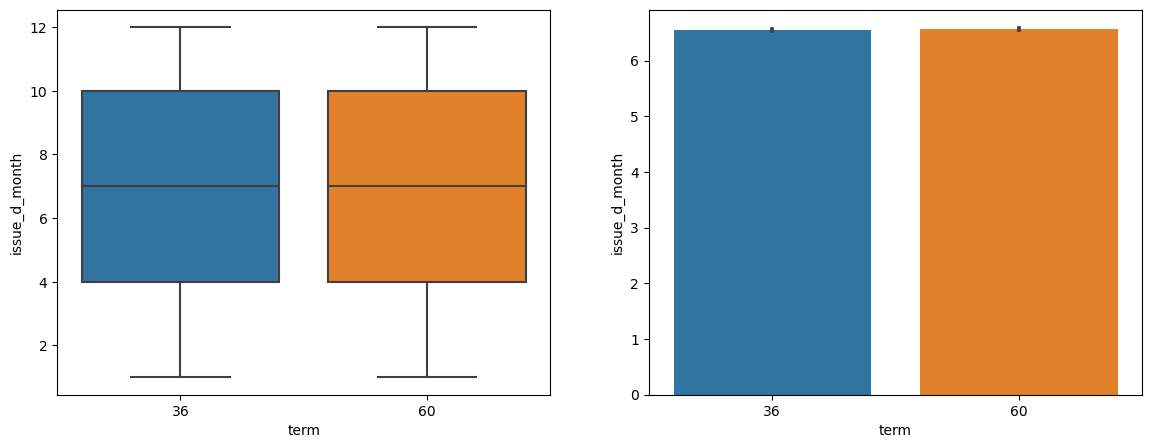

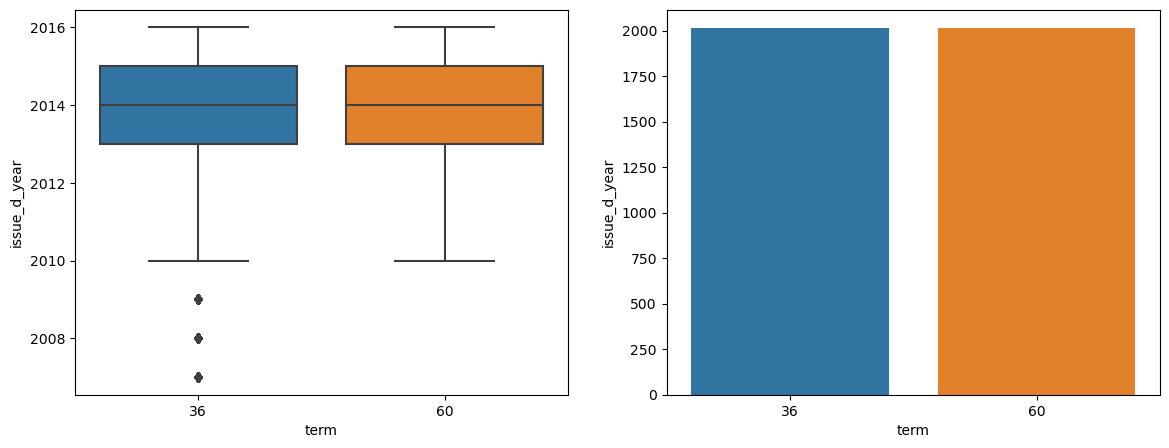

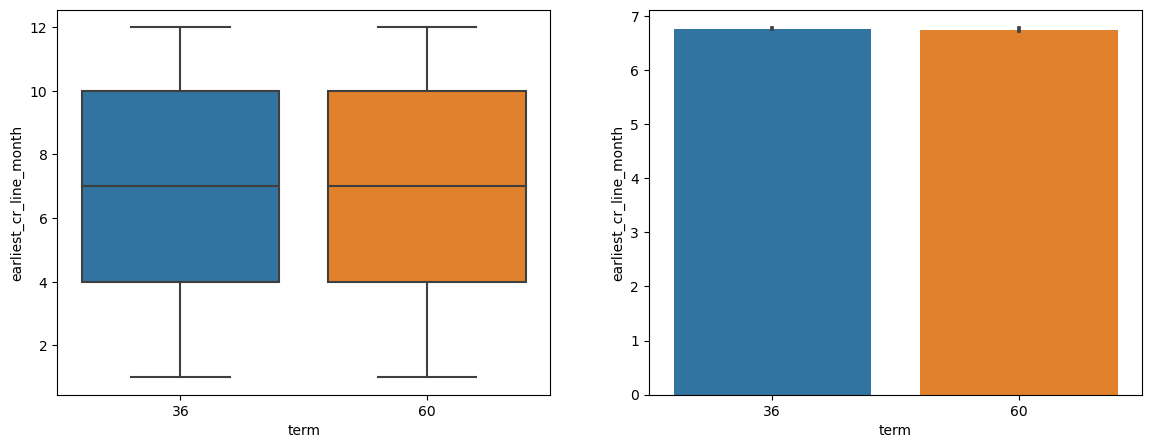

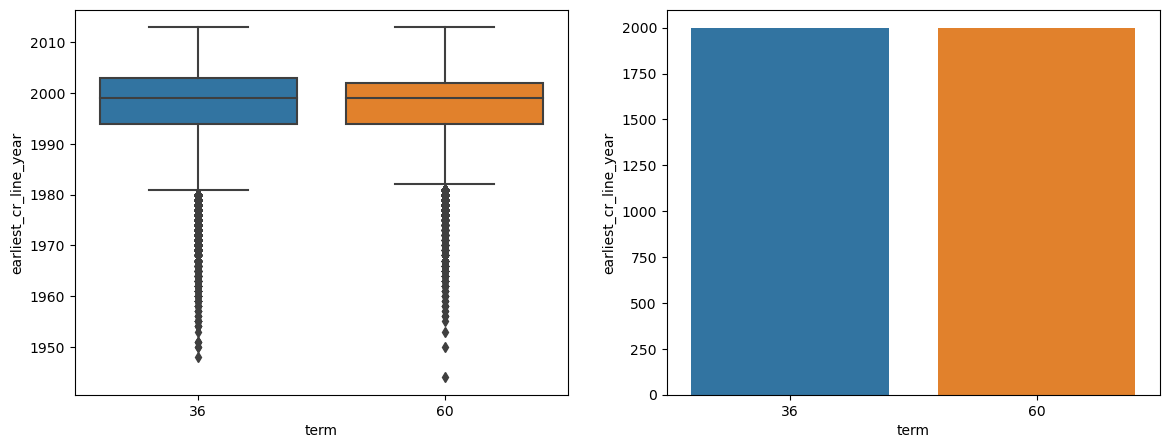

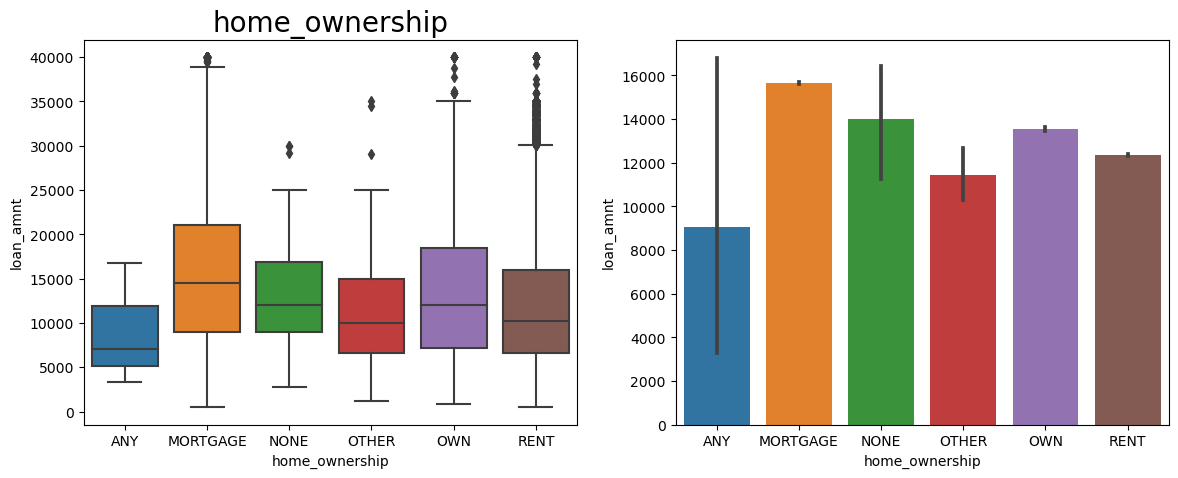

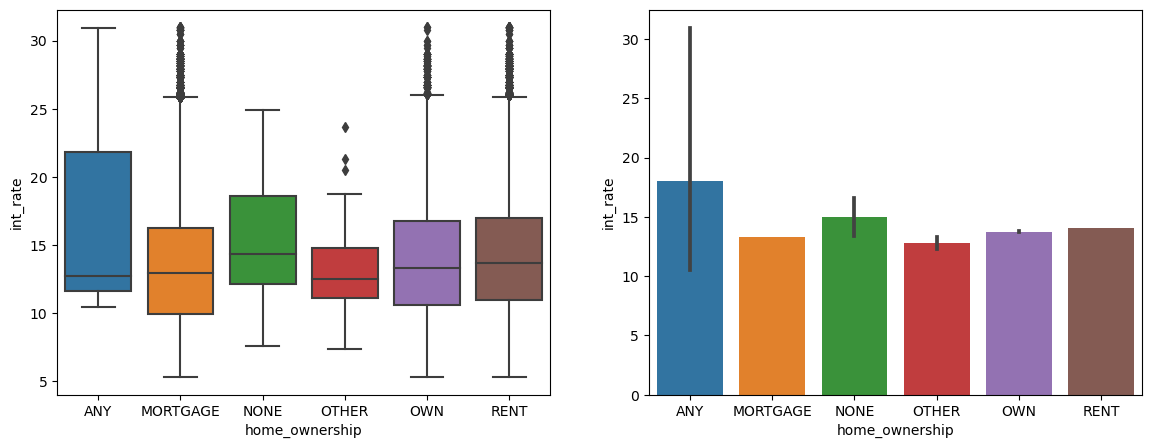

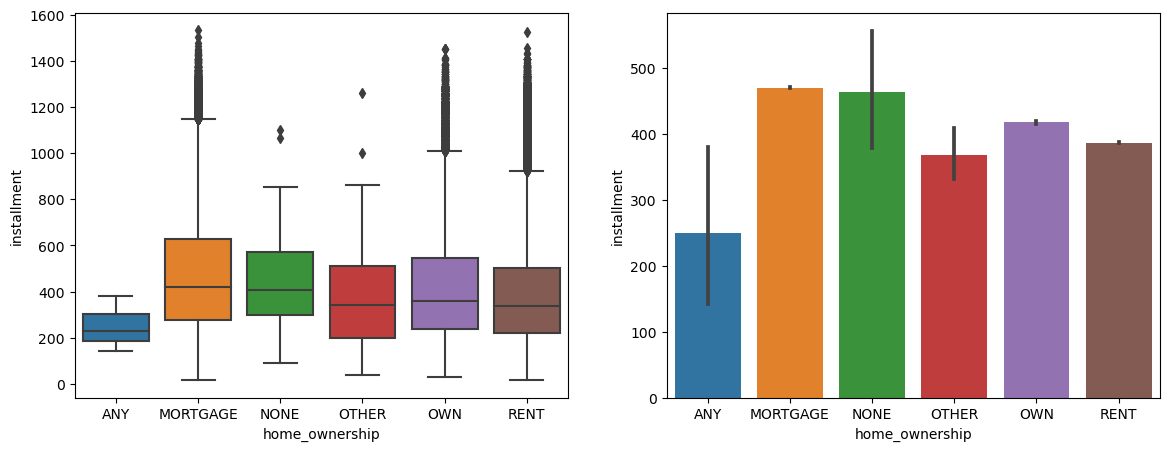

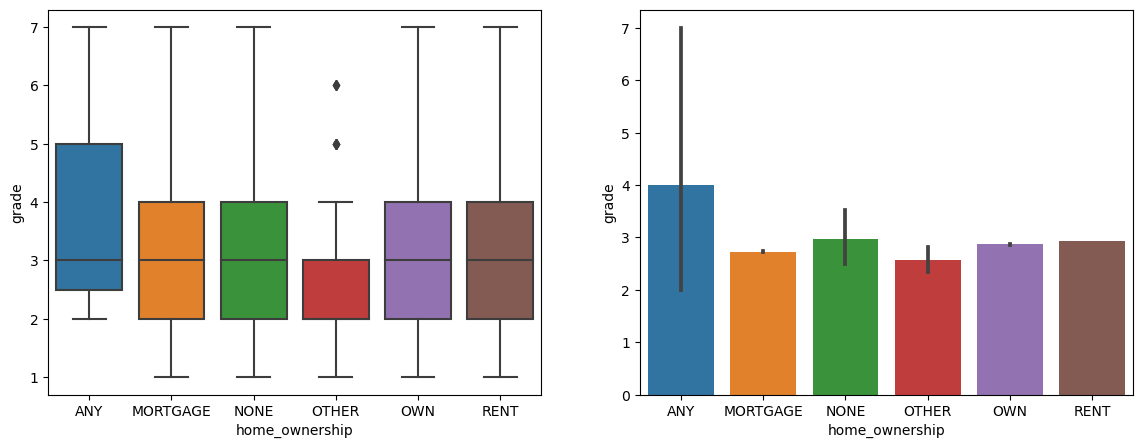

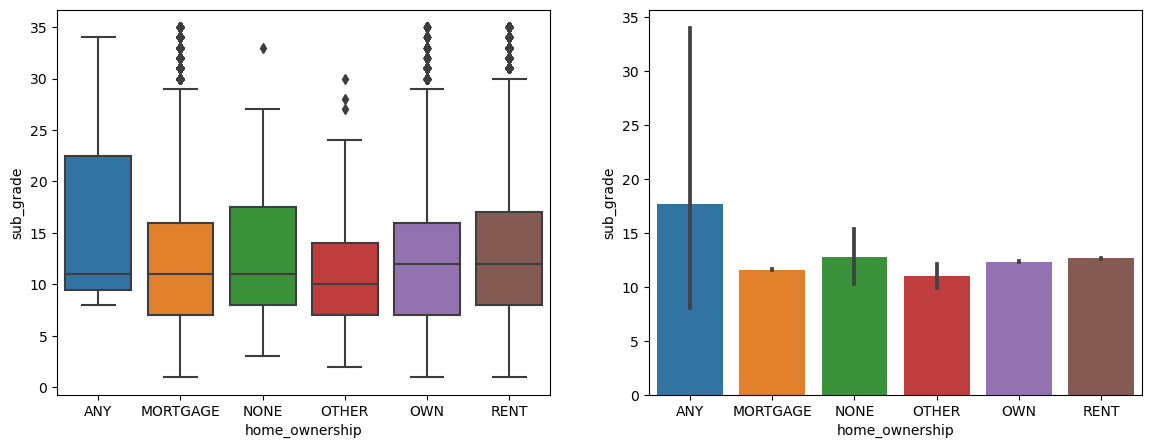

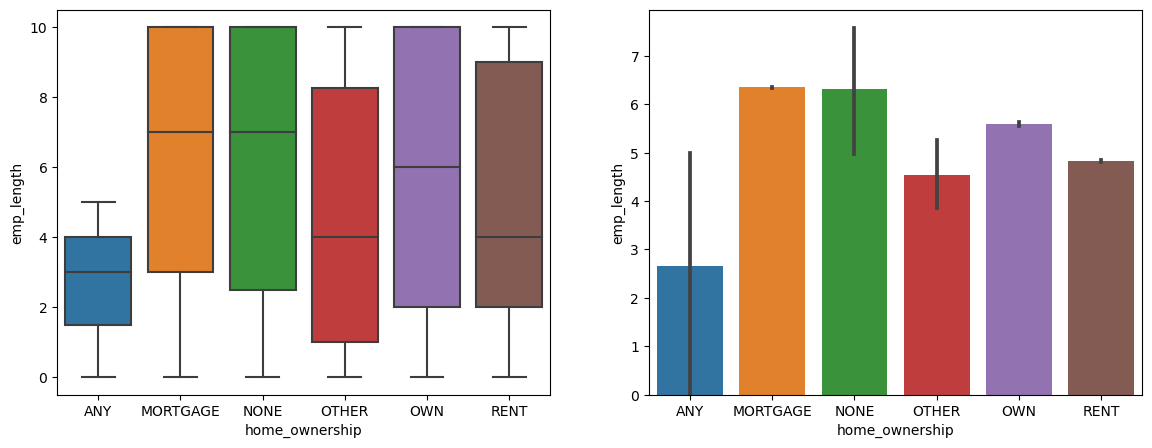

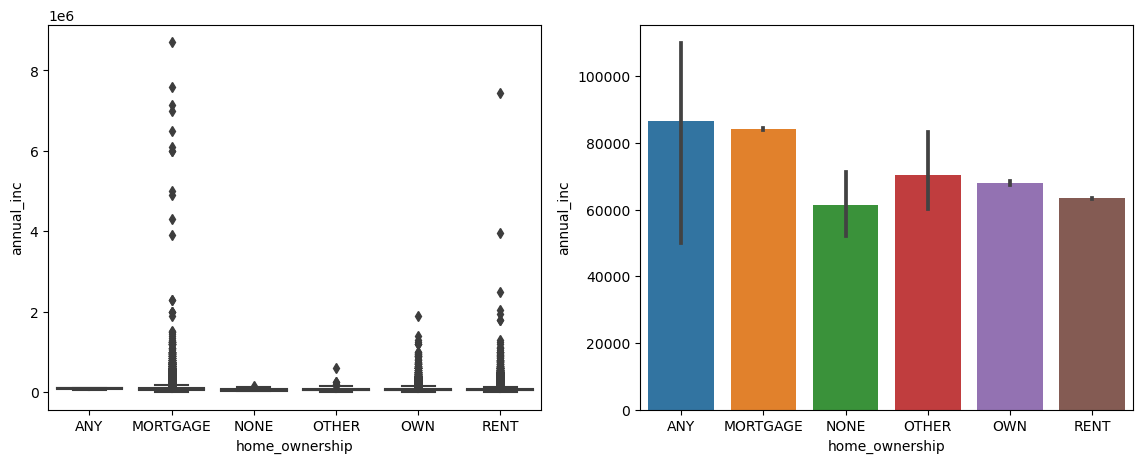

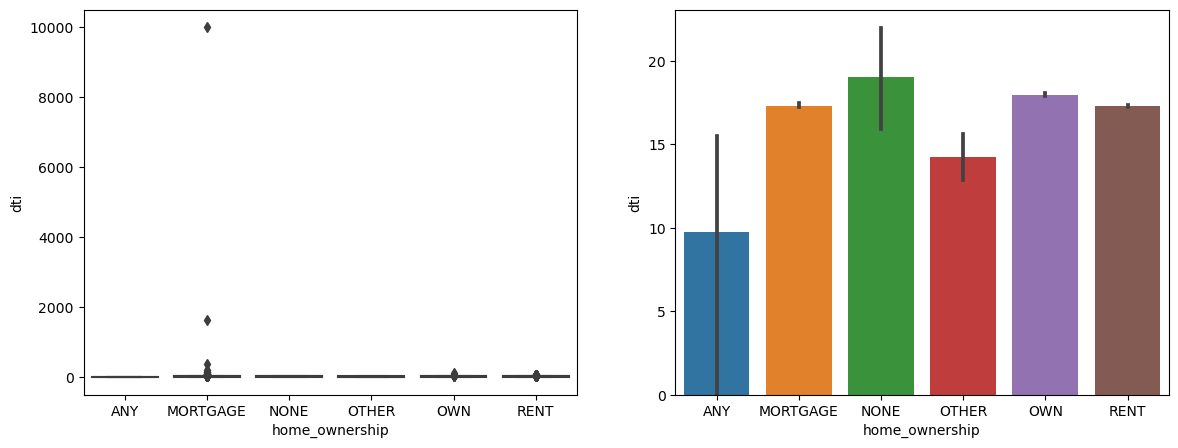

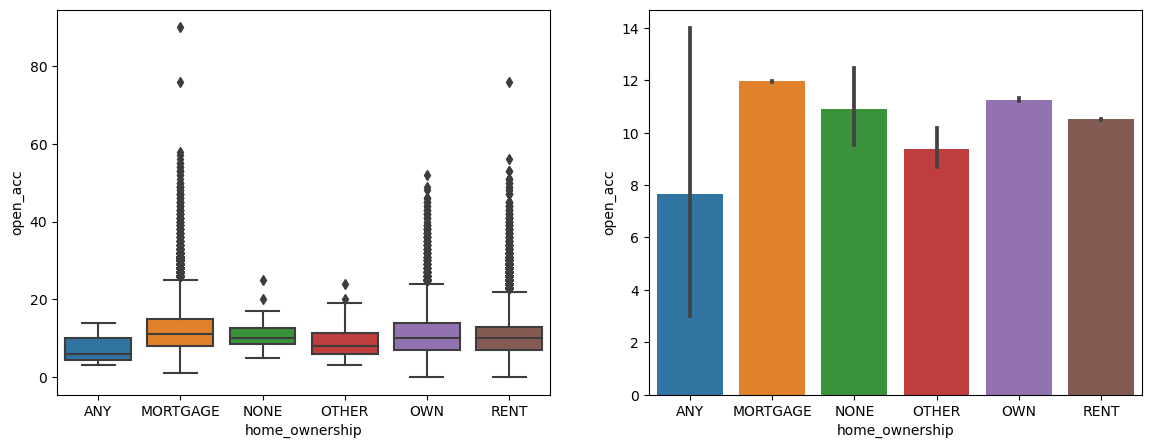

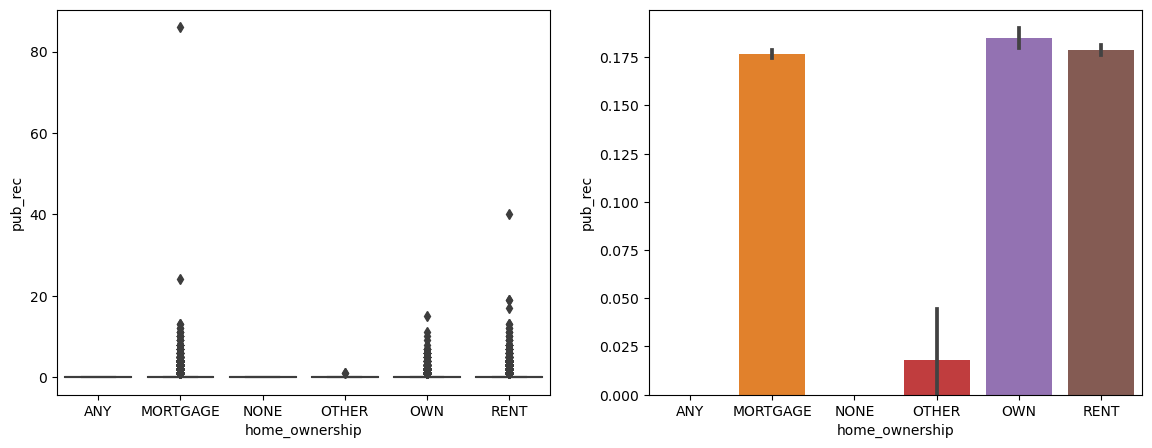

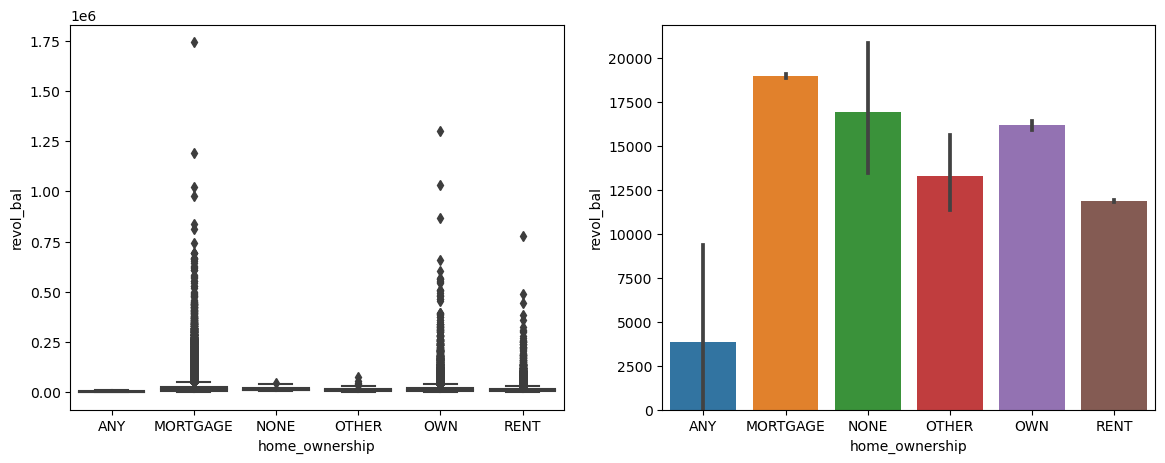

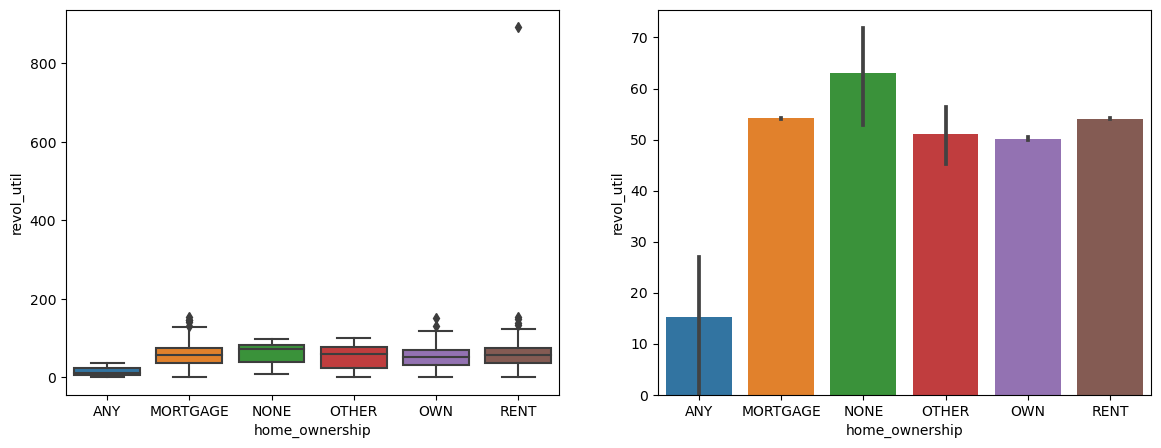

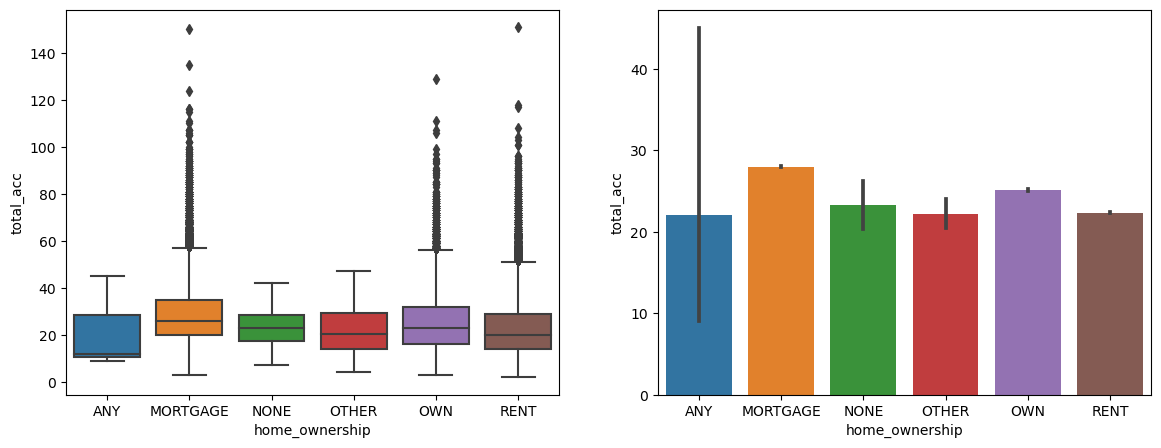

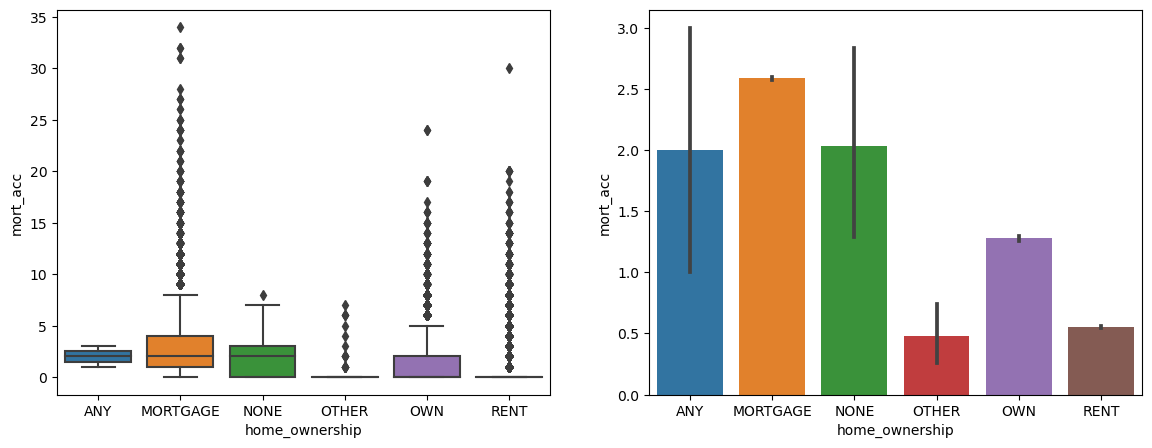

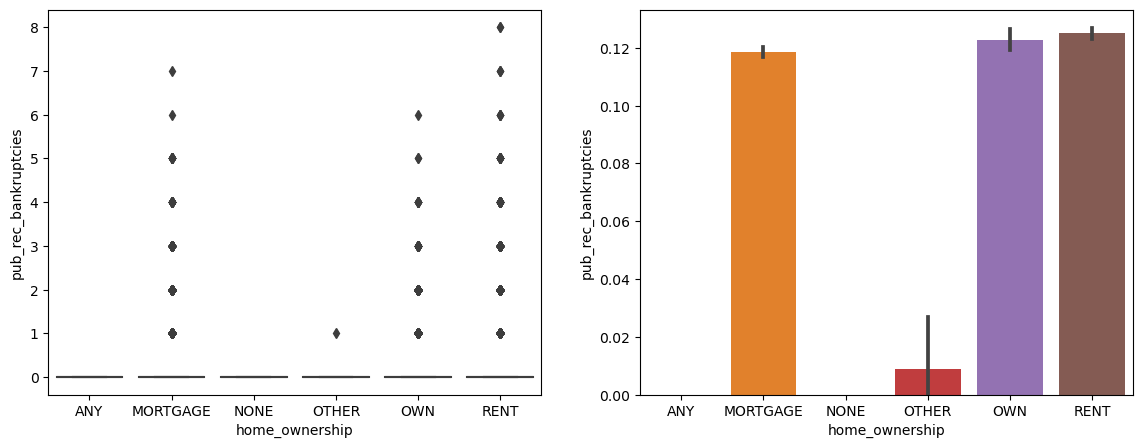

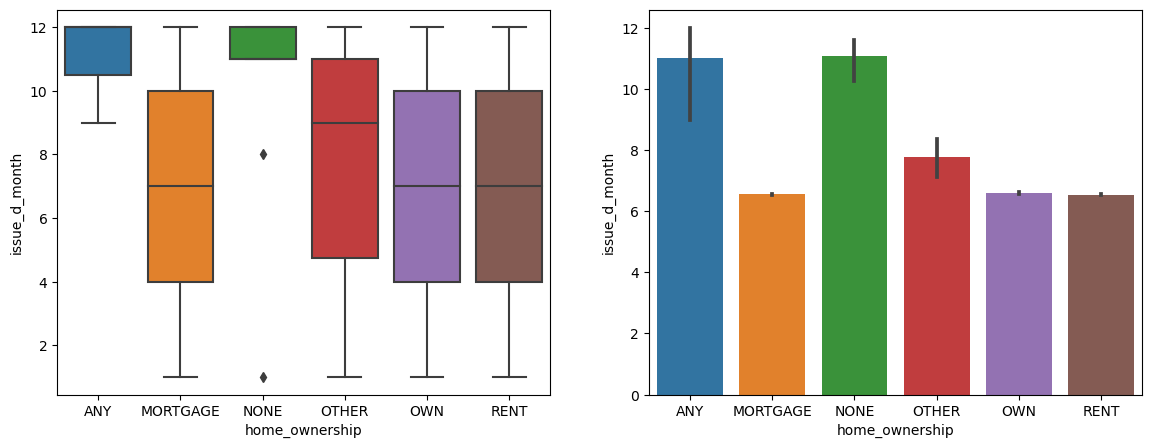

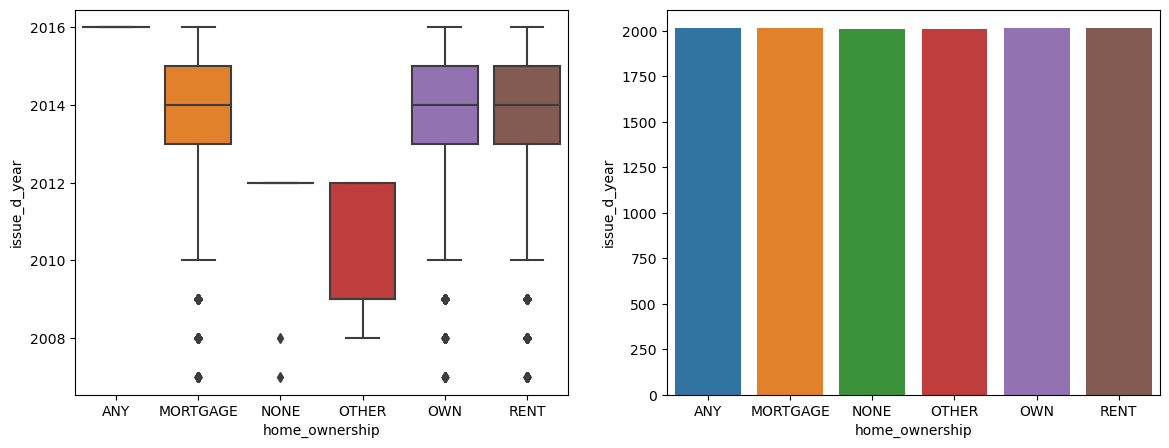

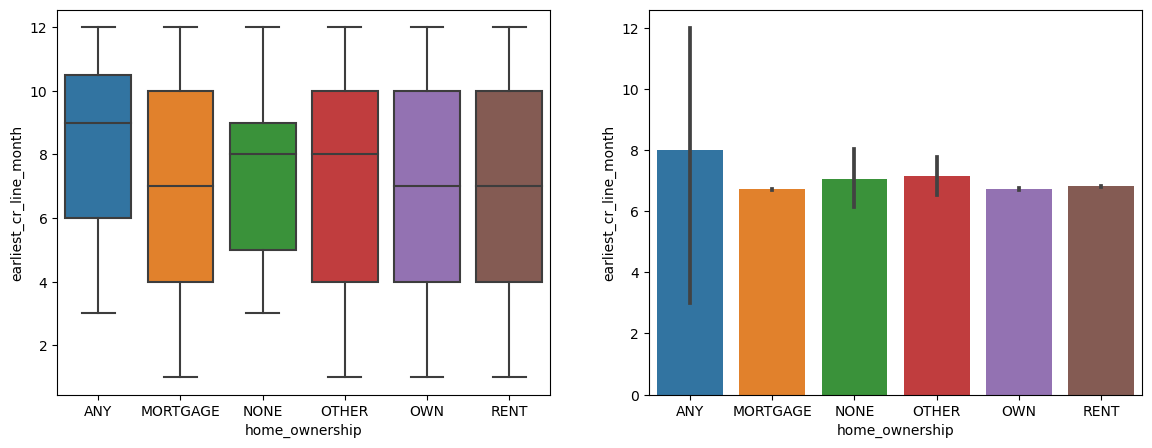

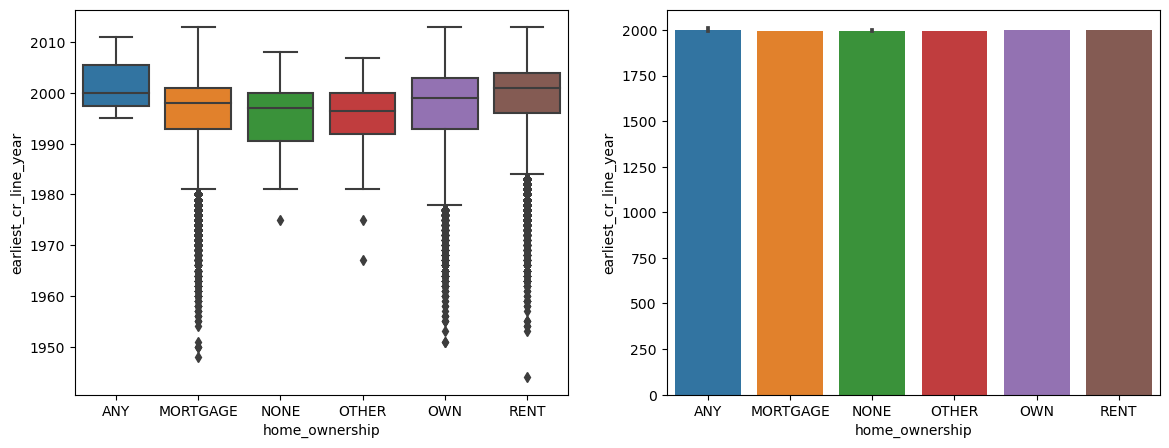

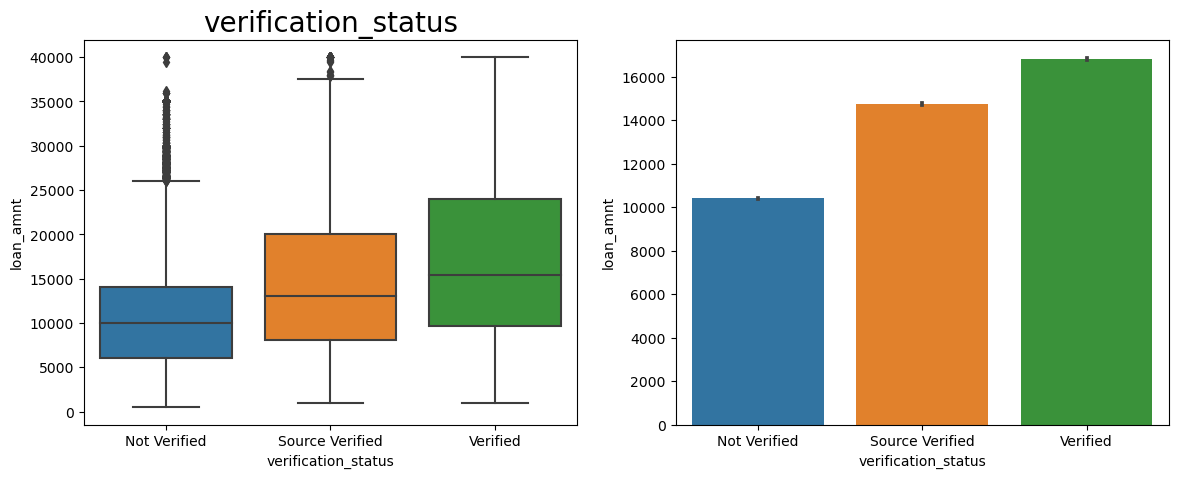

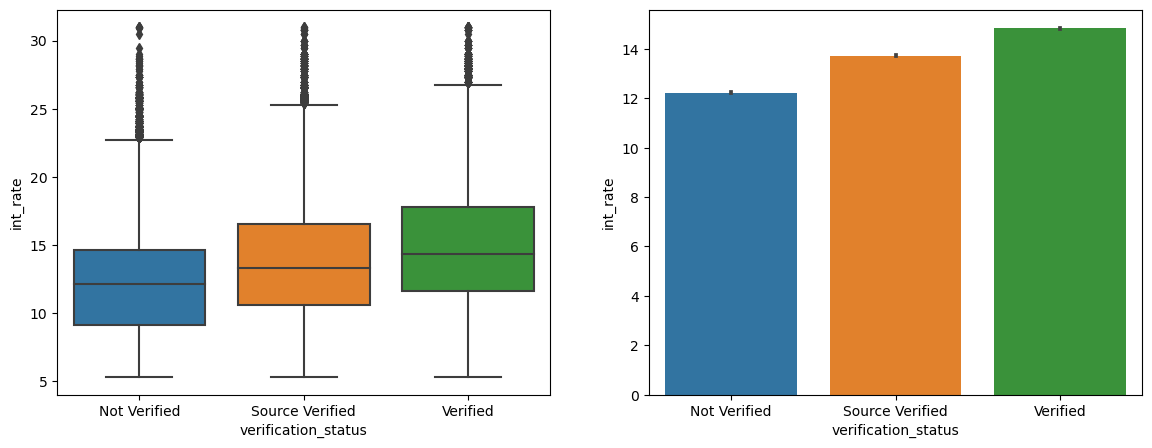

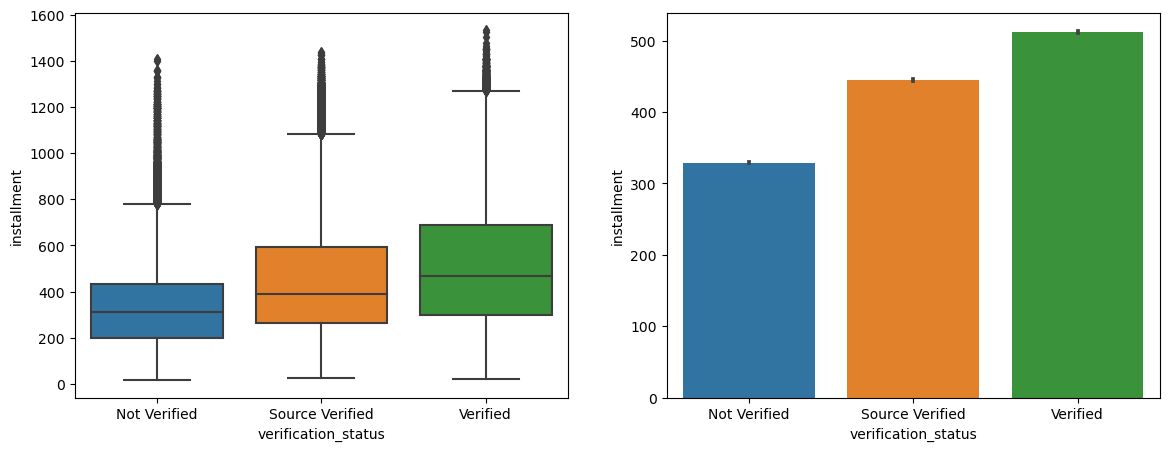

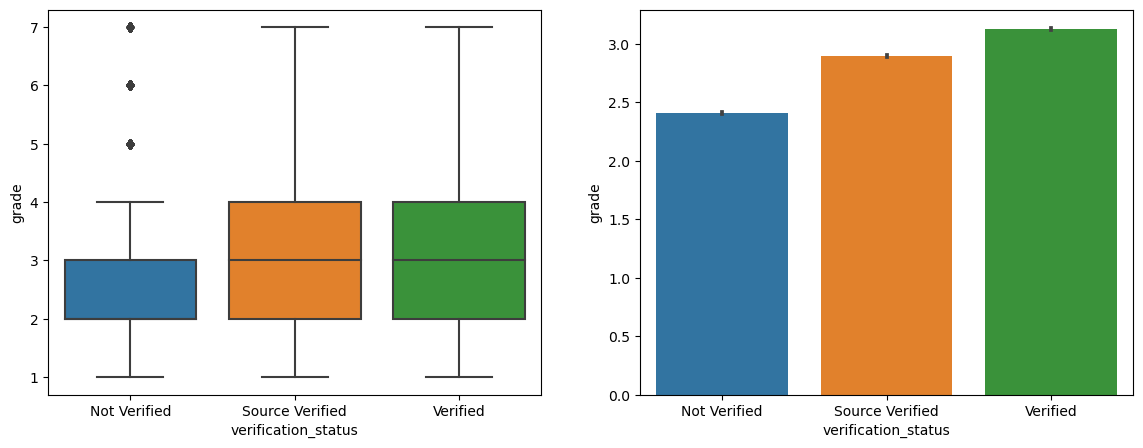

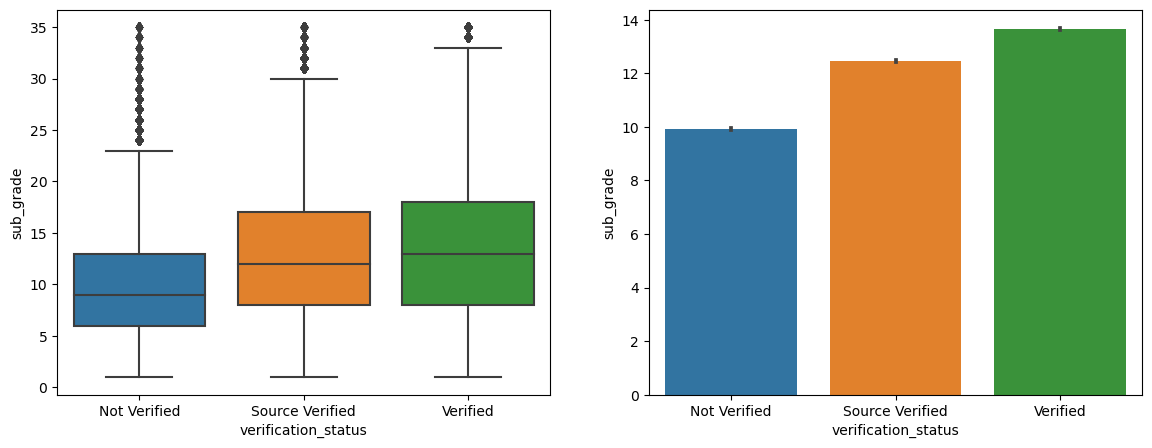

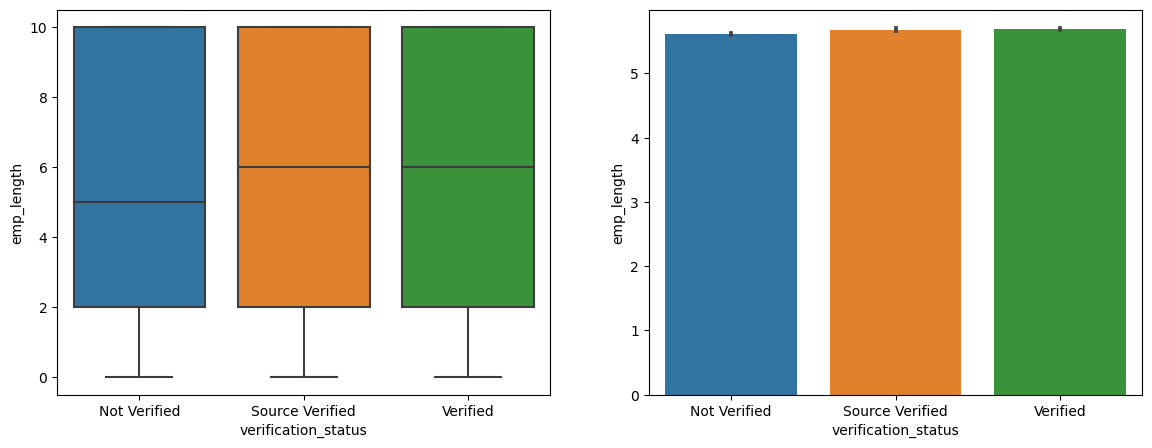

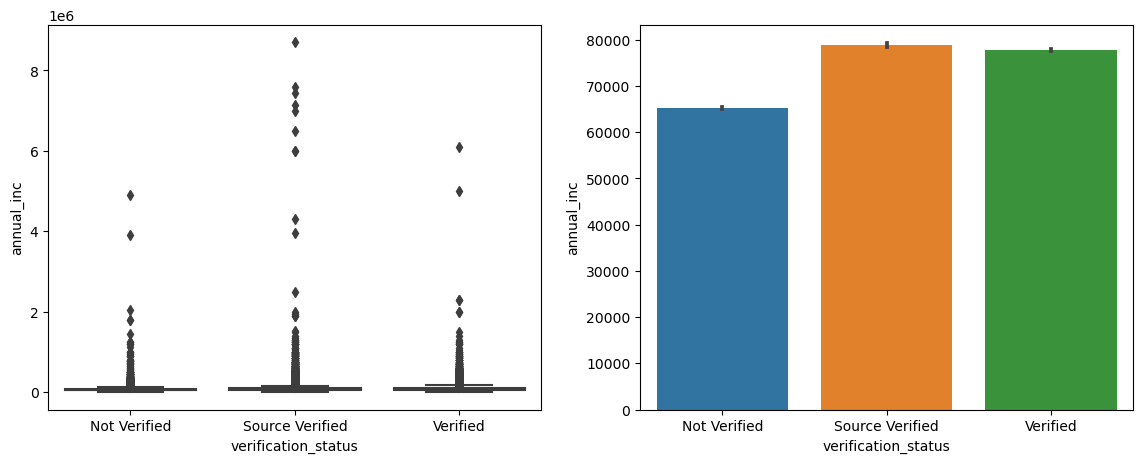

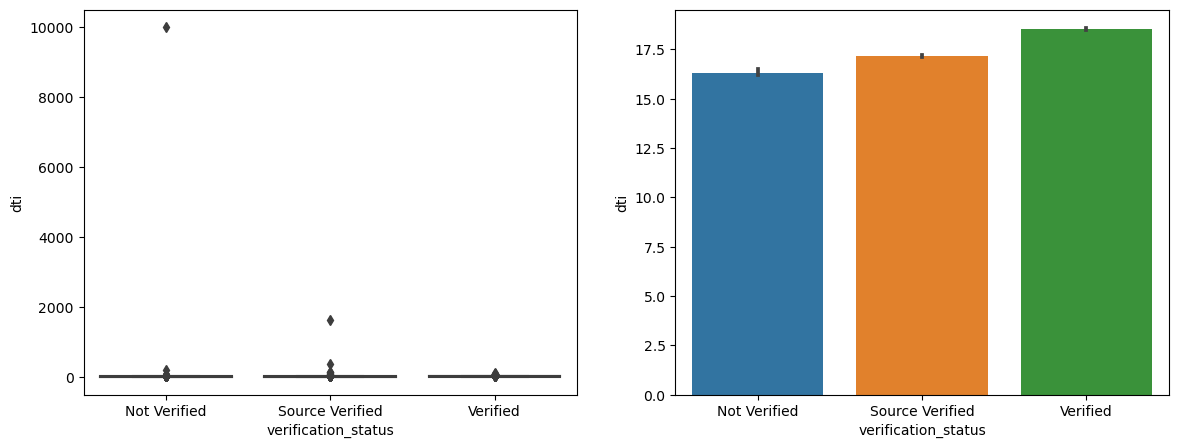

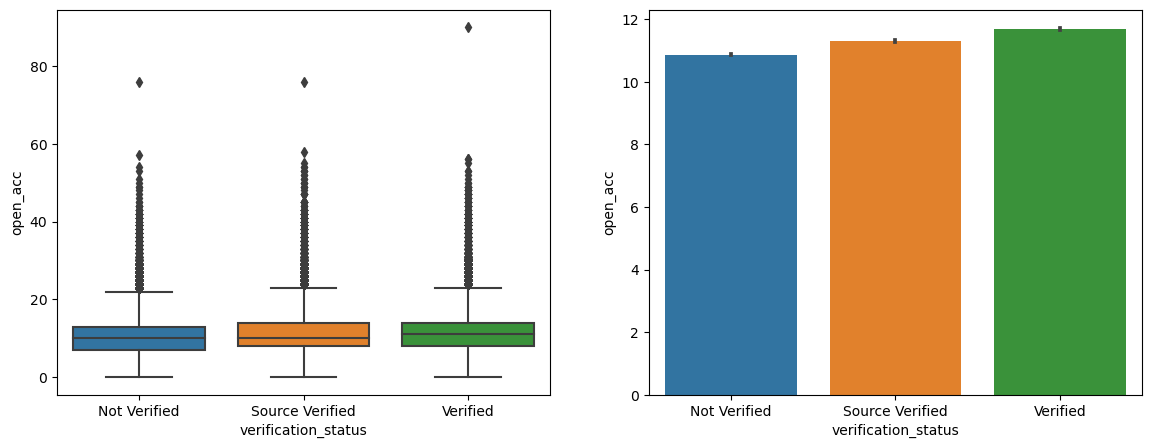

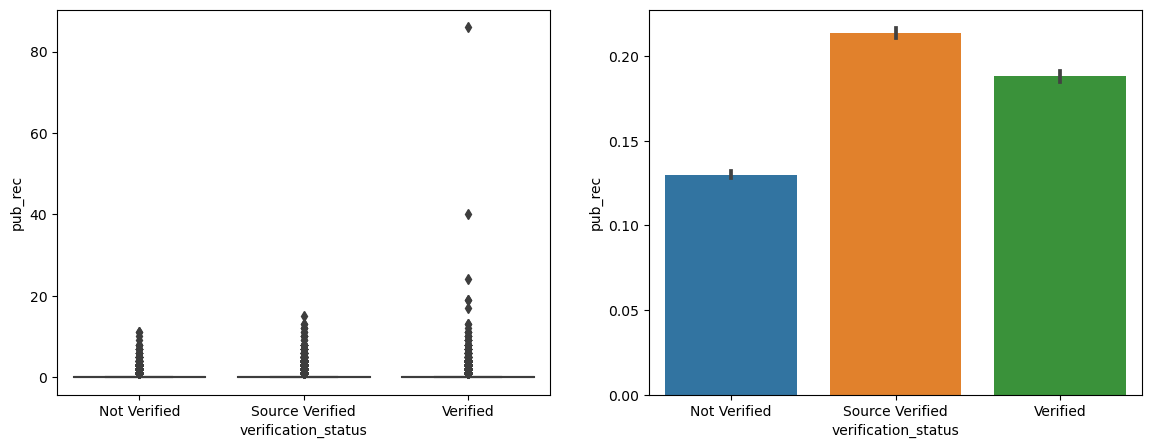

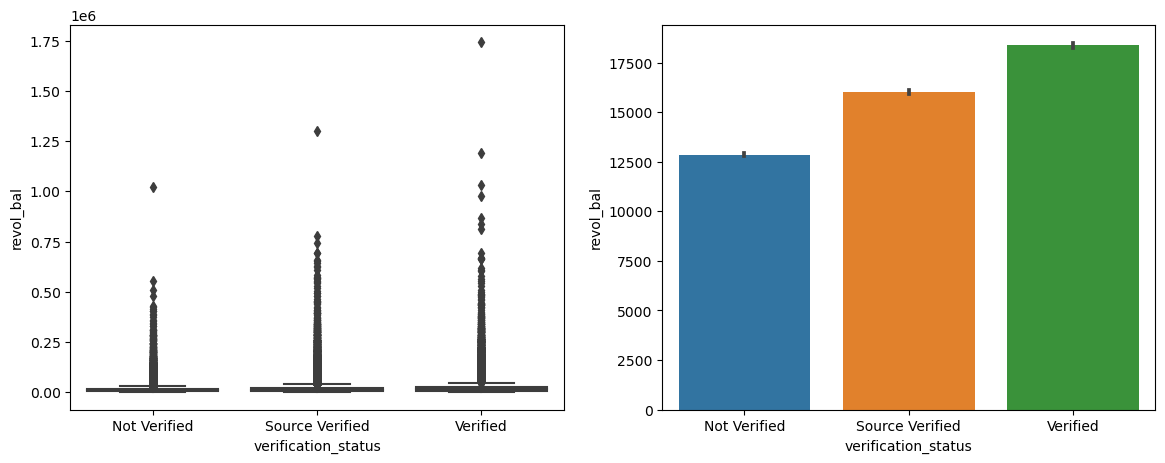

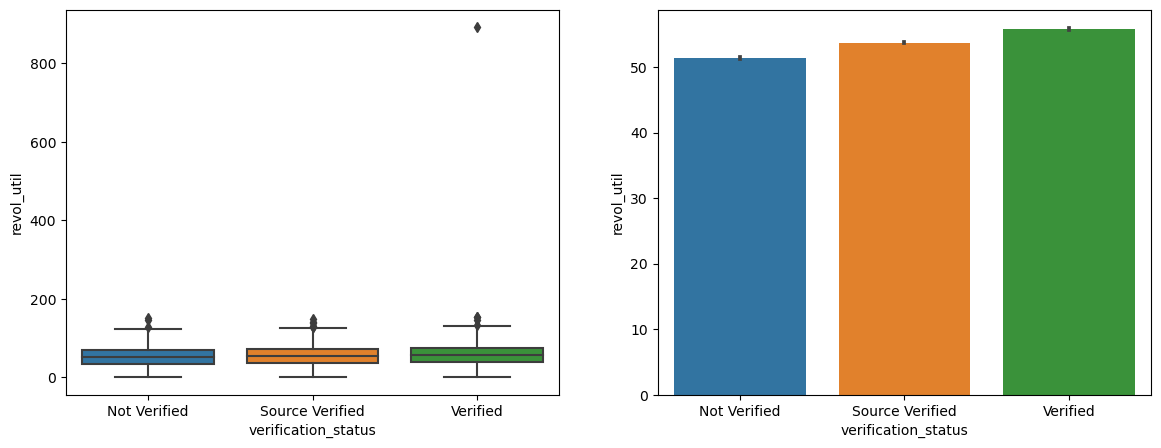

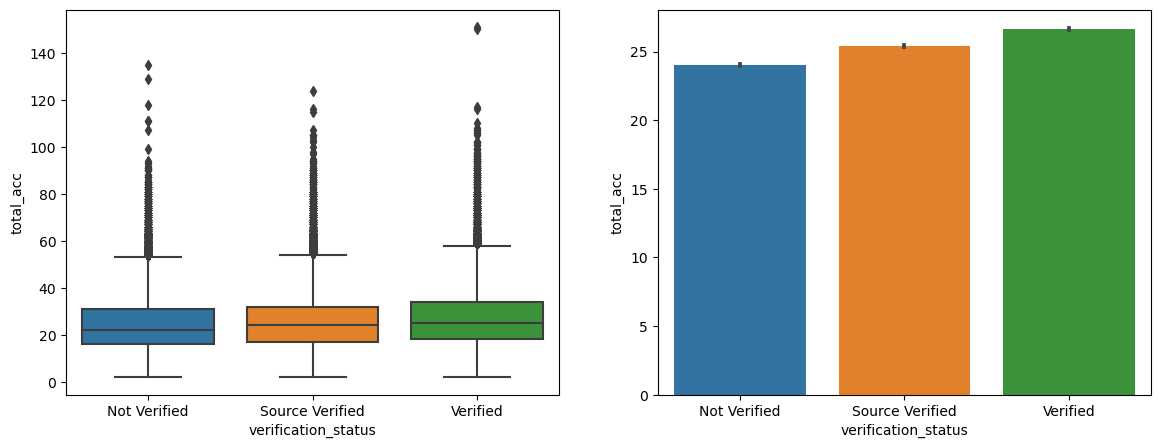

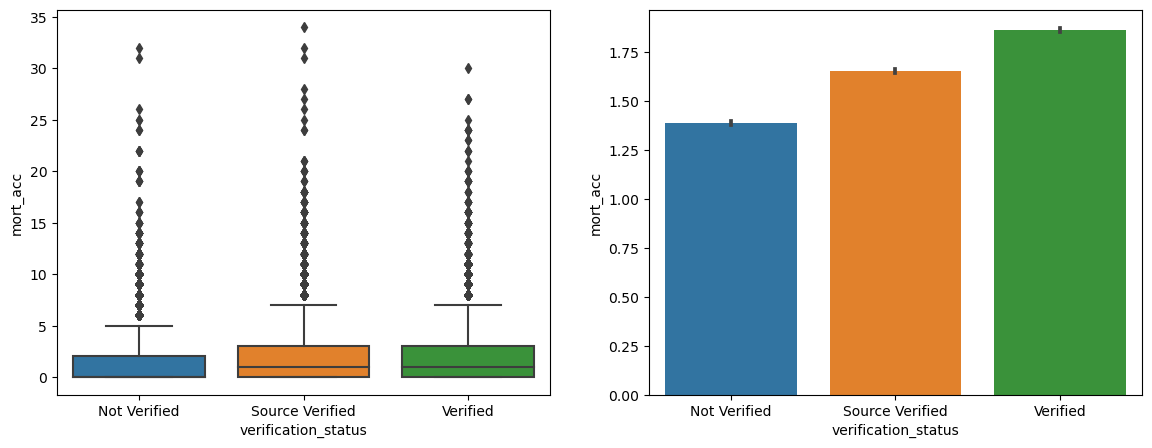

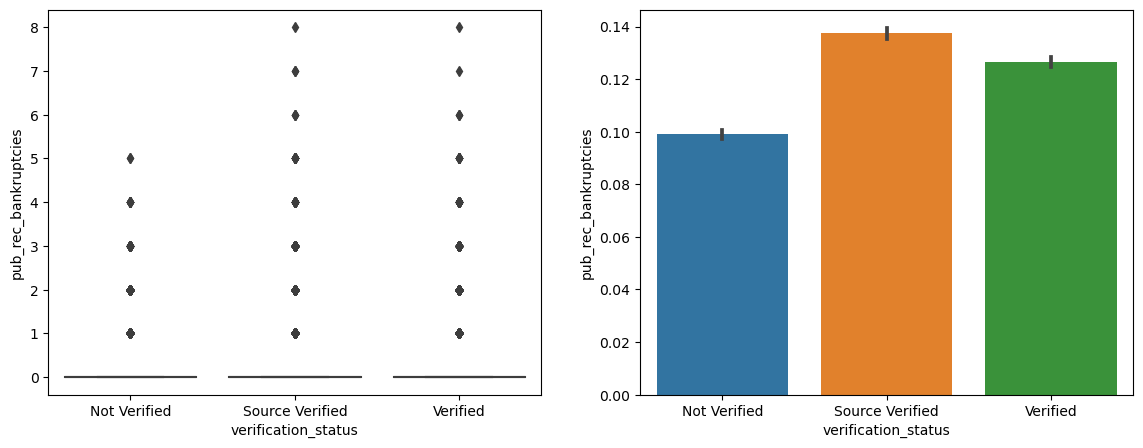

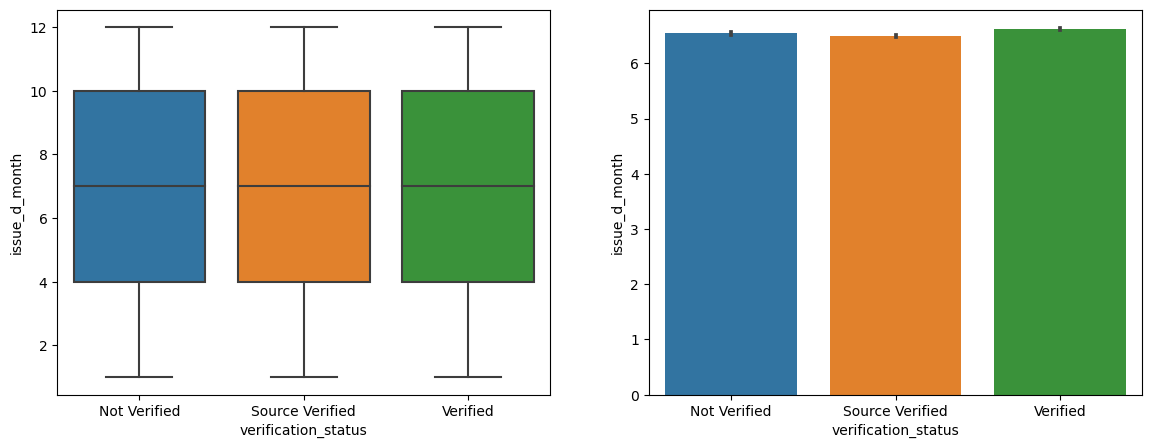

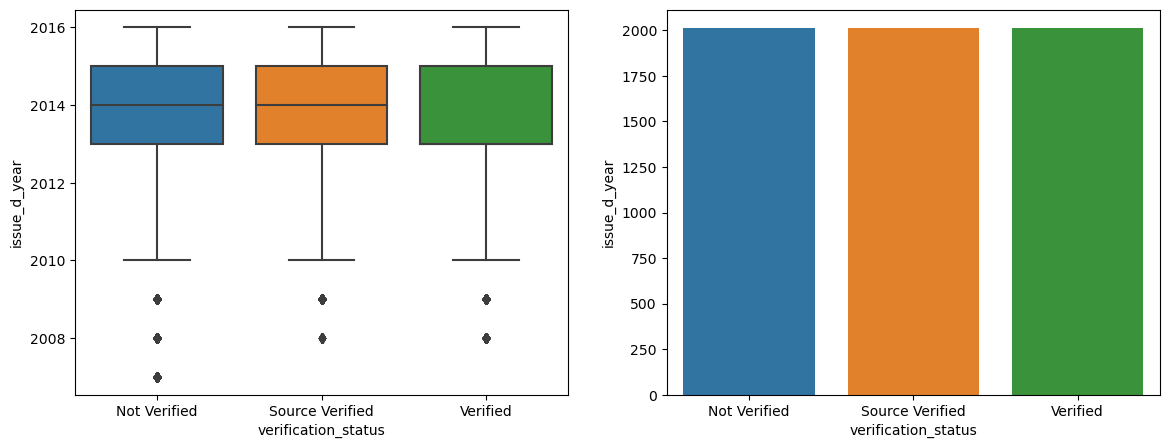

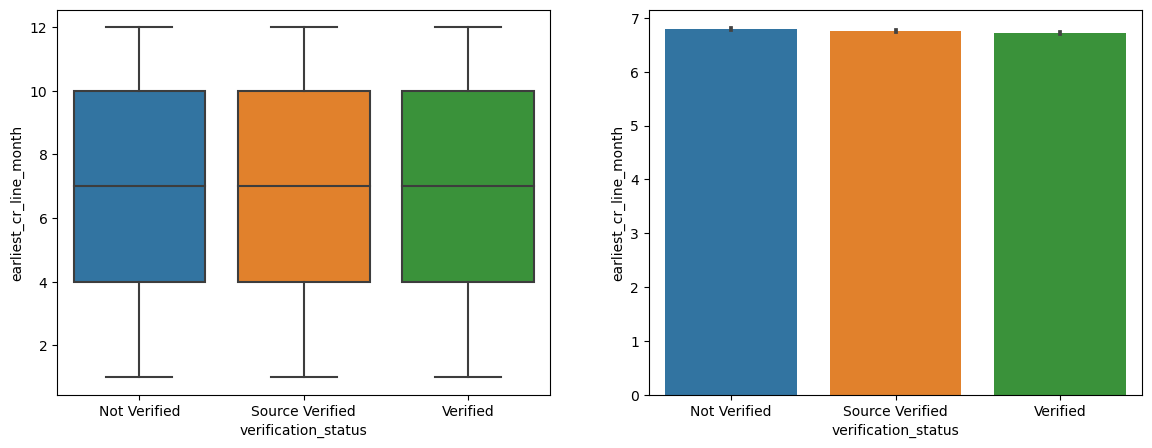

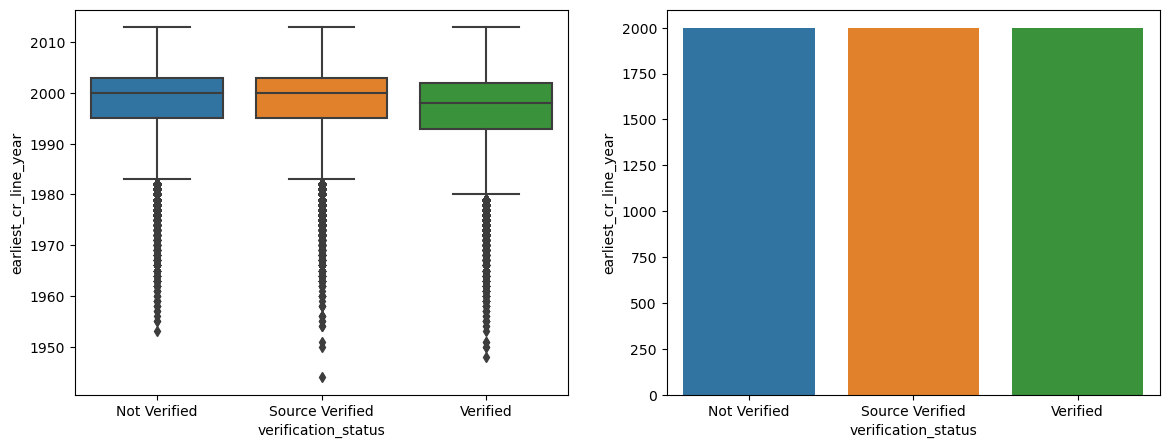

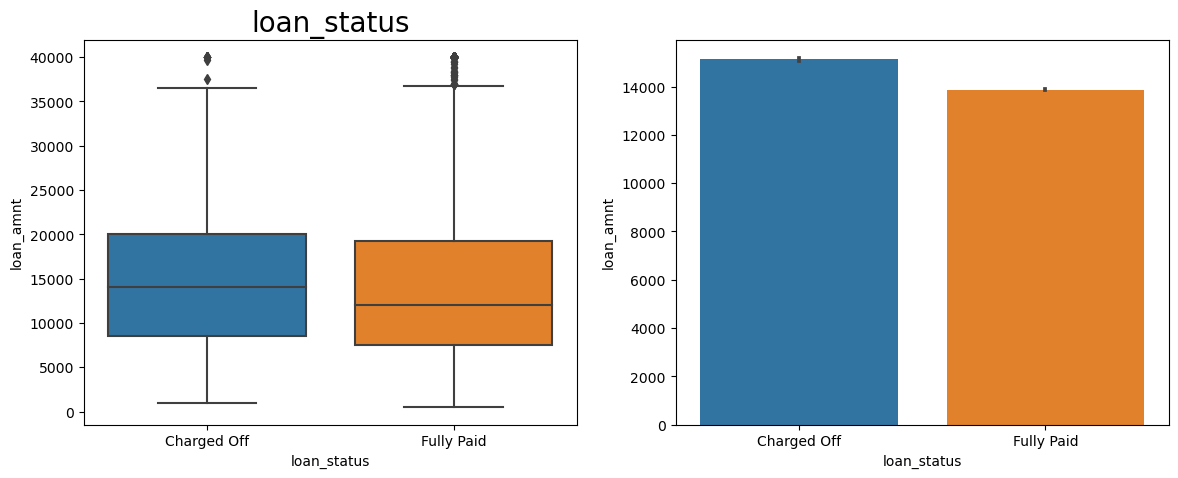

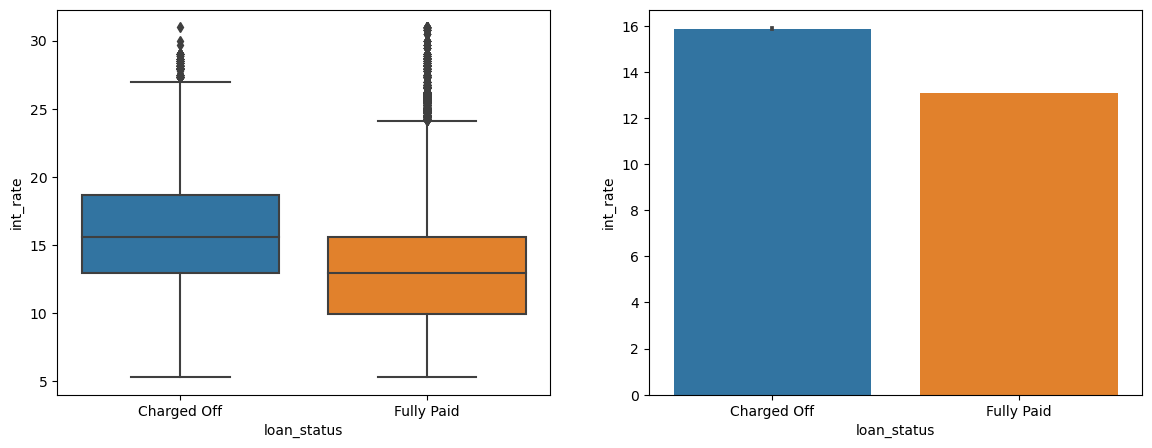

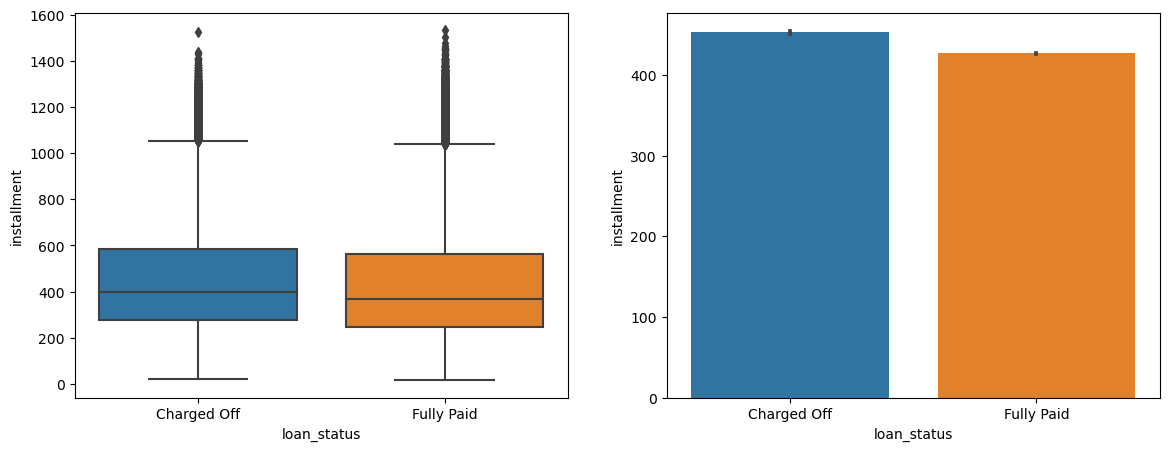

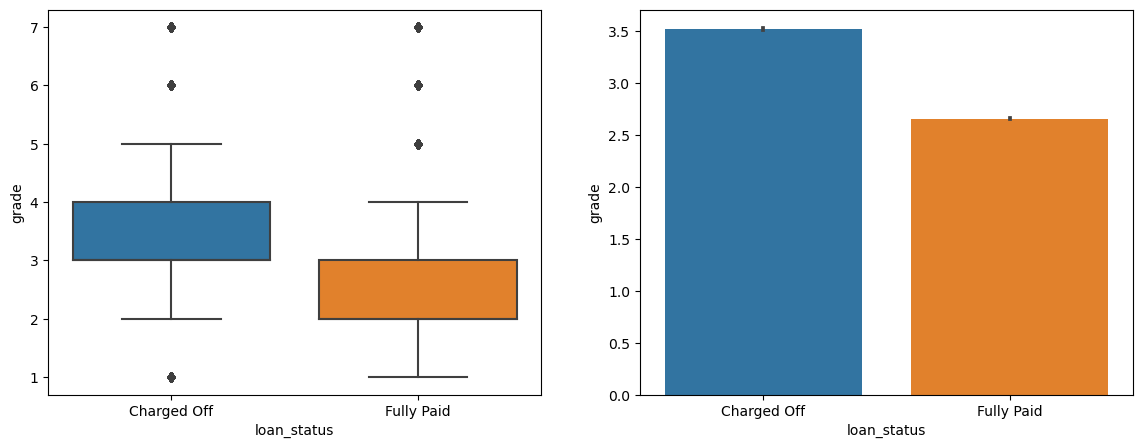

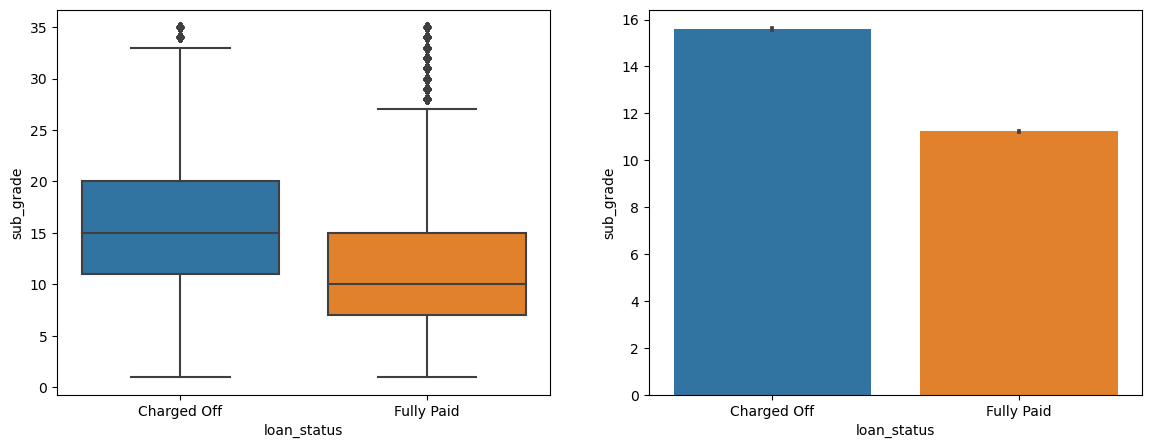

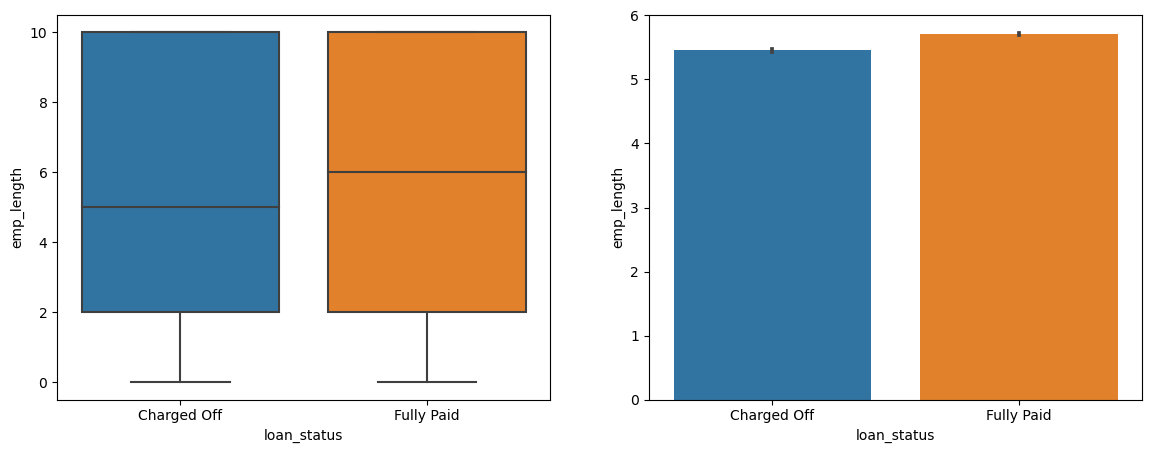

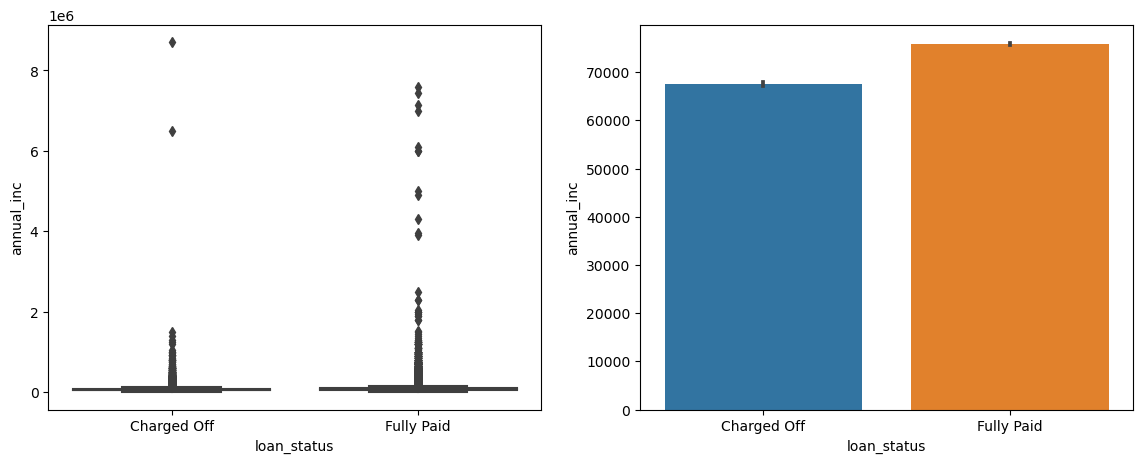

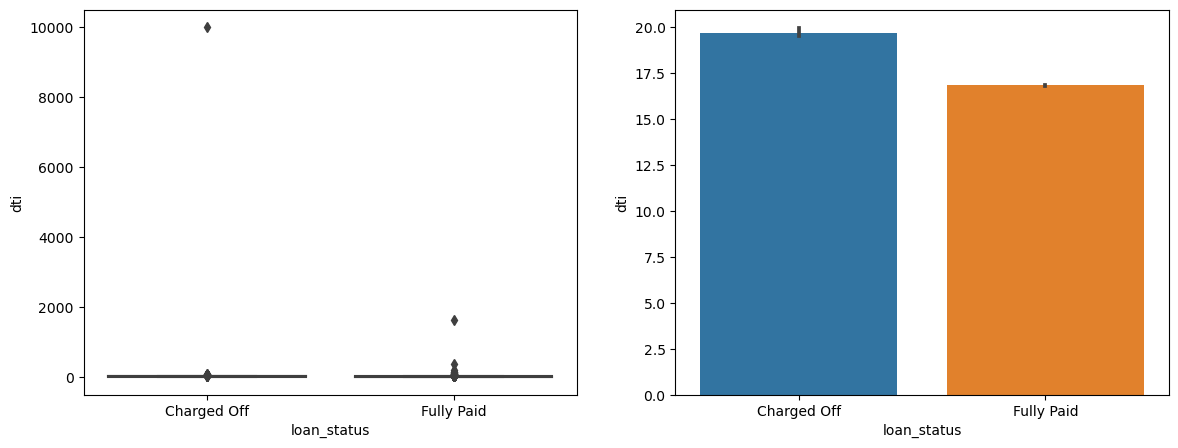

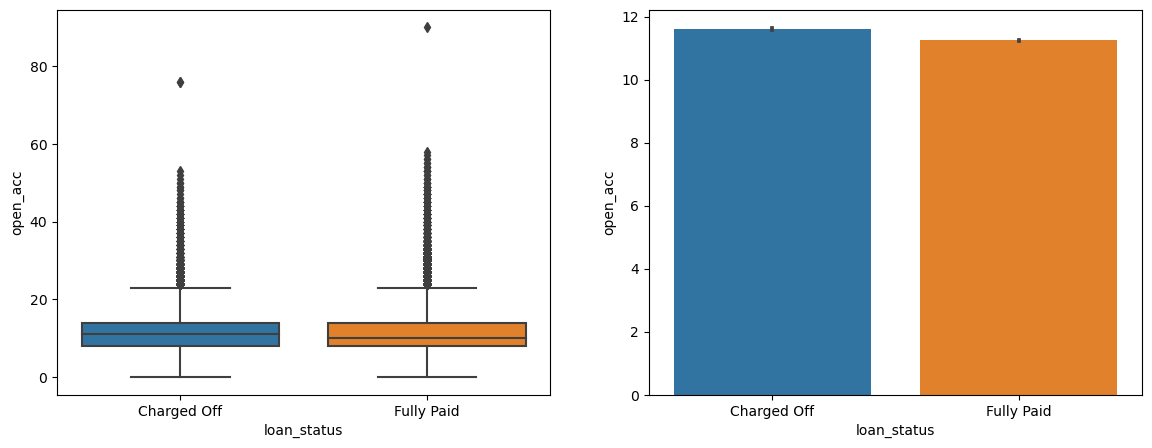

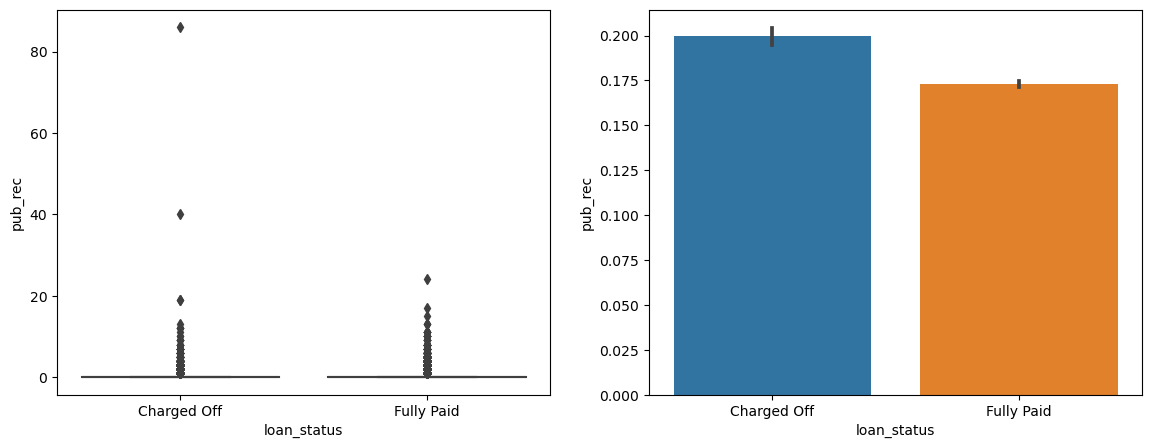

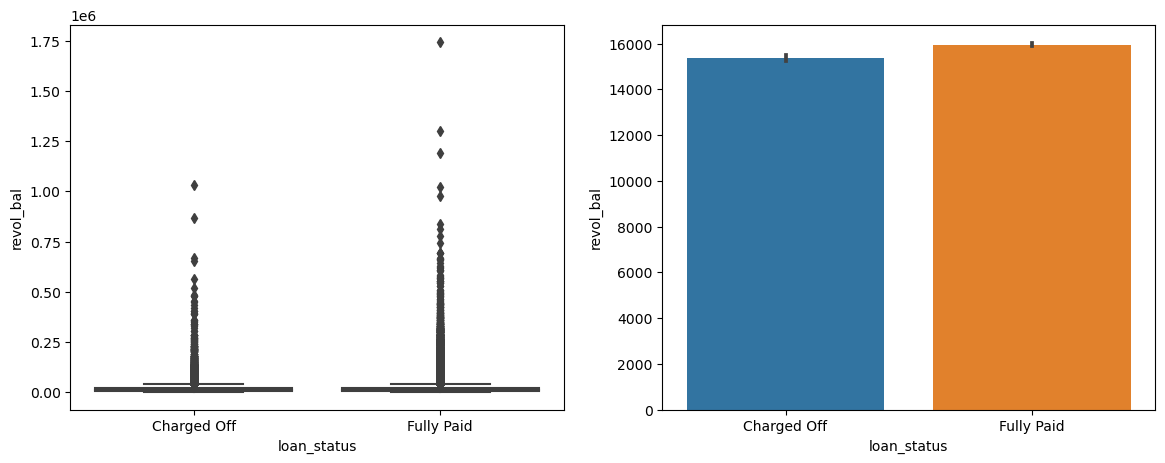

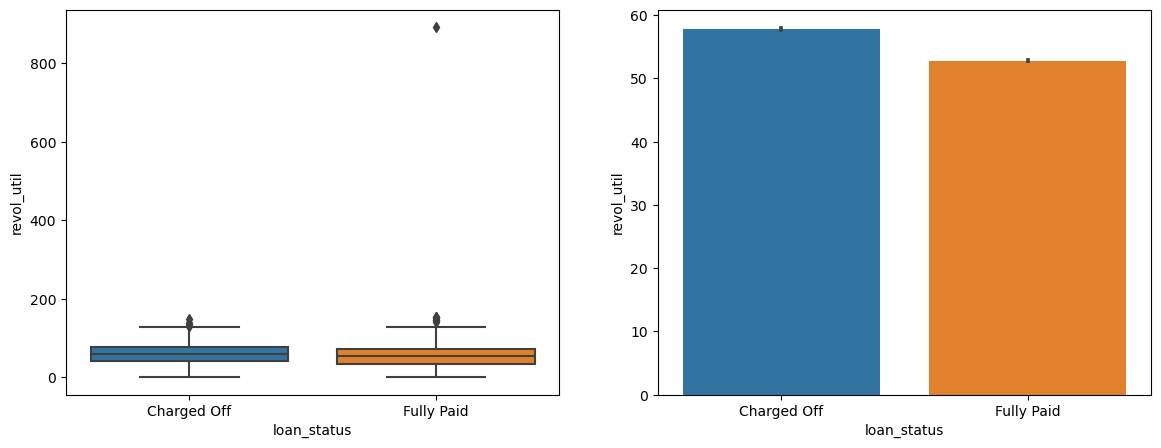

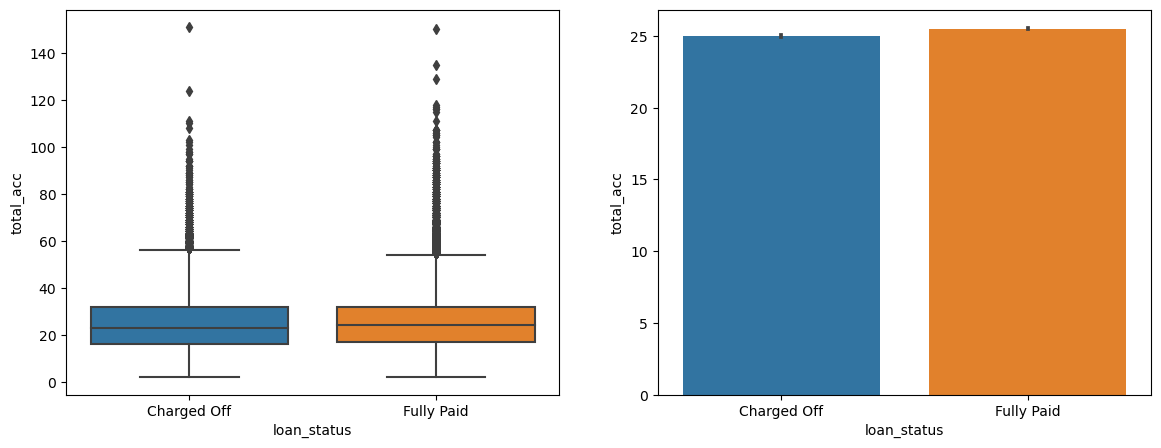

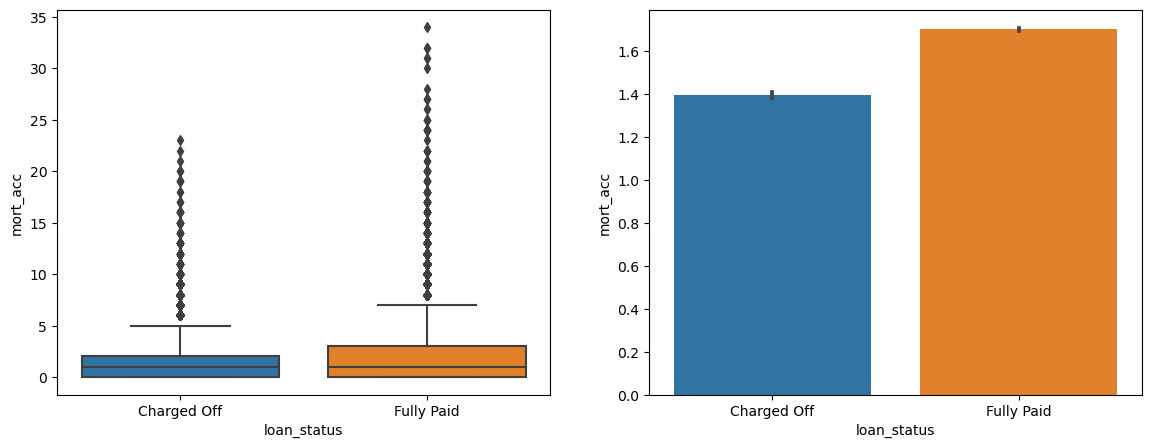

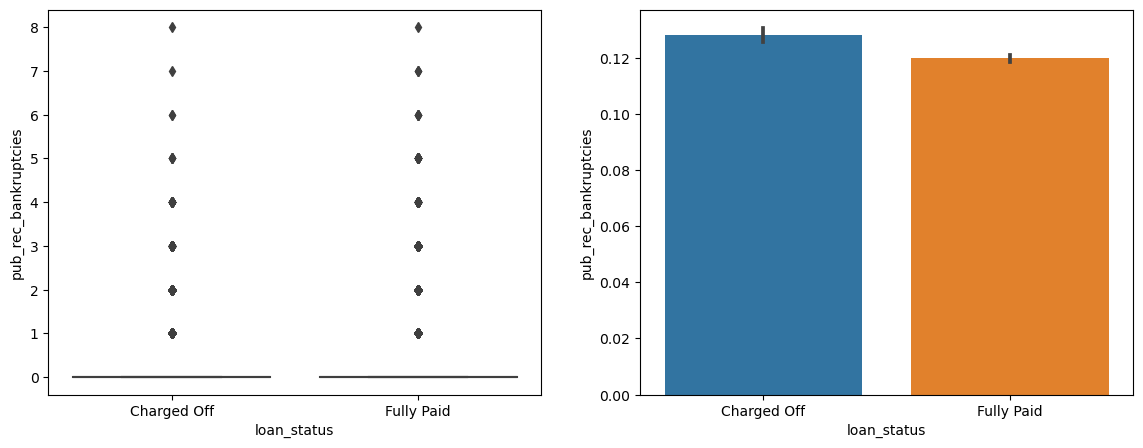

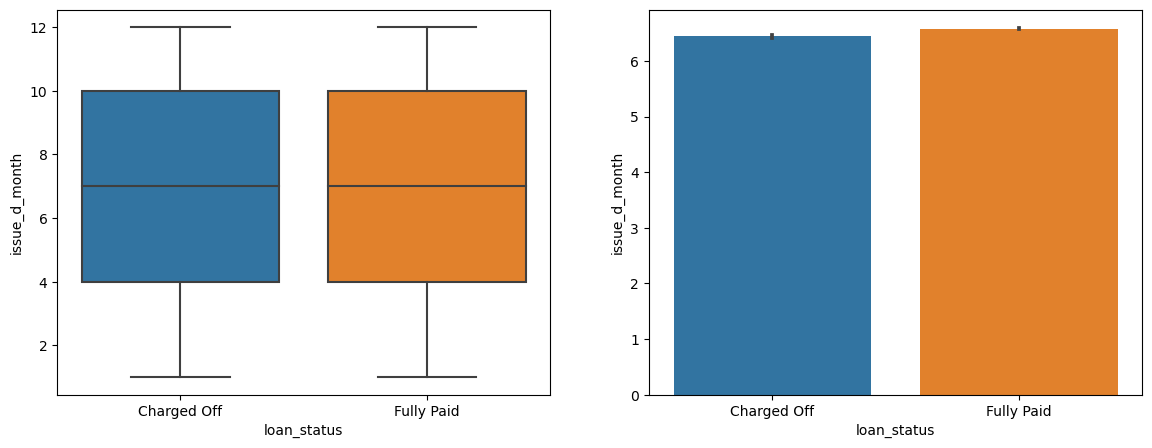

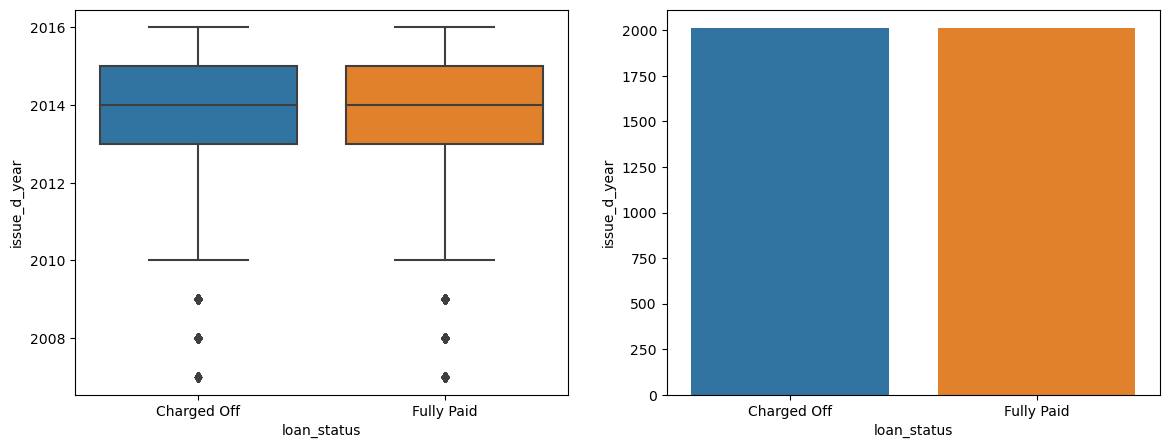

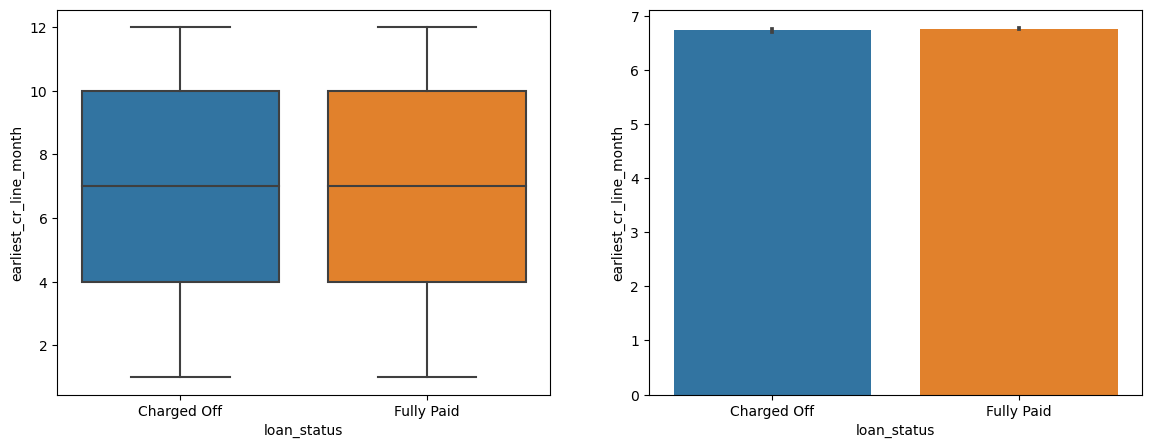

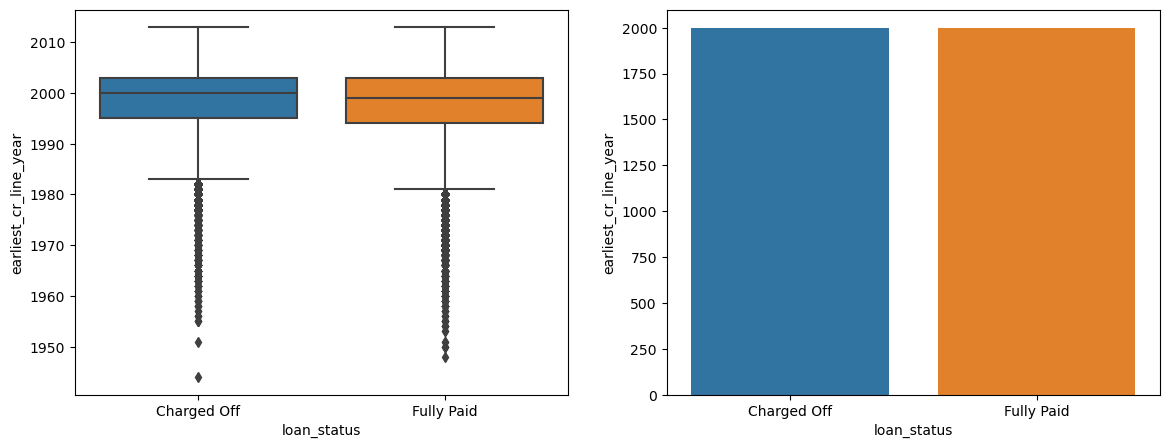

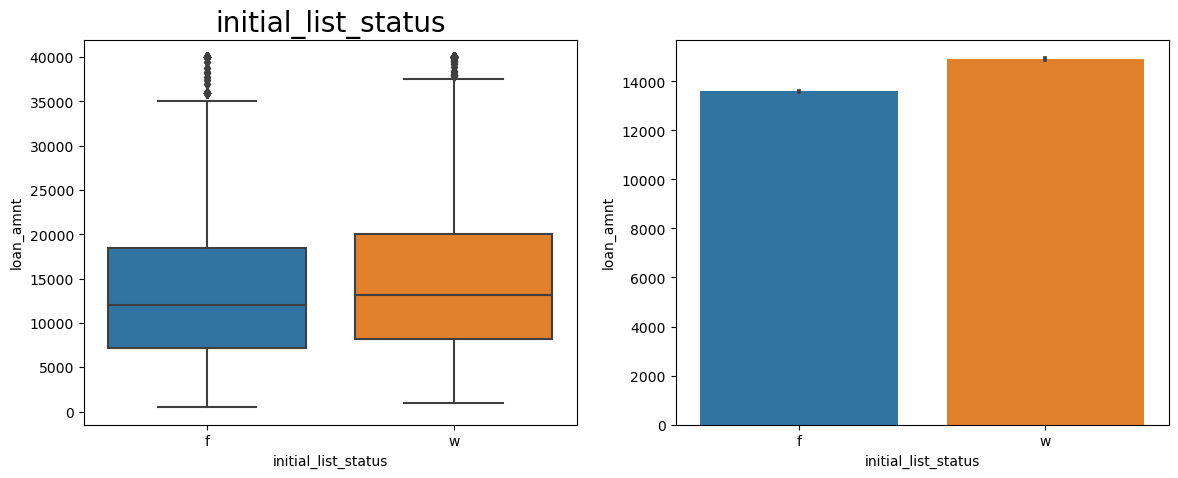

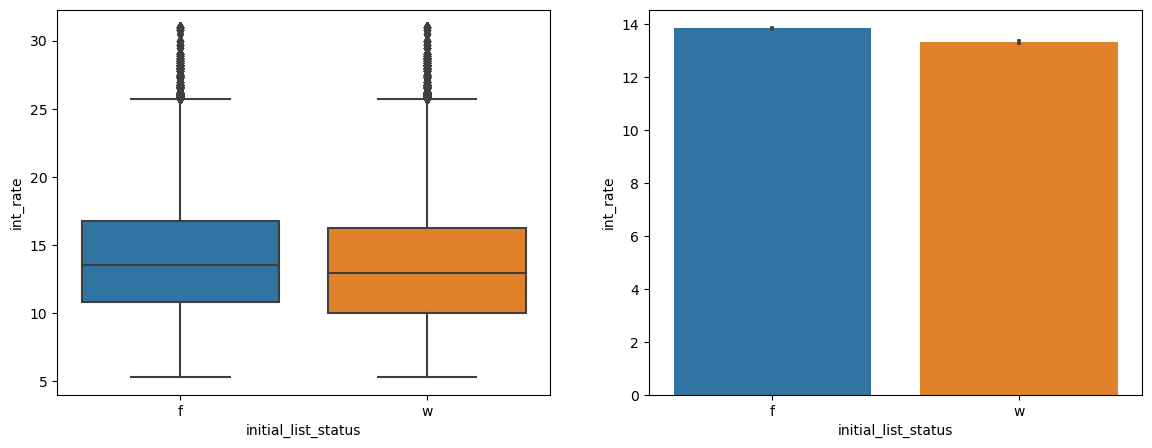

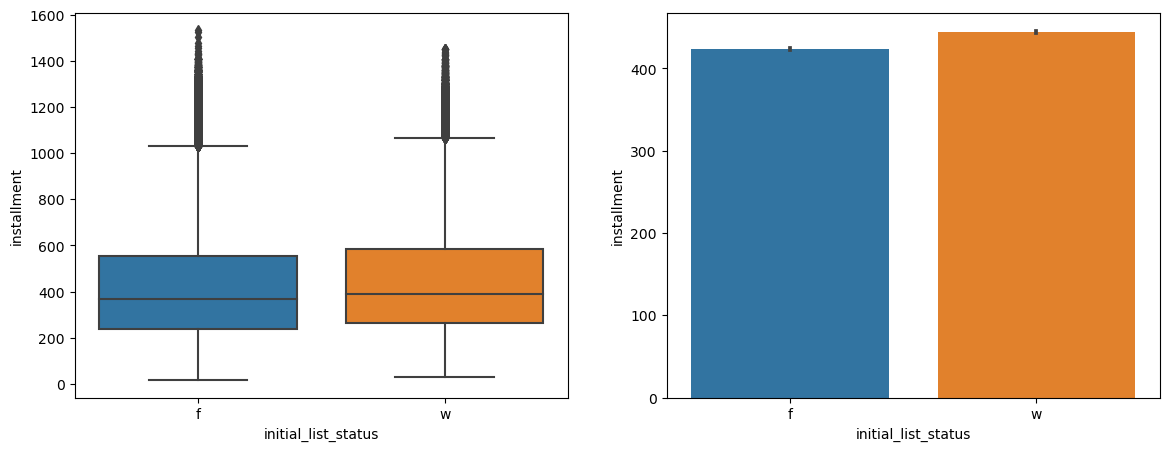

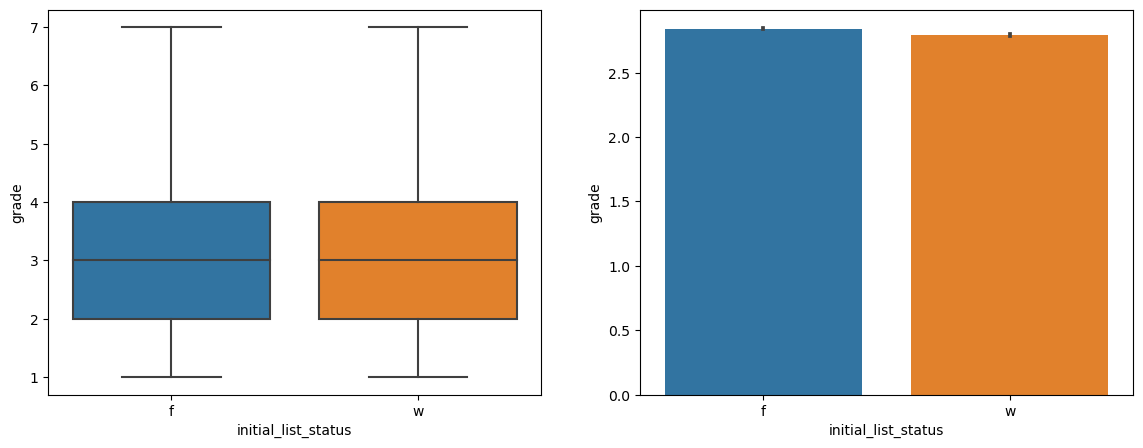

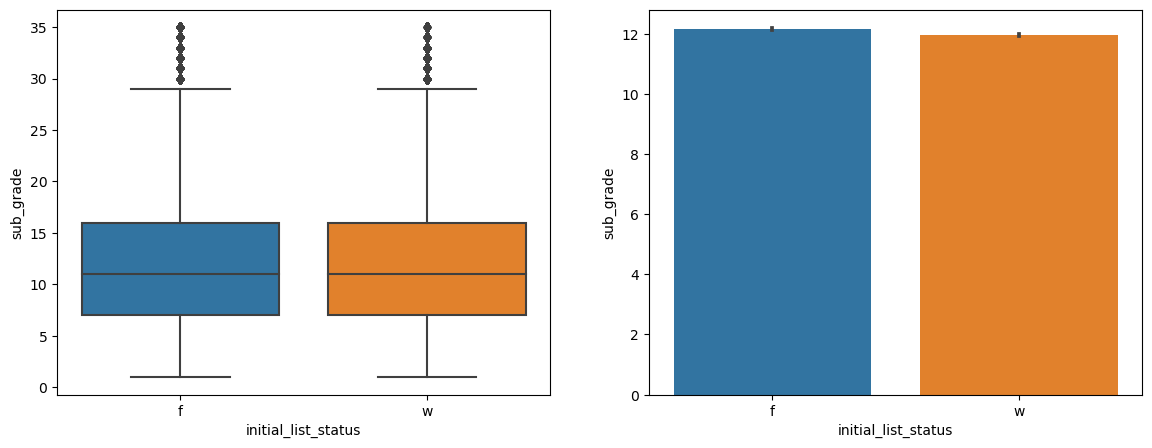

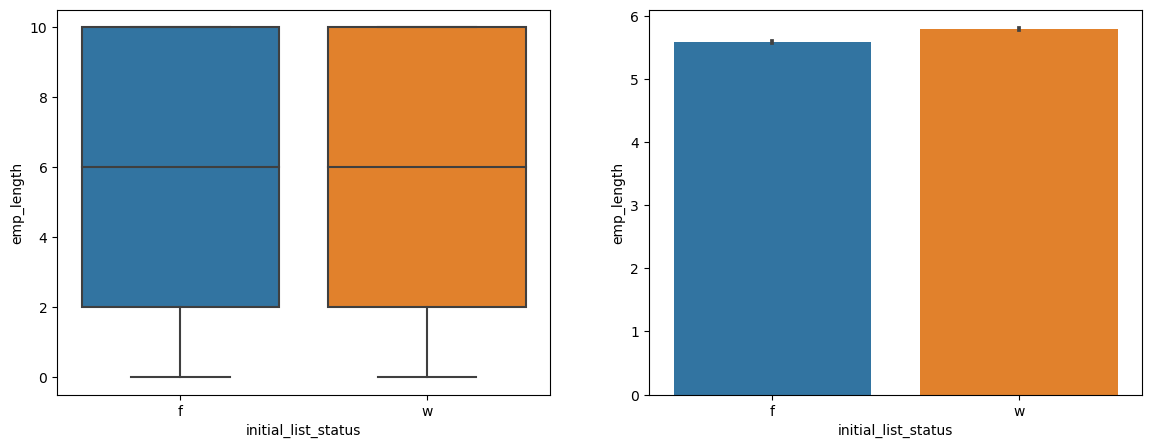

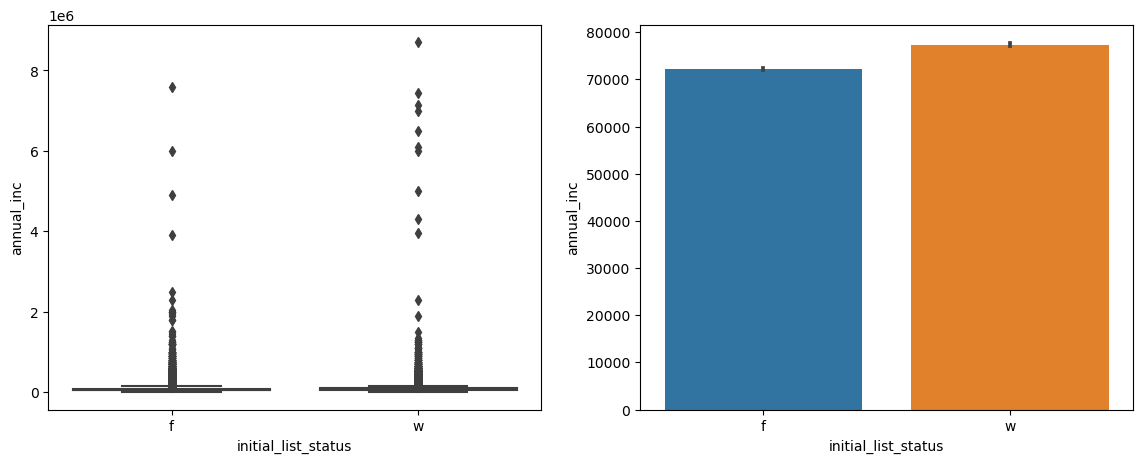

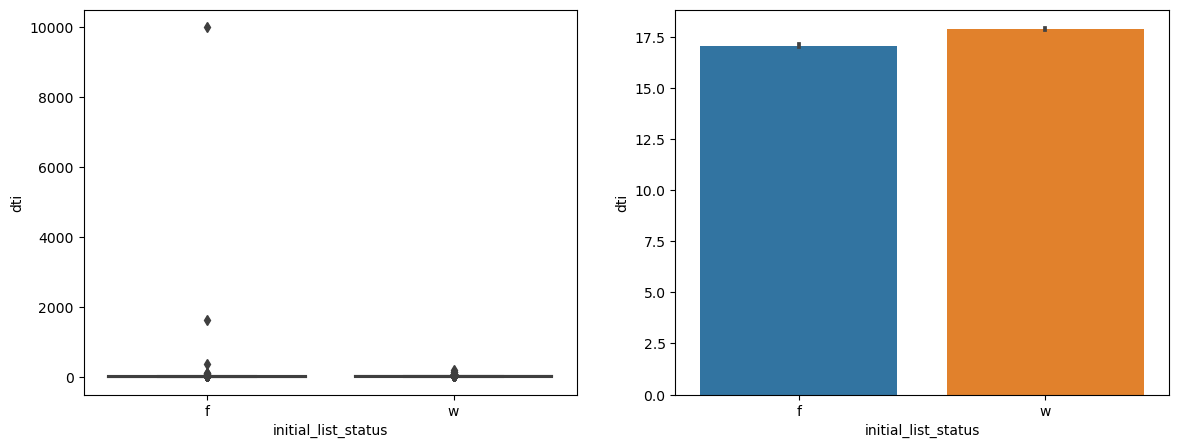

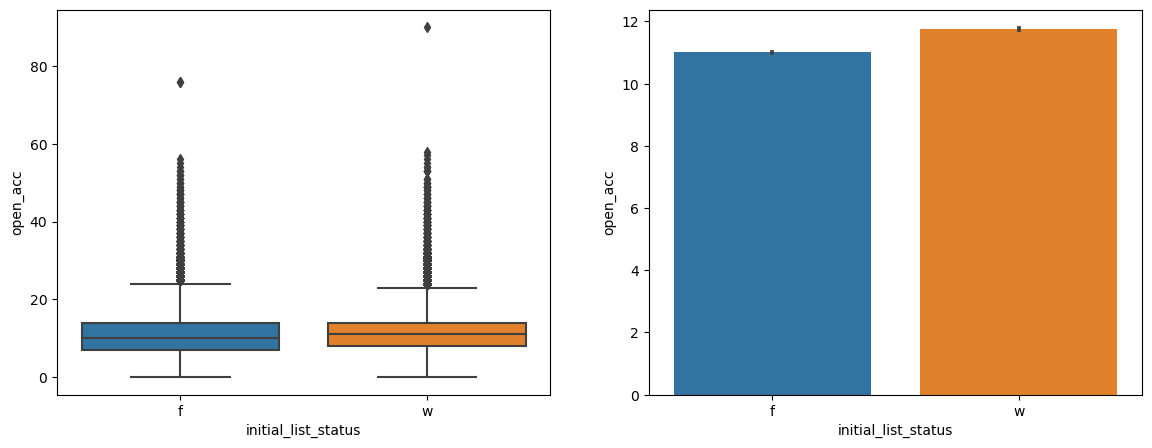

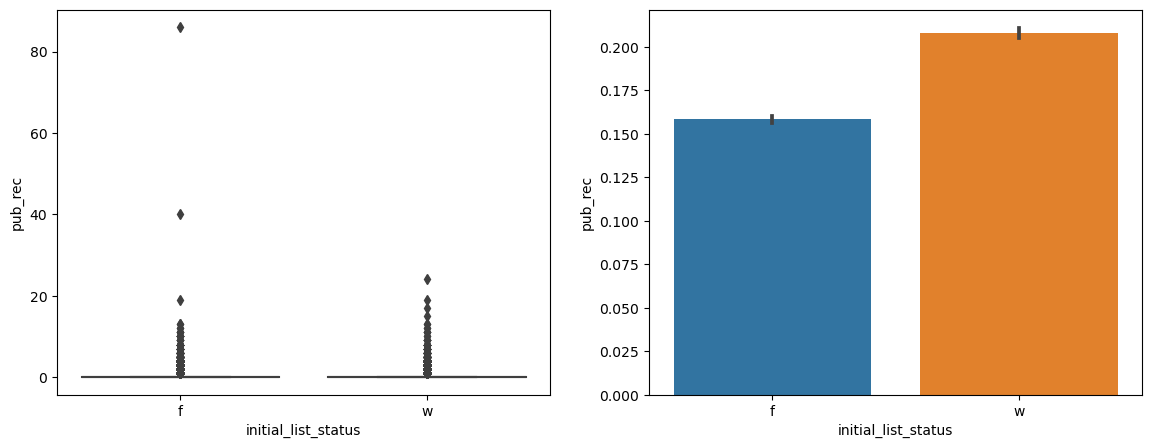

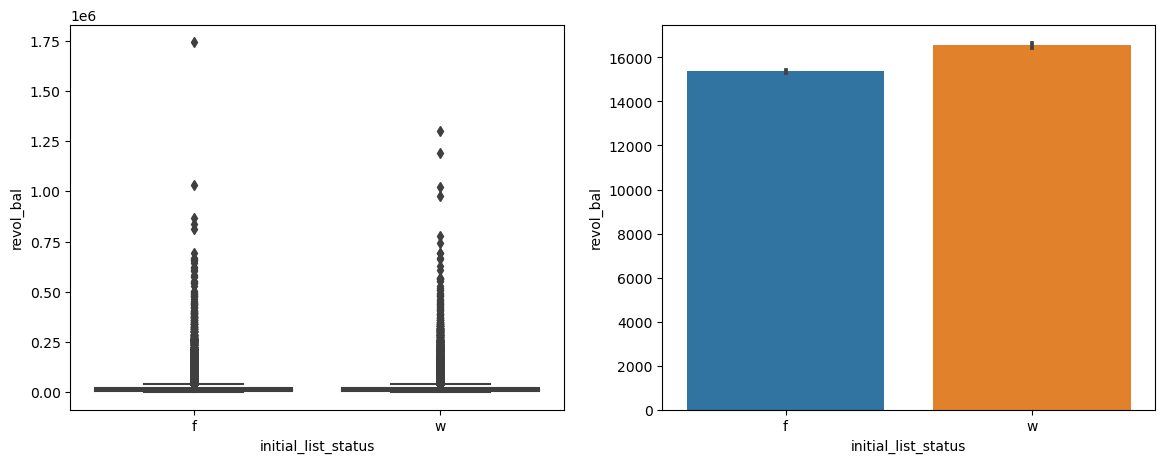

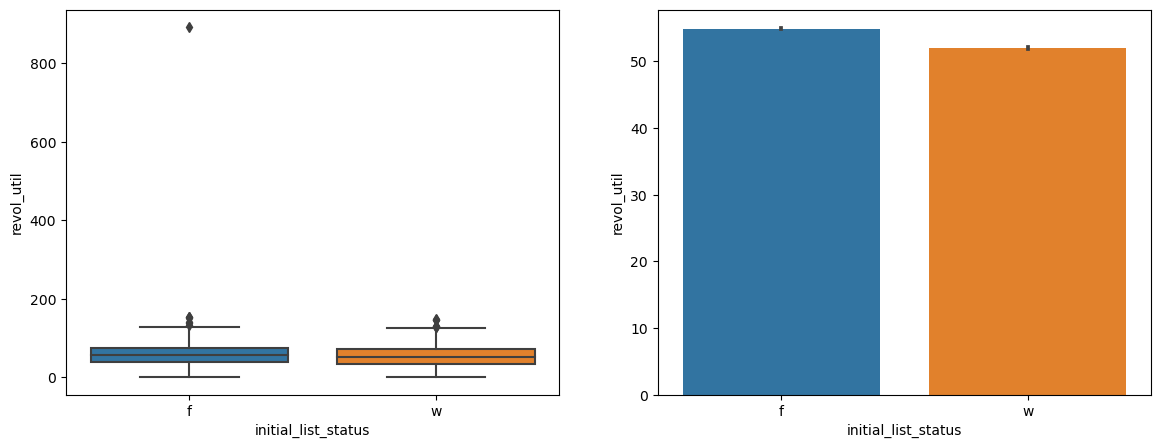

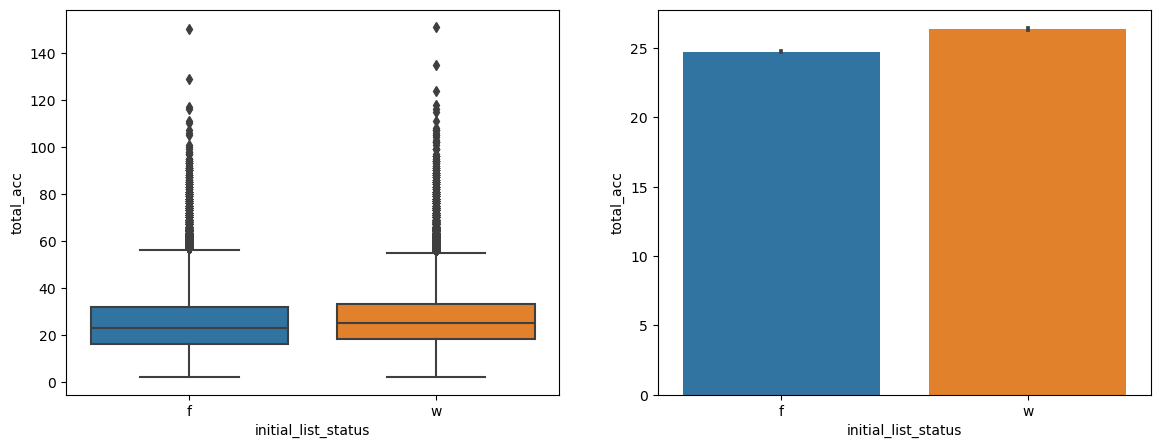

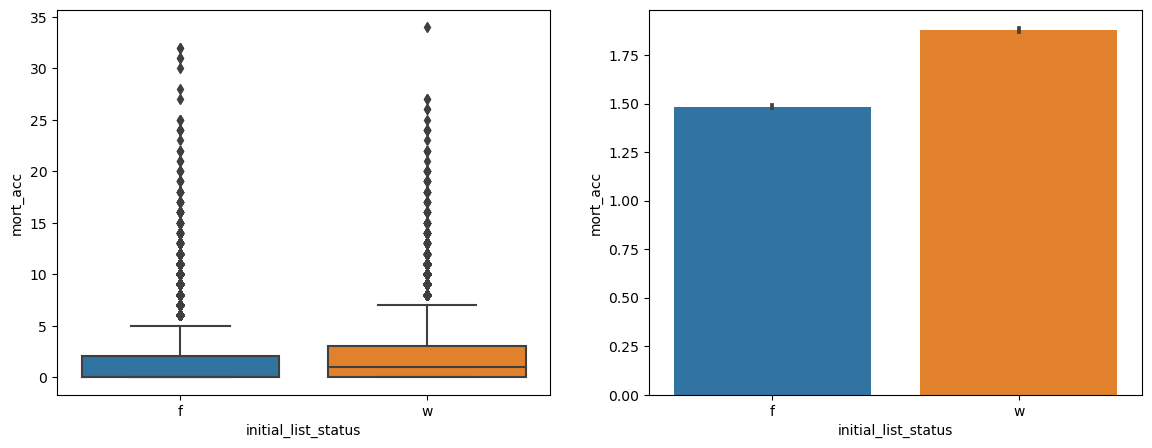

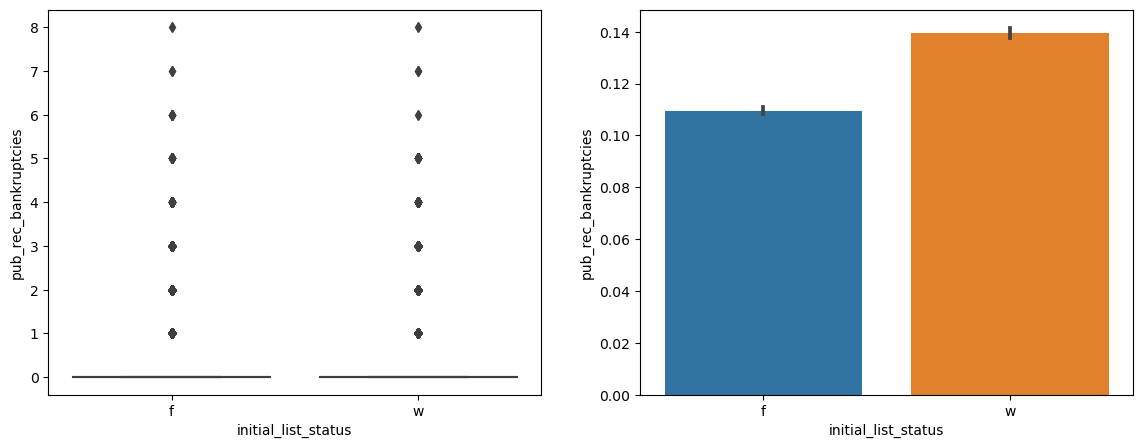

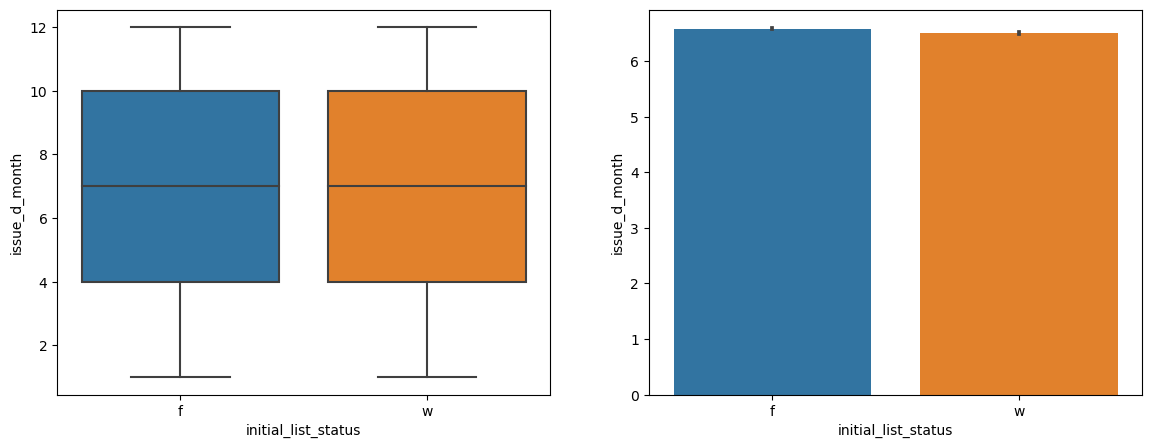

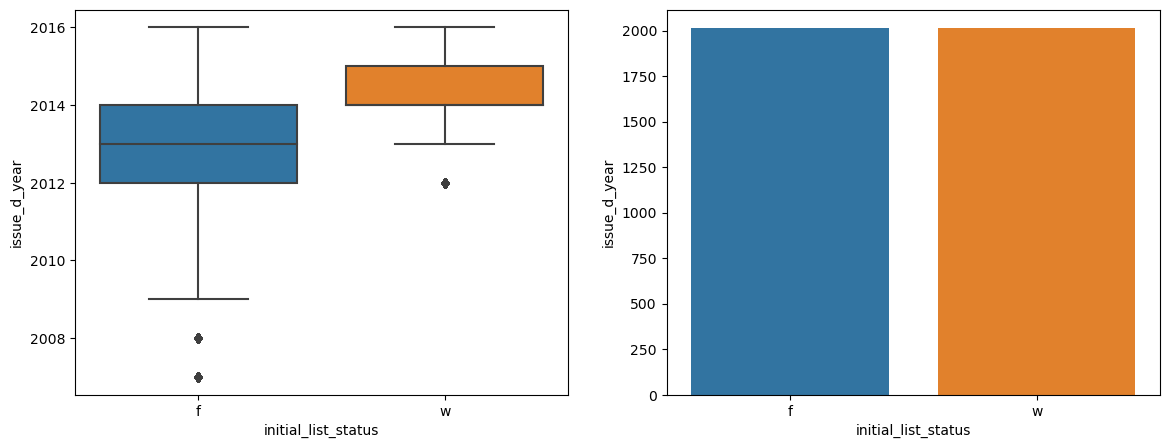

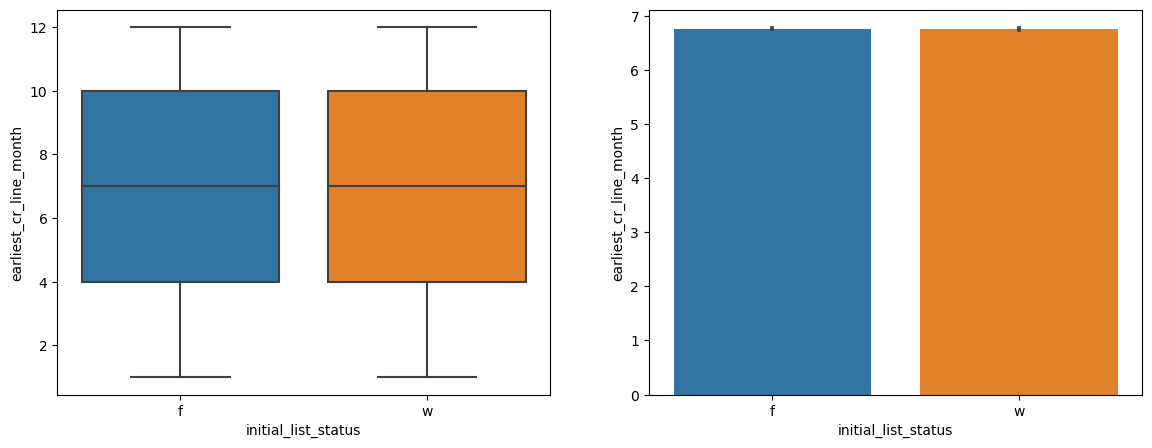

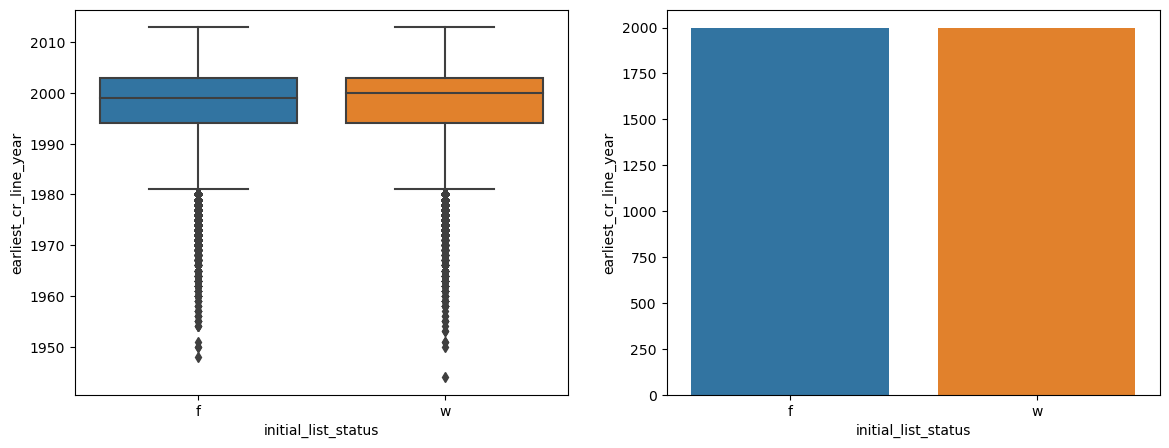

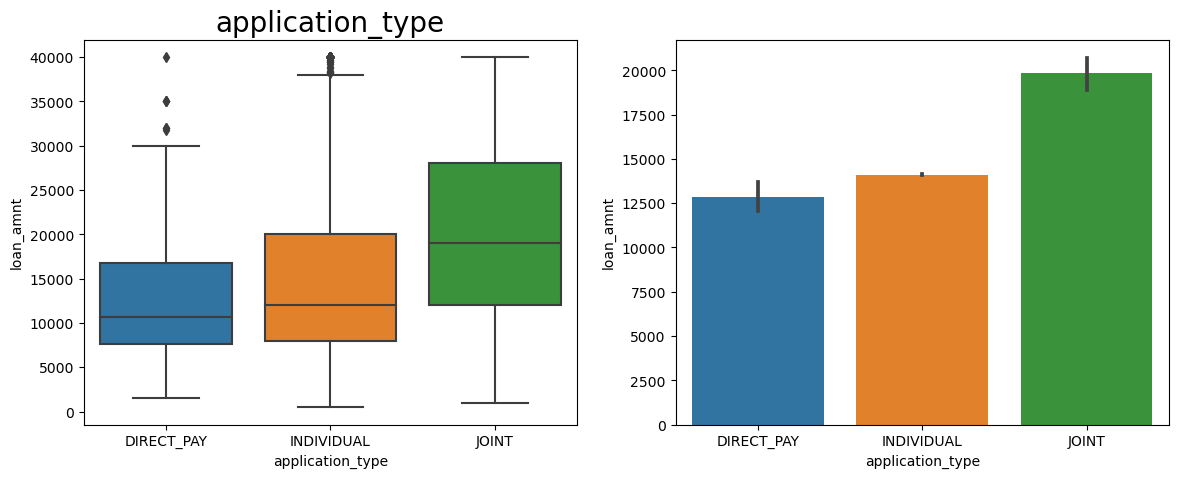

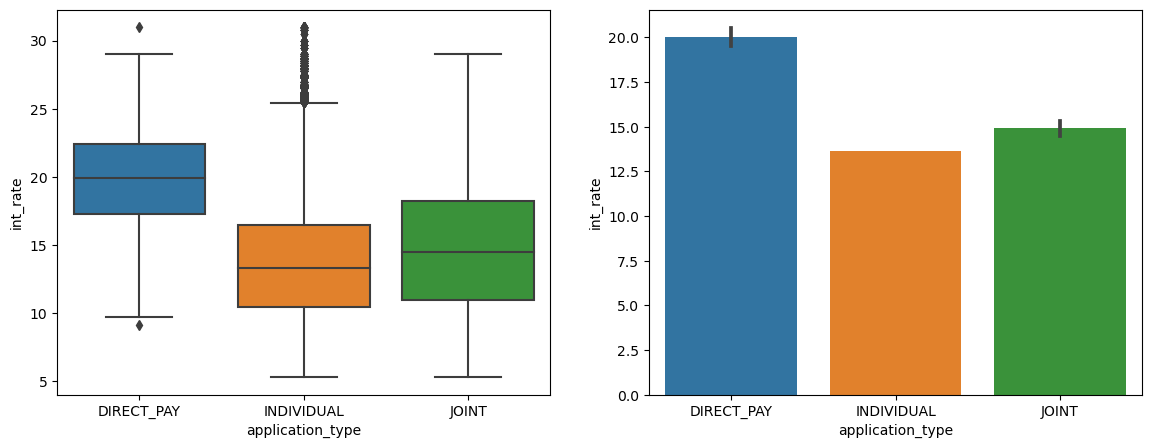

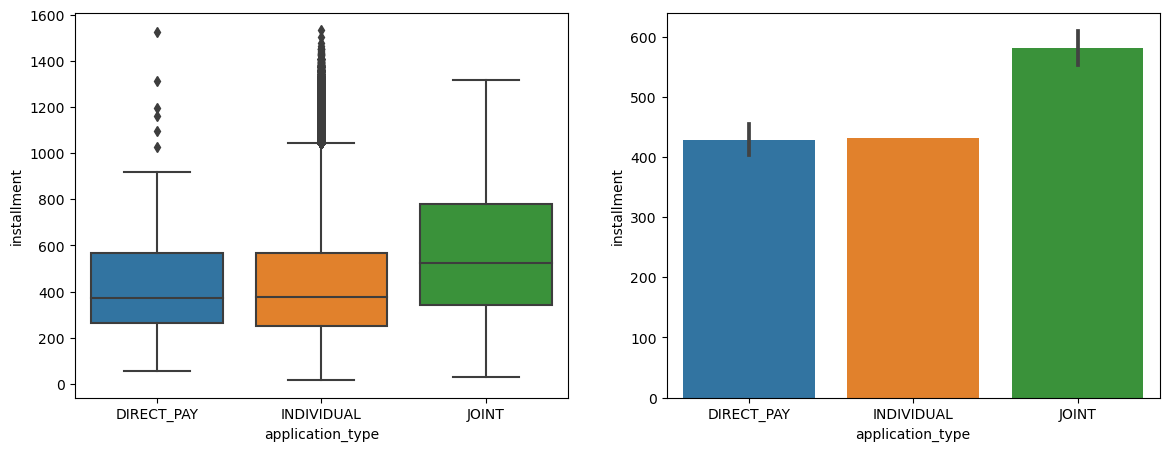

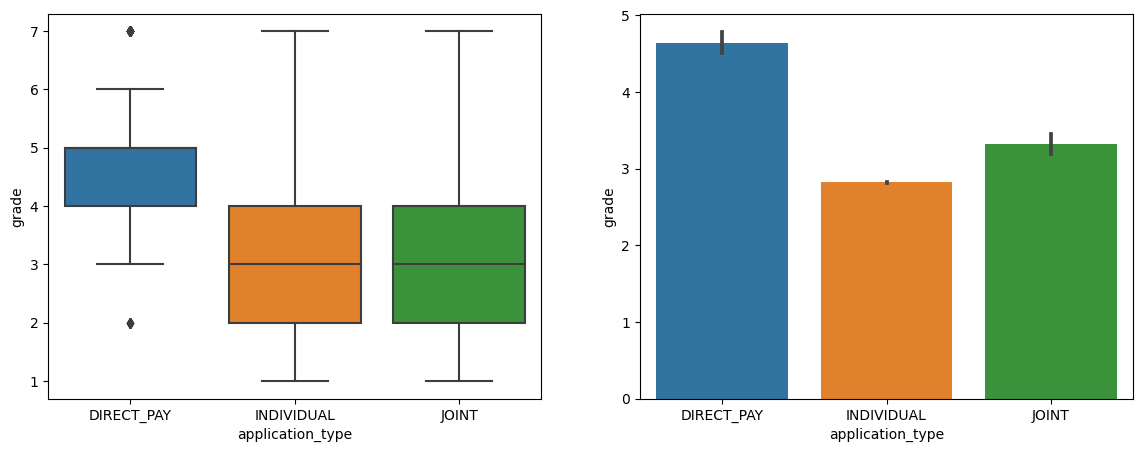

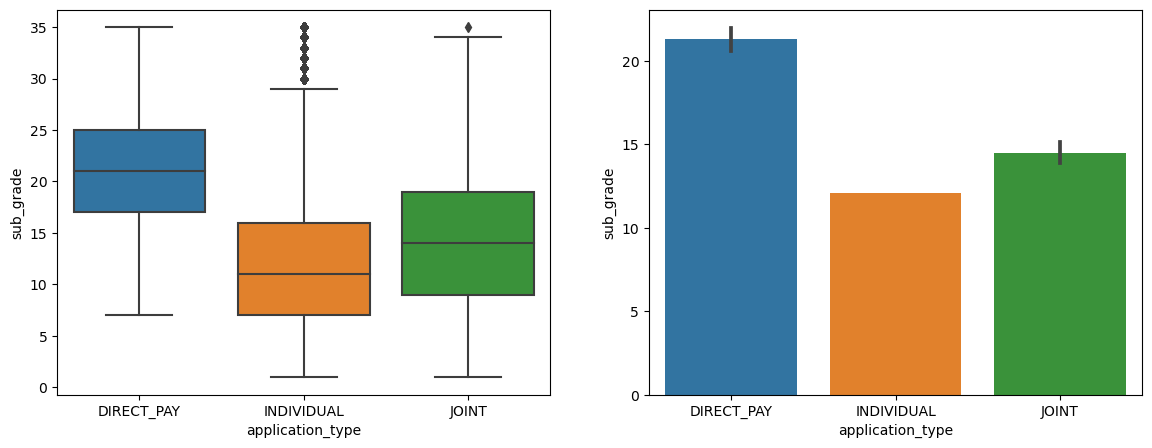

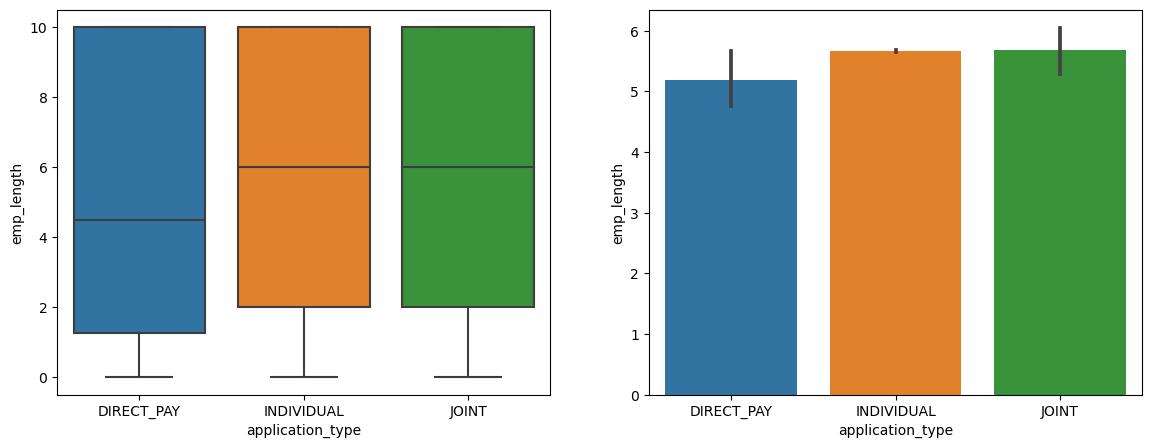

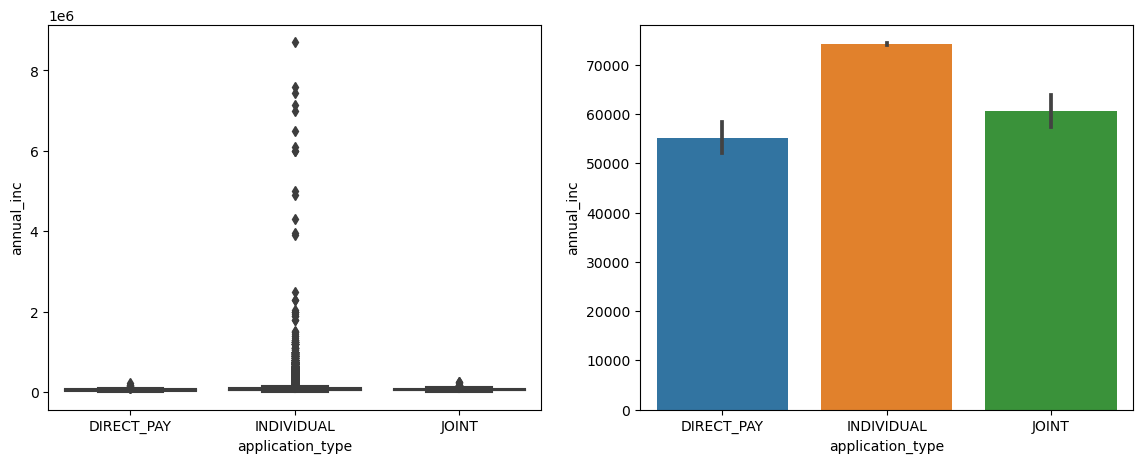

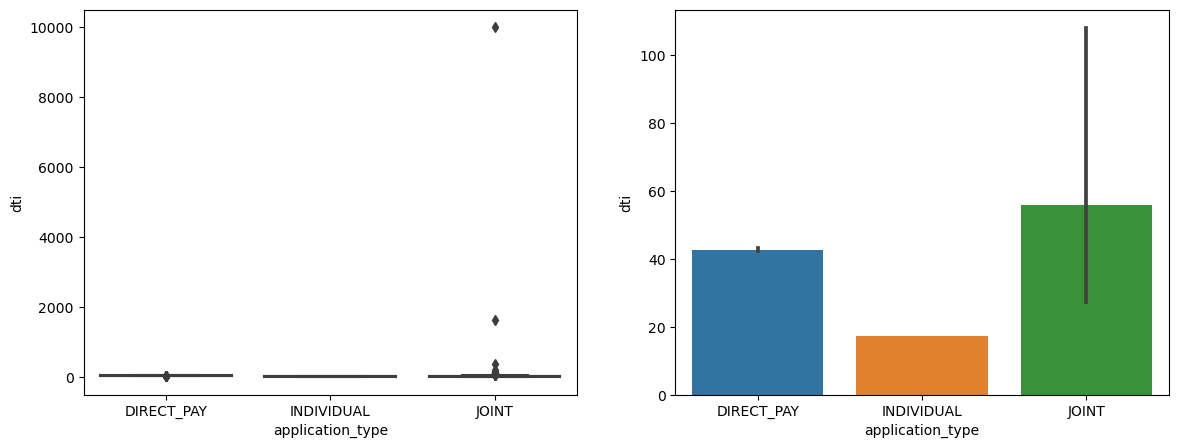

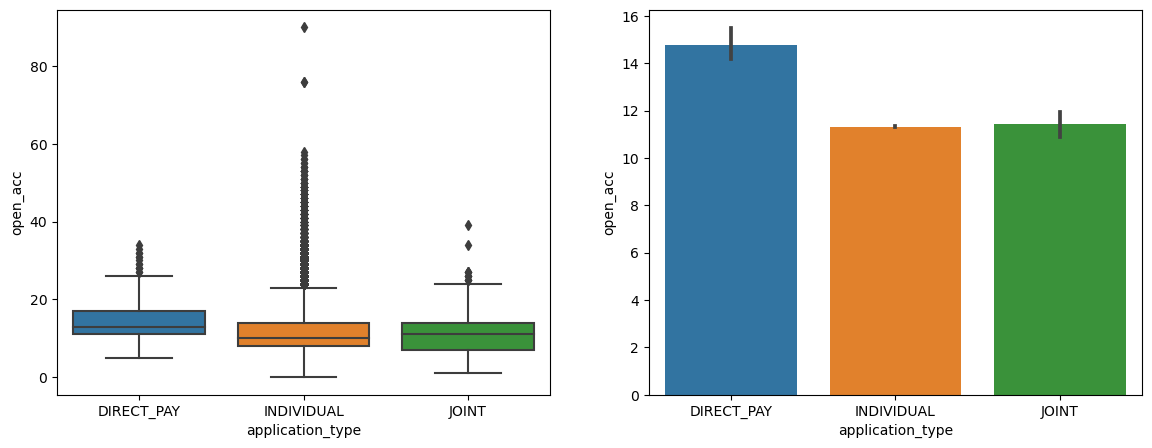

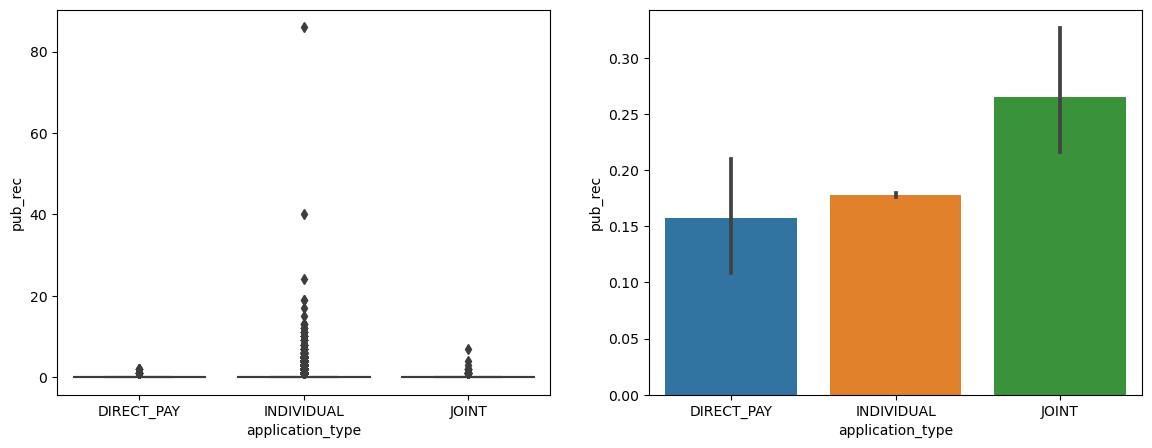

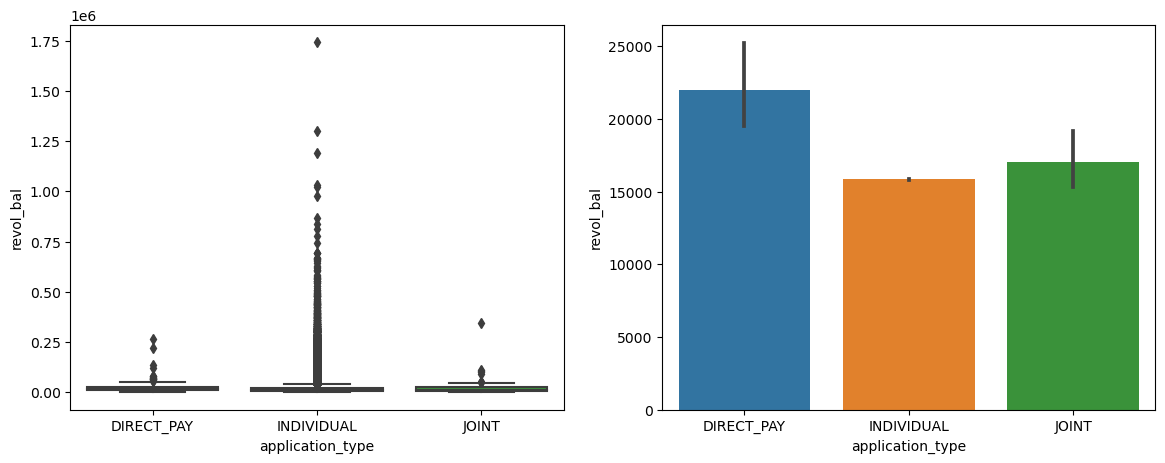

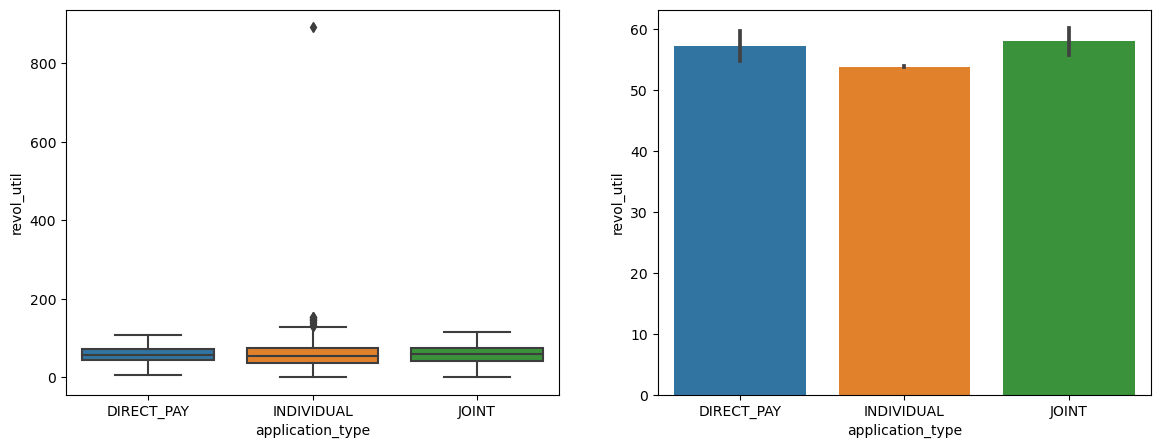

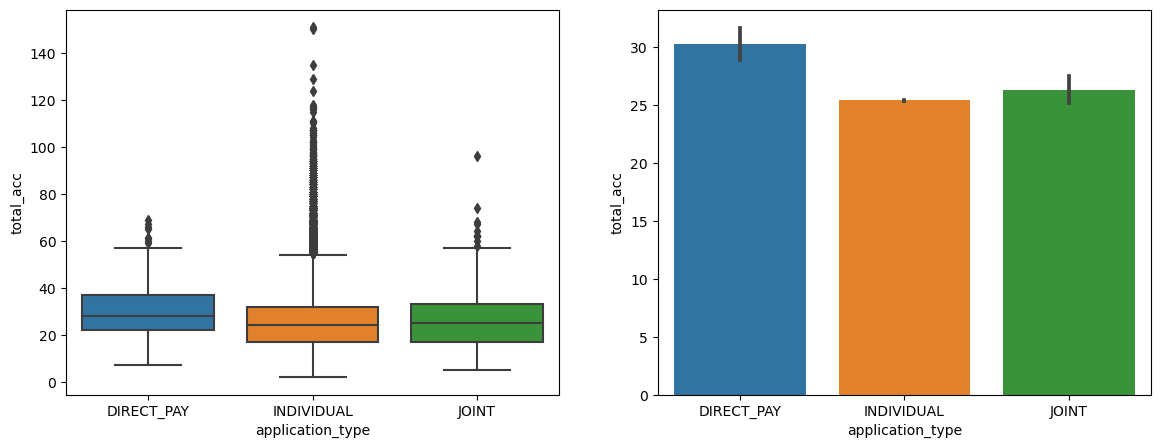

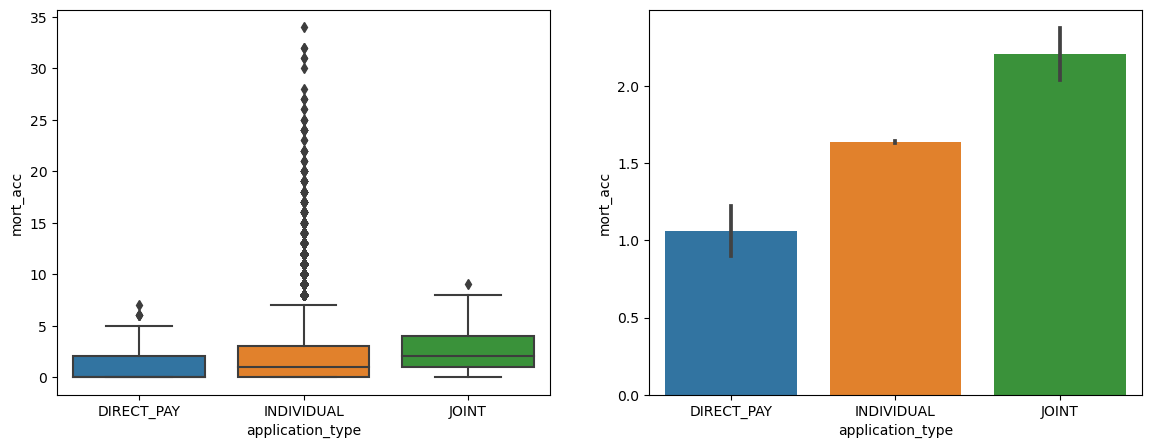

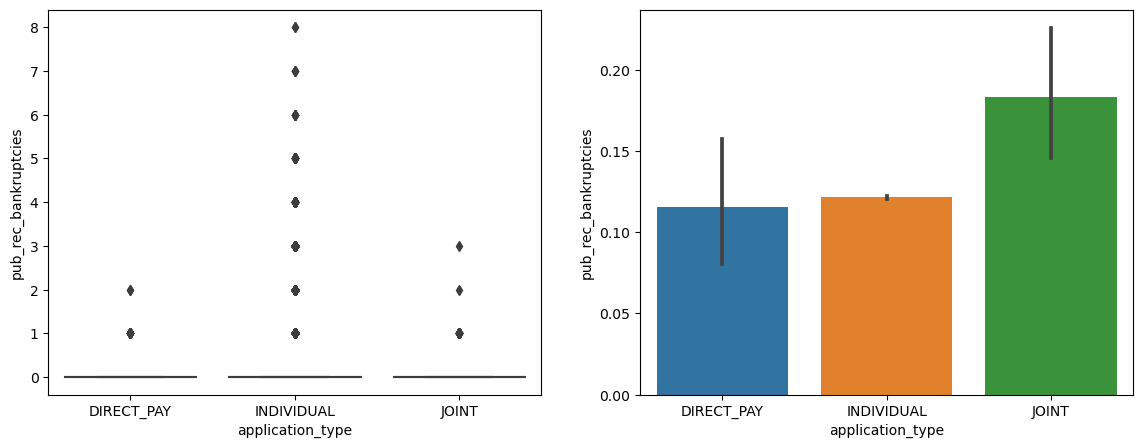

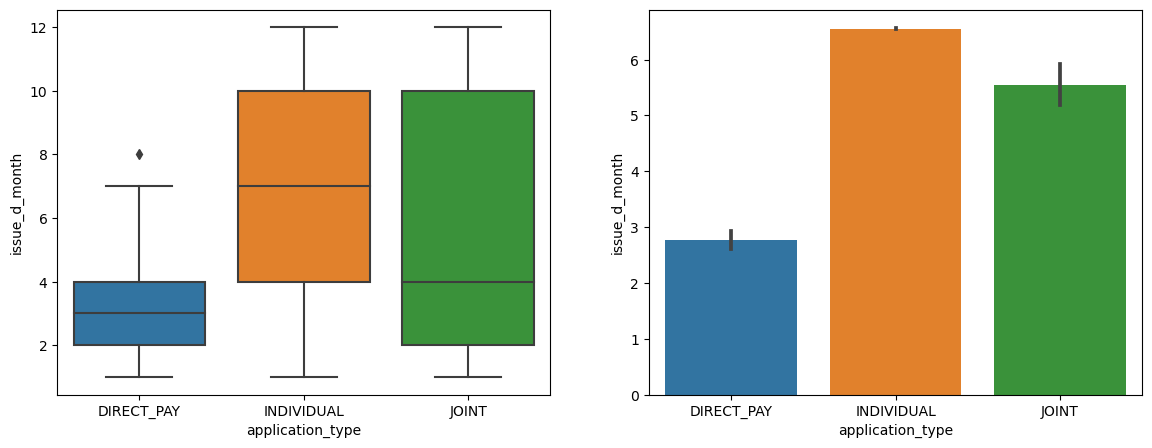

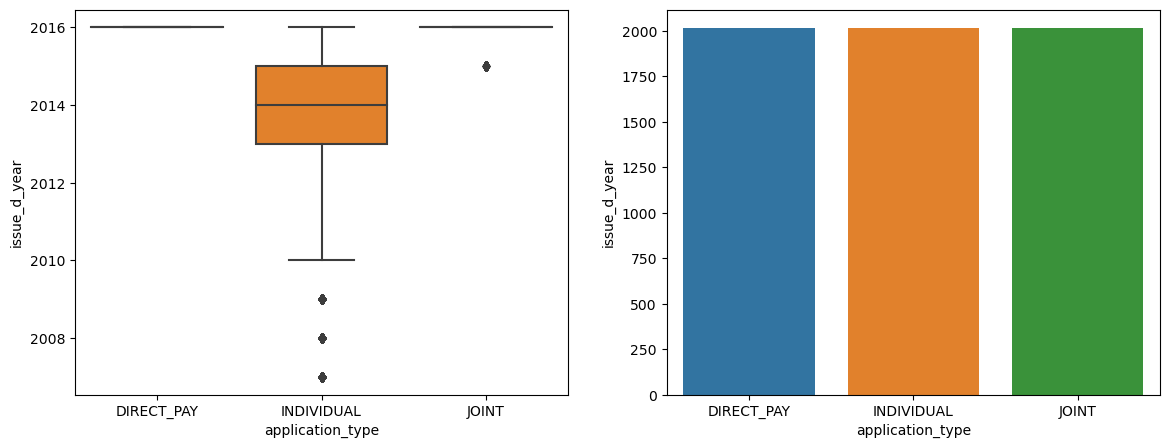

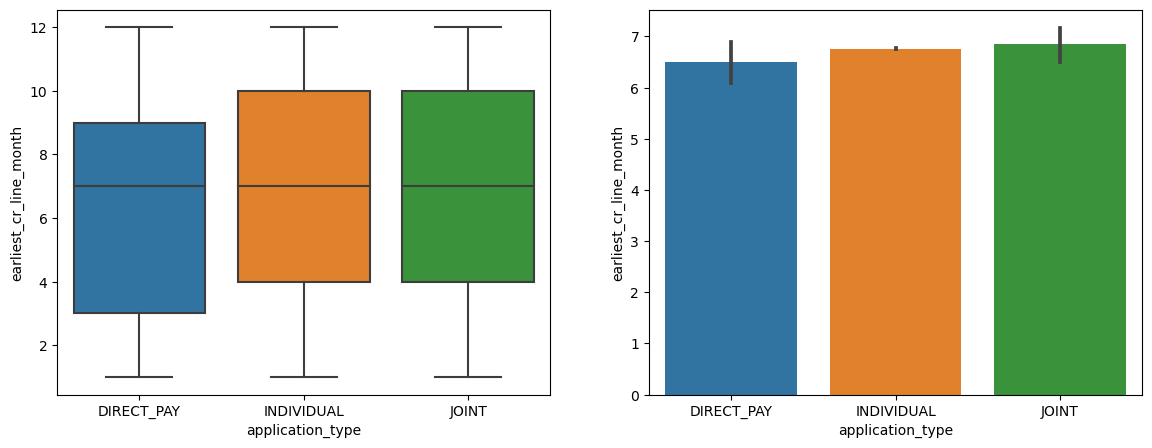

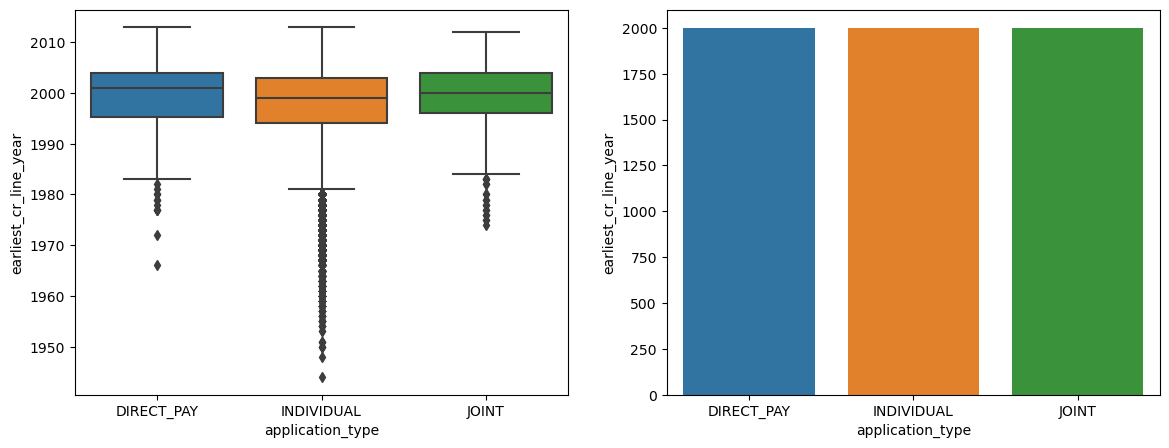

In [ ]:
for i in cat_cols:
    k=0
    for j in num_cols:
        fig,axes=plt.subplots(1,2,sharex=True,figsize=(14,5))
        if k==0:
             axes[0].set_title(i, fontsize=20)
        sns.boxplot(data=df,x=i,y=j,ax=axes[0])
        sns.barplot(data=df,x=i,y=j,ax=axes[1])
        k+=1
        plt.show()



### Outlier Treatment

In [ ]:
#Outlier Removal
def remove_outlier(df, col_name):

    q1=df[col_name].quantile(0.25)

    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_outlier = df.loc[(df[col_name] < low) | (df[col_name] > high)]
    print(f'outlier percentage present in {col_name}:',np.round((len(df_outlier)/len(df)*100),2))
    #Removing outlier when it is less than 5% so that it we wont lose any important feature
    if np.round((len(df_outlier)/len(df)*100),2)<5:
        df_1=df.loc[(df[col_name] > low) & (df[col_name] < high)]
        return df_1
    else:
        return df

In [ ]:
df
#float_df=df.columns[df.dtypes=='int64']
#float_df=float_df.append(df.columns[df.dtypes=='float64'])
df.describe()
for i in num_cols:
  df=remove_outlier(df,i)

outlier percentage present in loan_amnt: 0.05
outlier percentage present in int_rate: 0.95
outlier percentage present in installment: 2.78
outlier percentage present in grade: 0.0
outlier percentage present in sub_grade: 0.11
outlier percentage present in emp_length: 0.0
outlier percentage present in annual_inc: 4.79
outlier percentage present in dti: 0.06
outlier percentage present in open_acc: 2.36
outlier percentage present in pub_rec: 14.99
outlier percentage present in revol_bal: 4.87
outlier percentage present in revol_util: 0.0
outlier percentage present in total_acc: 1.78
outlier percentage present in mort_acc: 4.64
outlier percentage present in pub_rec_bankruptcies: 12.1
outlier percentage present in issue_d_month: 0.0
outlier percentage present in issue_d_year: 1.53
outlier percentage present in earliest_cr_line_month: 0.0
outlier percentage present in earliest_cr_line_year: 2.48


Highest 14% outlier is present in pub_rec column followed by revol_balcne which contains 5% outlier

### Feature Engineering

In [ ]:
#Feature Engineering
for i in ('pub_rec','mort_acc','pub_rec_bankruptcies'):
  j=i+'_flag'
  df[j]=df[i].apply(lambda x:1 if x>1 else 0)

df.drop(['pub_rec','mort_acc','pub_rec_bankruptcies'],axis=1,inplace=True)


In [ ]:
num_cols=[i for i in num_cols if i not in ['pub_rec','mort_acc','pub_rec_bankruptcies','term']]



In [ ]:
num_cols

['loan_amnt',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

In [ ]:
corr_df=df[num_cols].corr().round(2)

In [ ]:
corr_df

<Figure size 2000x900 with 0 Axes>

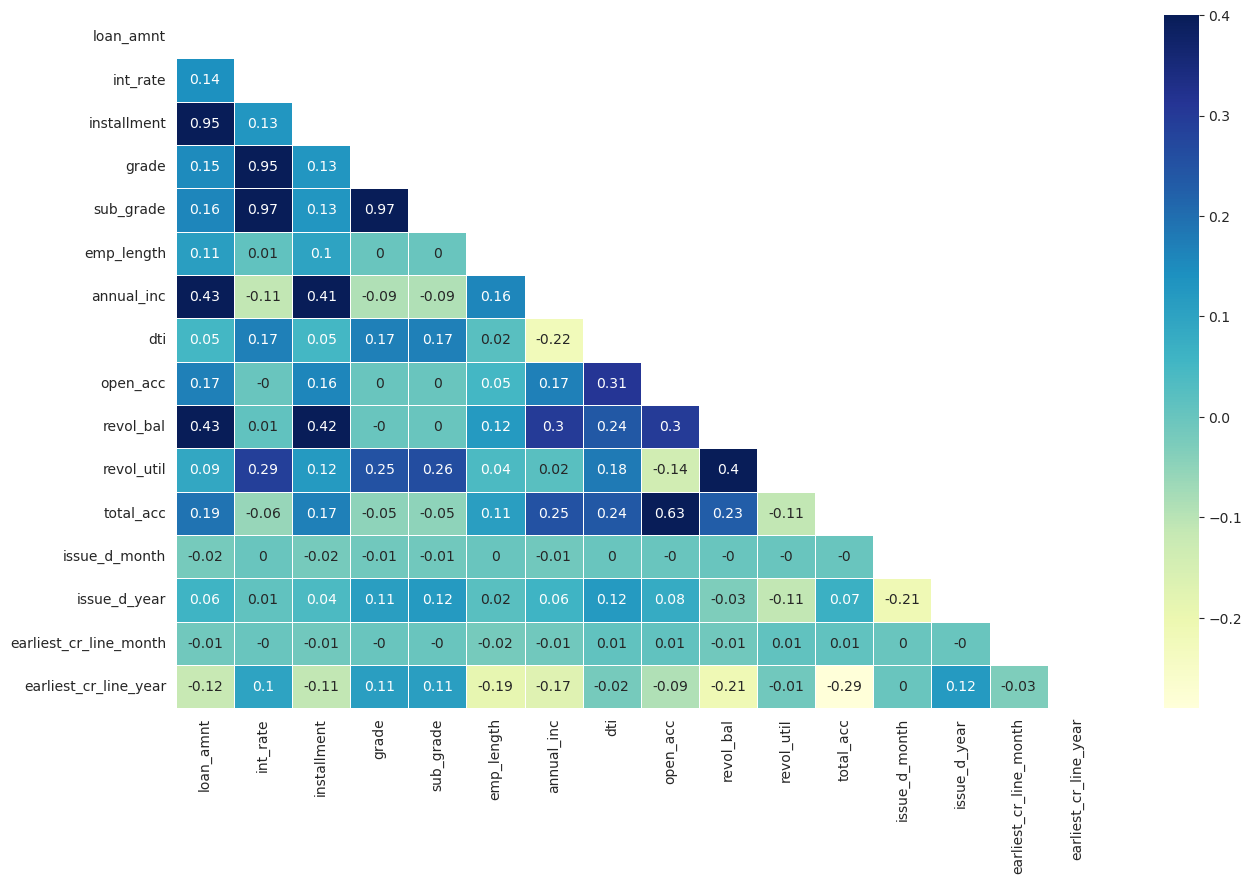

In [ ]:
max_corr = 0.4
plt.figure(figsize=(20,9))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 9))
    ax = sns.heatmap(corr_df, mask=mask,vmax=max_corr, annot=True, cmap="YlGnBu",linewidths=.5)

It seems that installment,loan_amount,grade,sub_grade,int_rate are highly correlated



In [ ]:
#We need to verify whether we can drop these columns which has high correlation
#H0:

In [ ]:
#We would require to drop highly correlated features for smooth model creation
#Checking VIF
for key in df.select_dtypes('category').keys():
    print(key ,':' ,df[key].unique())

term : ['36', '60']
Categories (2, object): ['36', '60']
home_ownership : ['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'ANY', 'NONE']
Categories (6, object): ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']
verification_status : ['Not Verified', 'Source Verified', 'Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']
loan_status : ['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']
initial_list_status : ['f', 'w']
Categories (2, object): ['f', 'w']
application_type : ['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']
Categories (3, object): ['DIRECT_PAY', 'INDIVIDUAL', 'JOINT']


### Data Preprocessing

In [ ]:
#df2 = df.copy(deep = True)

In [ ]:
df.dtypes


loan_amnt                     float64
term                         category
int_rate                      float64
installment                   float64
grade                           int64
sub_grade                       int64
emp_title                      string
emp_length                      int64
home_ownership               category
annual_inc                    float64
verification_status          category
loan_status                  category
purpose                        string
dti                           float64
open_acc                      float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status          category
application_type             category
issue_d_month                   int64
issue_d_year                    int64
earliest_cr_line_month          int64
earliest_cr_line_year           int64
state                          string
pincode                        string
pub_rec_flag

In [ ]:
cat_cols

['term',
 'home_ownership',
 'verification_status',
 'loan_status',
 'initial_list_status',
 'application_type']

In [ ]:
for column in cat_cols:
    if column == 'loan_status':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
    df.drop(column, inplace=True, axis=1)
    df.drop(df.columns[-1], inplace=True, axis=1)#To prevent falling into dummy variable trap

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279060 entries, 1 to 396027
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   loan_amnt                            279060 non-null  float64 
 1   int_rate                             279060 non-null  float64 
 2   installment                          279060 non-null  float64 
 3   grade                                279060 non-null  int64   
 4   sub_grade                            279060 non-null  int64   
 5   emp_title                            279060 non-null  string  
 6   emp_length                           279060 non-null  int64   
 7   annual_inc                           279060 non-null  float64 
 8   loan_status                          279060 non-null  category
 9   purpose                              279060 non-null  string  
 10  dti                                  279060 non-null  float64 
 11  

In [ ]:
df.columns
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
df['loan_status'].value_counts()

1    222511
0     56549
Name: loan_status, dtype: int64

In [ ]:
df['loan_status']=df['loan_status'].astype('int')

In [ ]:


for column in df.columns:
    if df[column].dtype=='string':
        df[column] = pd.Categorical(df[column])

In [ ]:
df.info()

((284936, 34), (284936,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['loan_status'], axis=1), df['loan_status'], random_state=0, test_size = .2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size = .2)


In [ ]:
y_train.values

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
target_encoder = TargetEncoder(return_df=True)
X_train = target_encoder.fit_transform(X_train, y_train)

In [ ]:
X_train

loan_amnt  int_rate  installment  grade  sub_grade  emp_title  \
342768     9500.0     14.65       327.70      3         15   0.713456   
147417     6975.0     16.29       246.23      4         17   0.865059   
327973     6500.0     13.33       220.05      3         13   0.729953   
24538      8500.0     11.67       280.99      2          9   0.816347   
222463    17850.0     12.99       601.36      3         11   0.765476   
...           ...       ...          ...    ...        ...        ...   
227258    12000.0     15.61       419.58      4         16   0.742612   
171221    18000.0     14.64       620.81      3         13   0.826398   
96236     12000.0      5.32       361.38      1          1   0.824023   
375938     8400.0     11.67       277.68      2          9   0.771781   
119392    12000.0     16.49       294.96      4         18   0.710939   

        emp_length  annual_inc   purpose    dti  ...  home_ownership_ANY  \
342768           1     25068.0  0.787371   7.71  ...                   0   
147417           8     39992.0  0.787371  23.38  ...                   0   
327973           0     21000.0  0.787371   8.63  ...                   0   
24538           10     75000.0  0.787371  20.54  ...                   0   
222463           4    135000.0  0.787371  15.15  ...                   0   
...            ...         ...       ...    ...  ...                 ...   
227258           4     24000.0  0.826624  24.70  ...                   0   
171221           7    115000.0  0.826624  18.18  ...                   0   
96236            7     60000.0  0.826624  12.64  ...                   0   
375938          10    102000.0  0.787371  23.92  ...                   0   
119392          10     47600.0  0.787371  12.18  ...                   0   

        home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
342768                        0                    0                     0   
147417                        0                    0                     0   
327973                        0                    0                     0   
24538                         0                    0                     0   
222463                        1                    0                     0   
...                         ...                  ...                   ...   
227258                        0                    0                     0   
171221                        0                    0                     0   
96236                         0                    0                     0   
375938                        1                    0                     0   
119392                        1                    0                     0   

        home_ownership_OWN  verification_status_Not Verified  \
342768                   0                                 0   
147417                   0                                 0   
327973                   0                                 0   
24538                    0                                 0   
222463                   0                                 0   
...                    ...                               ...   
227258                   1                                 1   
171221                   0                                 0   
96236                    1                                 1   
375938                   0                                 0   
119392                   0                                 0   

        verification_status_Source Verified  initial_list_status_f  \
342768                                    1                      1   
147417                                    1                      1   
327973                                    0                      1   
24538                                     0                      1   
222463                                    1                      0   
...                                     ...                    ...   
227258                

In [ ]:
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [ ]:
X_train.columns

In [ ]:
X_test = target_encoder.transform(X_test)
X_val = target_encoder.transform(X_val)
X_test_columns=X_test.columns
X_test_std=std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_test_columns)
X_val_columns=X_val.columns
X_val_std=std.transform(X_val)
X_val=pd.DataFrame(X_val_std, columns=X_val_columns)

In [ ]:
train_scores = []
val_scores = []
for alpha in np.arange(0.01, 100000.0, 100):
    model= LogisticRegression(C=1/alpha)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

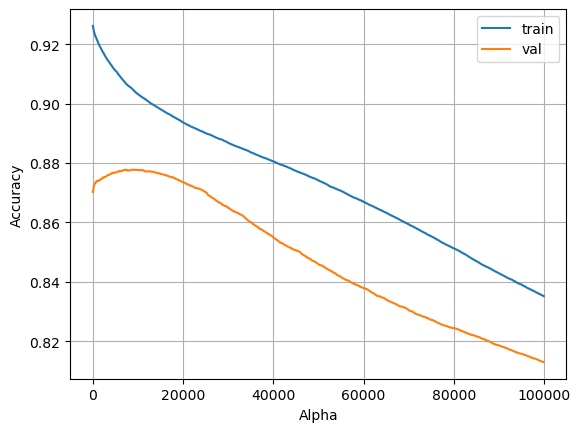

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 100000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100000.0, 100)), val_scores, label="val")
plt.legend(loc='upper right')

plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

It gives maximum accuracy when alpha value is between 10000 and 10500.

In [ ]:
np.max(val_scores)

0.8777827547592385

87% accuracy is obtained

In [ ]:
alpha_best=0.01*87+10000
alpha_best

10000.87

In [ ]:
#Resampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
X_smote , y_smote = smote.fit_resample(X_train,y_train)
X_smote.shape,  y_smote.shape


((284936, 34), (284936,))

In [ ]:
lr= LogisticRegression(C=1/alpha_best)
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
val_score = lr.score(X_val, y_val)
test_score = lr.score(X_test, y_test)
train_scores.append(train_score)
val_scores.append(val_score)


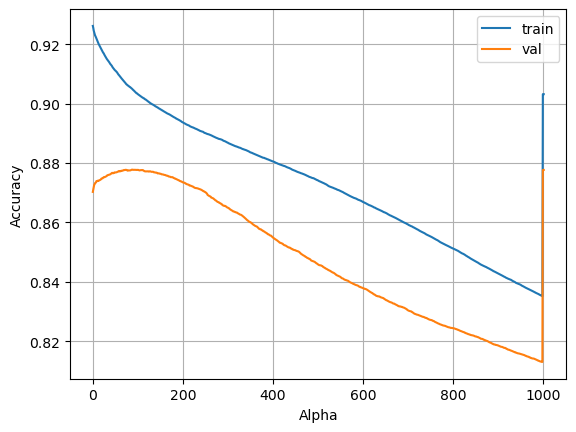

In [ ]:
plt.figure()
plt.plot(train_scores, label="train")
plt.plot(val_scores, label="val")

plt.legend(loc='upper right')

plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

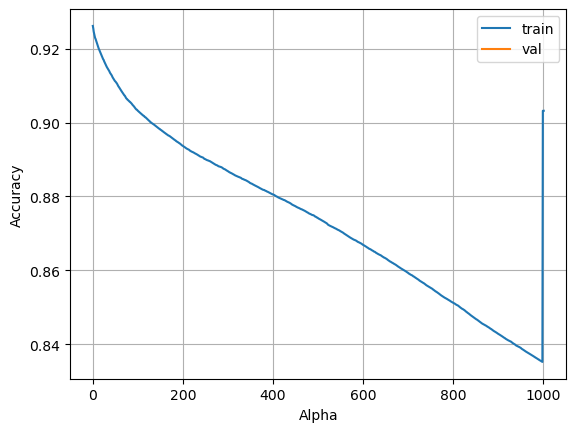

In [ ]:
plt.figure()
plt.plot(train_scores, label="train")
plt.plot(test_score, label="val")

plt.legend(loc='upper right')

plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
#Calculating the scores
print(f"Training Score: {np.round(train_score, 2)}")
print(f"Validation Score: {np.round(val_score, 2)}")
print(f"Test Score: {np.round(test_score, 2)}")


Training Score: 0.9
Validation Score: 0.88
Test Score: 0.88


In [ ]:
X = df.drop(["loan_status"],axis = 1)
feature=pd.DataFrame(data=lr.coef_,columns=X.columns).T

In [ ]:
!pip install -U imbalanced-learn

     ------------------------------------ 226.0/226.0 kB 601.0 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 735.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


### Classification


Confusion Matrix
 [[ 5159  6140]
 [  565 43948]] 



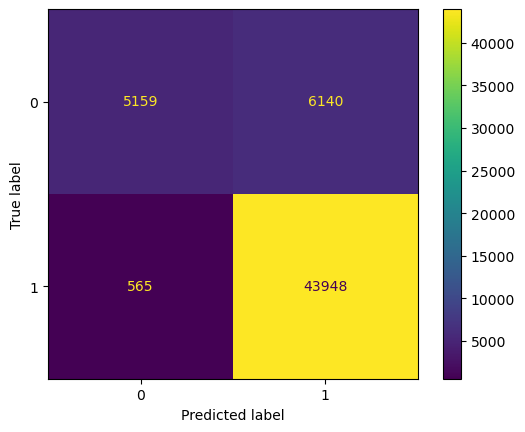

In [ ]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix\n", conf_matrix, "\n")
ConfusionMatrixDisplay(conf_matrix).plot();

In [ ]:
print(f"Precision Score:{precision_score(y_test, y_pred)}")
print(f"Recall Score:{recall_score(y_test, y_pred)}")
print(f"F1 Score:{f1_score(y_test, y_pred)}")

Precision Score:0.8774157482830219
Recall Score:0.9873070788309033
F1 Score:0.9291233707888922


In [ ]:
y_score = lr.predict_proba(X_test)[:, 1]
y_score

array([0.96757157, 0.94627844, 0.78463039, ..., 0.97532607, 0.05250944,
       0.92743799])

### precision-recall curve

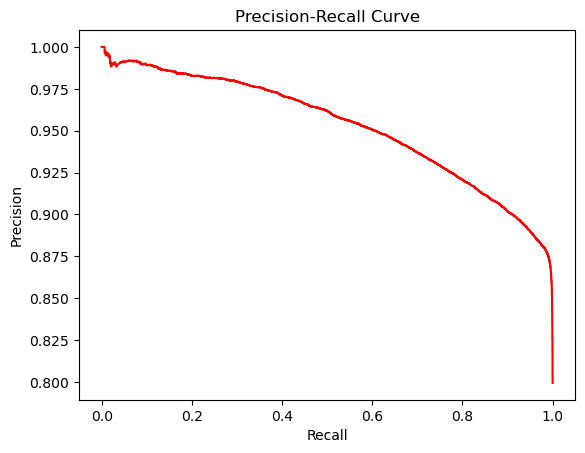

In [ ]:
precision, recall, thres = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='red')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
print(f"auc:{auc(recall, precision)}")

auc:0.9530136882507269


### ROC_AUC

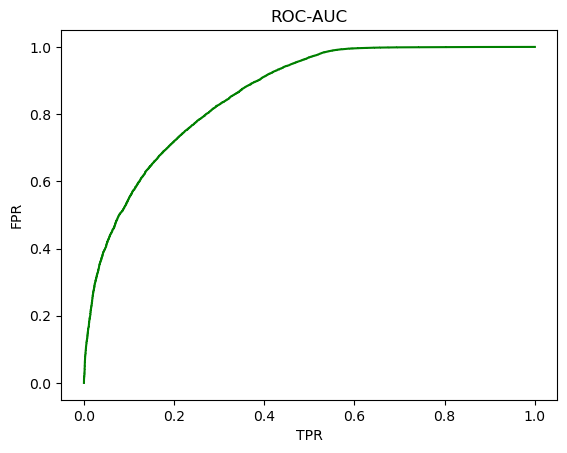

In [ ]:
fpr, tpr, thres = roc_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='green')
ax.set_title('ROC-AUC')
ax.set_ylabel('FPR')
ax.set_xlabel('TPR')
plt.show()

In [ ]:
print(f"auc:{auc(fpr,tpr)}")

auc:0.8596816203200561


### Accuracy-Threshold

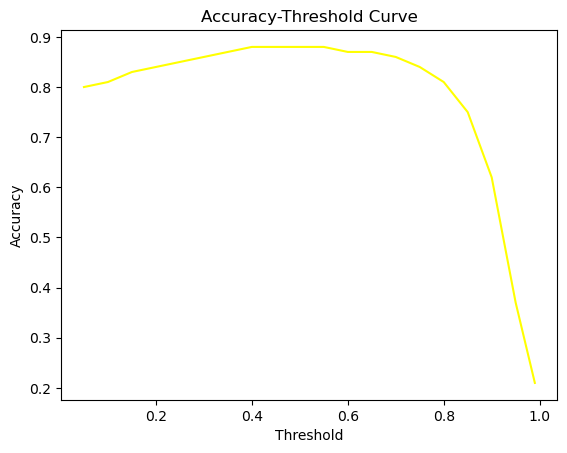

Best Threshold:0.4


In [ ]:
threshold = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
scores = []
for i in threshold:
    y_pred = np.vectorize(lambda x: 1 if x>i else 0)(y_score)
    scores += [round((y_pred == y_test).sum()/y_pred.shape[0], 2)]
fig, ax = plt.subplots()
ax.plot(threshold, scores, color='yellow')
ax.set_title('Accuracy-Threshold Curve')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Threshold')
plt.show()

print(f"Best Threshold:{threshold[np.argmax(scores)]}")

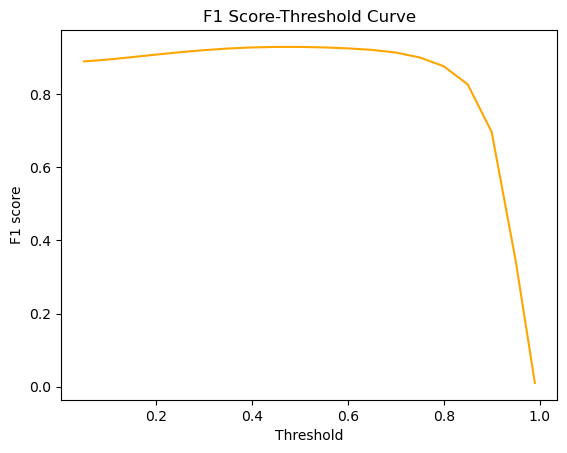

Best Threshold:0.5


In [ ]:
threshold = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
scores = []
for i in threshold:
    y_pred = np.vectorize(lambda x: 1 if x>i else 0)(y_score)
    scores += [f1_score(y_test,y_pred)]
fig, ax = plt.subplots()
ax.plot(threshold, scores, color='orange')
ax.set_title('F1 Score-Threshold Curve')
ax.set_ylabel('F1 score')
ax.set_xlabel('Threshold')
plt.show()

print(f"Best Threshold:{threshold[np.argmax(scores)]}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=30,max_depth=10,class_weight="balanced")
RF.fit(X_train,y_train)
rf_score=RF.score(X_test,y_test)


In [ ]:
rf_score

0.7698344442055471

### Tradeoff questions

### Questionnaire

In [ ]:
#What percentage of customers have fully paid their Loan Amount?
df_copy['loan_status'].value_counts()[0]/len(df_copy)

0.8038709188697826

80% of customers have fully paid the loan

In [ ]:
#Comment about the correlation between Loan Amount and Installment features.
corr_df[['loan_amnt','installment']]

loan_amnt  installment
loan_amnt                    1.00         0.95
int_rate                     0.14         0.13
installment                  0.95         1.00
grade                        0.15         0.13
sub_grade                    0.16         0.13
emp_length                   0.11         0.10
annual_inc                   0.43         0.41
dti                          0.05         0.05
open_acc                     0.17         0.16
revol_bal                    0.43         0.42
revol_util                   0.09         0.12
total_acc                    0.19         0.17
issue_d_month               -0.02        -0.02
issue_d_year                 0.06         0.04
earliest_cr_line_month      -0.01        -0.01
earliest_cr_line_year       -0.12        -0.11

Loan amount and installment are highly correlated

In [ ]:
#The majority of people have home ownership as _______.
df_copy.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
Majority of people have home ownership as Mortgage

In [ ]:
#People with grades ‘A’ are more likely to fully pay their loan.
df_copy[df_copy['loan_status']=='Fully Paid'].groupby(['grade'])['grade'].count()/df_copy.groupby(['grade'])['grade'].count()

grade
A    0.937121
B    0.874270
C    0.788191
D    0.711322
E    0.626366
F    0.572120
G    0.521611
Name: grade, dtype: float64

They have high chances are fully paying the loan

In [ ]:
#Name the top 2 afforded job titles.
df_copy['emp_title'].value_counts()[:2]

Teacher    4389
Manager    4250
Name: emp_title, dtype: int64

Teacher and Manager are the most afforded job titles

#Thinking from a bank's perspective, which metric should our primary focus be on.
#ROC AUC
#Precision
#Recall
#F1 Score
Bank should focus on not giving away real defaulters and constraint loan on people who would pay it in addition to avoiding false positive and false negative.

Bank should focus more on the metric f1 score as it balances recall and precision well.

High precision helps in taking care of less false positive(avoiding NPA).In this dataset ,we have recall score as 98% implying high recall whichinturn it can be interpreted as the real defaulters are correctly predicted from actual.

In [ ]:
#How does the gap in precision and recall affect the bank


loan_amnt                             -0.054799
int_rate                              -0.093722
installment                           -0.032130
grade                                 -0.113482
sub_grade                             -0.126871
emp_title                              0.825690
emp_length                             0.005736
annual_inc                             0.040722
purpose                                0.029982
dti                                   -0.097968
open_acc                              -0.056376
revol_bal                              0.007018
revol_util                            -0.071856
total_acc                              0.005990
issue_d_month                          0.017907
issue_d_year                          -0.007848
earliest_cr_line_month                -0.001724
earliest_cr_line_year                 -0.020122
state                                  0.026408
pincode                                0.941102
pub_rec_flag                           0

In [ ]:
#How does the gap in precision and recall affect the bank
Low precision results in High defaulters because of wrong prediction leading to NPA.
Low recall results in less giving away of loans to capable people affecting the business.
In this dataset,98% recall is there meaning that the company is correctly granting loan to capable people comparatively than defaulters

In [ ]:
#Which were the features that heavily affected the outcome
feature.sort_values(by=0)[-3:]

0
term_36    0.129188
emp_title  0.825690
pincode    0.941102

term 36,employee title and pincode are significant relationship with loan status

#Will the results be affected by geographical location? (Yes/No)
As pincode is very significant feature,hence the results will be affected by location